## <b> The World Bank EdStats All Indicator Query holds over 4,000 internationally comparable indicators that describe education access, progression, completion, literacy, teachers, population, and expenditures.The indicators cover the education cycle from pre-primary to vocational and tertiary education and also holds learning outcome data from international and regional learning assessments (e.g. PISA, TIMSS, PIRLS), equity data from household surveys, and projection/attainment data. </b>

## <b> Explore and analyze the data to identify variation of indicators across the globe, which countries are more alike and different. Feel free to add more extensive analysis and details.</b>

### Aim: 
On the basis of the given data set, analyze the global education change over a period of 25 years and its impact on nations. Also, compare the overall educational developement of nations based on income group and with India. 

### Precedure:
1. Modules and Sources: Importing required modules and available data set.
2. Data Review, extraction and Cleaning: 
   Briefly reviewing the data set one by one and extracting essential data out of the set of data,      such as particular columns and limited rows.
3. Performing the three kinds of analysis: World vs time, income group vs time, India vs time.


### Python Modules

In [1]:
# Importing required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import plotly.express as px

### Data Source (World Bank)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing dataframes from available data
df1=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Project/Project1: EDA/Data/EdStatsCountry-Series.csv')
df2=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Project/Project1: EDA/Data/EdStatsCountry.csv')
df3=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Project/Project1: EDA/Data/EdStatsData.csv')
df4=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Project/Project1: EDA/Data/EdStatsFootNote.csv')
df5=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Project/Project1: EDA/Data/EdStatsSeries.csv')

### Data Review

In [4]:
df1.columns

Index(['CountryCode', 'SeriesCode', 'DESCRIPTION', 'Unnamed: 3'], dtype='object')

In [5]:
df1.head()

CountryCode         SeriesCode  \
0         ABW        SP.POP.TOTL   
1         ABW        SP.POP.GROW   
2         AFG        SP.POP.GROW   
3         AFG  NY.GDP.PCAP.PP.CD   
4         AFG        SP.POP.TOTL   

                                         DESCRIPTION  Unnamed: 3  
0  Data sources : United Nations World Population...         NaN  
1  Data sources: United Nations World Population ...         NaN  
2  Data sources: United Nations World Population ...         NaN  
3                 Estimates are based on regression.         NaN  
4  Data sources : United Nations World Population...         NaN

In [6]:
df1.tail()

CountryCode   SeriesCode  \
608         ZAF  SP.POP.GROW   
609         ZMB  SP.POP.GROW   
610         ZMB  SP.POP.TOTL   
611         ZWE  SP.POP.TOTL   
612         ZWE  SP.POP.GROW   

                                           DESCRIPTION  Unnamed: 3  
608  Data sources : Statistics South Africa, United...         NaN  
609  Data sources: United Nations World Population ...         NaN  
610  Data sources : United Nations World Population...         NaN  
611  Data sources : United Nations World Population...         NaN  
612  Data sources: United Nations World Population ...         NaN

In [7]:
df2.columns

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data', 'Unnamed: 31'],
      dtype='object')

In [8]:
df2.head()

Country Code   Short Name   Table Name                     Long Name  \
0          ABW        Aruba        Aruba                         Aruba   
1          AFG  Afghanistan  Afghanistan  Islamic State of Afghanistan   
2          AGO       Angola       Angola   People's Republic of Angola   
3          ALB      Albania      Albania           Republic of Albania   
4          AND      Andorra      Andorra       Principality of Andorra   

  2-alpha code   Currency Unit  \
0           AW   Aruban florin   
1           AF  Afghan afghani   
2           AO  Angolan kwanza   
3           AL    Albanian lek   
4           AD            Euro   

                                       Special Notes  \
0  SNA data for 2000-2011 are updated from offici...   
1  Fiscal year end: March 20; reporting period fo...   
2  April 2013 database update: Based on IMF data,...   
3                                                NaN   
4                                                NaN   

                      Region          Income Group WB-2 code  ...  \
0  Latin America & Caribbean  High income: nonOECD        AW  ...   
1                 South Asia            Low income        AF  ...   
2         Sub-Saharan Africa   Upper middle income        AO  ...   
3      Europe & Central Asia   Upper middle income        AL  ...   
4      Europe & Central Asia  High income: nonOECD        AD  ...   

            IMF data dissemination standard  \
0                                       NaN   
1  General Data Dissemination System (GDDS)   
2  General Data Dissemination System (GDDS)   
3  General Data Dissemination System (GDDS)   
4                                       NaN   

                            Latest population census  \
0                                               2010   
1                                               1979   
2                                               1970   
3                                               2011   
4  2011. Population figures compiled from adminis...   

                             Latest household survey  \
0                                                NaN   
1  Multiple Indicator Cluster Survey (MICS), 2010/11   
2               Malaria Indicator Survey (MIS), 2011   
3       Demographic and Health Survey (DHS), 2008/09   
4                                                NaN   

   Source of most recent Income and expenditure data  \
0                                                NaN   
1            Integrated household survey (IHS), 2008   
2            Integrated household survey (IHS), 2008   
3  Living Standards Measurement Study Survey (LSM...   
4                                                NaN   

  Vital registration complete Latest agricultural census  \
0                         Yes                        NaN   
1                         NaN                    2013/14   
2                         NaN                       2015   
3                         Yes                       2012   
4                         Yes                        NaN   

  Latest industrial data Latest trade data Latest water withdrawal data  \
0                    NaN            2012.0                          NaN   
1                    NaN            2012.0                         2000   
2                    NaN               NaN                         2005   
3                 2010.0            2012.0                         2006   
4                    NaN            2006.0                          NaN   

  Unnamed: 31  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  

[5 rows x 32 columns]

In [9]:
df2.tail()

Country Code    Short Name    Table Name                 Long Name  \
236          XKX        Kosovo        Kosovo        Republic of Kosovo   
237          YEM         Yemen   Yemen, Rep.         Republic of Yemen   
238          ZAF  South Africa  South Africa  Republic of South Africa   
239          ZMB        Zambia        Zambia        Republic of Zambia   
240          ZWE      Zimbabwe      Zimbabwe      Republic of Zimbabwe   

    2-alpha code       Currency Unit  \
236          NaN                Euro   
237           YE         Yemeni rial   
238           ZA  South African rand   
239           ZM  New Zambian kwacha   
240           ZW         U.S. dollar   

                                         Special Notes  \
236  Kosovo became a World Bank member on June 29, ...   
237  Based on official government statistics and In...   
238  Fiscal year end: March 31; reporting period fo...   
239  National accounts data have rebased to reflect...   
240  Fiscal year end: June 30; reporting period for...   

                         Region         Income Group WB-2 code  ...  \
236       Europe & Central Asia  Lower middle income        KV  ...   
237  Middle East & North Africa  Lower middle income        RY  ...   
238          Sub-Saharan Africa  Upper middle income        ZA  ...   
239          Sub-Saharan Africa  Lower middle income        ZM  ...   
240          Sub-Saharan Africa           Low income        ZW  ...   

                IMF data dissemination standard  Latest population census  \
236    General Data Dissemination System (GDDS)                      2011   
237    General Data Dissemination System (GDDS)                      2004   
238  Special Data Dissemination Standard (SDDS)                      2011   
239    General Data Dissemination System (GDDS)                      2010   
240    General Data Dissemination System (GDDS)                      2012   

                               Latest household survey  \
236                                                NaN   
237          Demographic and Health Survey (DHS), 2013   
238  Demographic and Health Survey (DHS), 2003; Wor...   
239          Demographic and Health Survey (DHS), 2013   
240       Demographic and Health Survey (DHS), 2010/11   

    Source of most recent Income and expenditure data  \
236           Integrated household survey (IHS), 2011   
237    Expenditure survey/budget survey (ES/BS), 2005   
238    Expenditure survey/budget survey (ES/BS), 2010   
239           Integrated household survey (IHS), 2010   
240        Integrated household survey (IHS), 2011/12   

    Vital registration complete            Latest agricultural census  \
236                         NaN                                   NaN   
237                         NaN                                   NaN   
238                         NaN                                  2007   
239                         NaN  2010. Population and Housing Census.   
240                         NaN                                   NaN   

    Latest industrial data Latest trade data Latest water withdrawal data  \
236                    NaN               NaN                          NaN   
237                 2006.0            2012.0                         2005   
238                 2010.0            2012.0                         2000   
239                    NaN            2011.0                         2002   
240                    NaN            2012.0                         2002   

    Unnamed: 31  
236         NaN  
237         NaN  
238         NaN  
239         NaN  
240         NaN  

[5 rows x 32 columns]

In [10]:
df3.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

In [11]:
df3.head()

Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   
3   Arab World          ARB   
4   Arab World          ARB   

                                      Indicator Name  Indicator Code  \
0  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   
1  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   
2  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   
3  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.M   
4  Adjusted net enrolment rate, primary, both sex...     SE.PRM.TENR   

        1970       1971       1972       1973       1974      1975  ...  2060  \
0        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
1        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
2        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
3        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
4  54.822121  54.894138  56.209438  57.267109  57.991138  59.36554  ...   NaN   

   2065  2070  2075  2080  2085  2090  2095  2100  Unnamed: 69  
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  

[5 rows x 70 columns]

In [12]:
df3.tail()

Country Name Country Code  \
886925     Zimbabwe          ZWE   
886926     Zimbabwe          ZWE   
886927     Zimbabwe          ZWE   
886928     Zimbabwe          ZWE   
886929     Zimbabwe          ZWE   

                                           Indicator Name  \
886925  Youth illiterate population, 15-24 years, male...   
886926  Youth literacy rate, population 15-24 years, b...   
886927  Youth literacy rate, population 15-24 years, f...   
886928  Youth literacy rate, population 15-24 years, g...   
886929  Youth literacy rate, population 15-24 years, m...   

              Indicator Code  1970  1971  1972  1973  1974  1975  ...  2060  \
886925      UIS.LP.AG15T24.M   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
886926     SE.ADT.1524.LT.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
886927  SE.ADT.1524.LT.FE.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
886928  SE.ADT.1524.LT.FM.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
886929  SE.ADT.1524.LT.MA.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   

        2065  2070  2075  2080  2085  2090  2095  2100  Unnamed: 69  
886925   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
886926   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
886927   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
886928   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
886929   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  

[5 rows x 70 columns]

In [13]:
df4.columns

Index(['CountryCode', 'SeriesCode', 'Year', 'DESCRIPTION', 'Unnamed: 4'], dtype='object')

In [14]:
df4.head()

CountryCode      SeriesCode    Year          DESCRIPTION  Unnamed: 4
0         ABW  SE.PRE.ENRL.FE  YR2001  Country estimation.         NaN
1         ABW  SE.TER.TCHR.FE  YR2005  Country estimation.         NaN
2         ABW  SE.PRE.TCHR.FE  YR2000  Country estimation.         NaN
3         ABW  SE.SEC.ENRL.GC  YR2004  Country estimation.         NaN
4         ABW     SE.PRE.TCHR  YR2006  Country estimation.         NaN

In [15]:
df4.tail()

CountryCode   SeriesCode    Year  \
643633         ZWE  SH.DYN.MORT  YR2007   
643634         ZWE  SH.DYN.MORT  YR2014   
643635         ZWE  SH.DYN.MORT  YR2015   
643636         ZWE  SH.DYN.MORT  YR2017   
643637         ZWE  SP.POP.GROW  YR2017   

                                   DESCRIPTION  Unnamed: 4  
643633       Uncertainty bound is 91.6 - 109.3         NaN  
643634          Uncertainty bound is 54.3 - 76         NaN  
643635        Uncertainty bound is 48.3 - 73.3         NaN  
643636  5-year average value between 0s and 5s         NaN  
643637  5-year average value between 0s and 5s         NaN

In [16]:
df5.columns

Index(['Series Code', 'Topic', 'Indicator Name', 'Short definition',
       'Long definition', 'Unit of measure', 'Periodicity', 'Base Period',
       'Other notes', 'Aggregation method', 'Limitations and exceptions',
       'Notes from original source', 'General comments', 'Source',
       'Statistical concept and methodology', 'Development relevance',
       'Related source links', 'Other web links', 'Related indicators',
       'License Type', 'Unnamed: 20'],
      dtype='object')

In [17]:
df5.head()

Series Code       Topic  \
0  BAR.NOED.1519.FE.ZS  Attainment   
1     BAR.NOED.1519.ZS  Attainment   
2  BAR.NOED.15UP.FE.ZS  Attainment   
3     BAR.NOED.15UP.ZS  Attainment   
4  BAR.NOED.2024.FE.ZS  Attainment   

                                      Indicator Name  \
0  Barro-Lee: Percentage of female population age...   
1  Barro-Lee: Percentage of population age 15-19 ...   
2  Barro-Lee: Percentage of female population age...   
3  Barro-Lee: Percentage of population age 15+ wi...   
4  Barro-Lee: Percentage of female population age...   

                                    Short definition  \
0  Percentage of female population age 15-19 with...   
1  Percentage of population age 15-19 with no edu...   
2  Percentage of female population age 15+ with n...   
3  Percentage of population age 15+ with no educa...   
4  Percentage of female population age 20-24 with...   

                                     Long definition  Unit of measure  \
0  Percentage of female population age 15-19 with...              NaN   
1  Percentage of population age 15-19 with no edu...              NaN   
2  Percentage of female population age 15+ with n...              NaN   
3  Percentage of population age 15+ with no educa...              NaN   
4  Percentage of female population age 20-24 with...              NaN   

  Periodicity Base Period Other notes Aggregation method  ...  \
0         NaN         NaN         NaN                NaN  ...   
1         NaN         NaN         NaN                NaN  ...   
2         NaN         NaN         NaN                NaN  ...   
3         NaN         NaN         NaN                NaN  ...   
4         NaN         NaN         NaN                NaN  ...   

  Notes from original source  General comments  \
0                        NaN               NaN   
1                        NaN               NaN   
2                        NaN               NaN   
3                        NaN               NaN   
4                        NaN               NaN   

                                              Source  \
0  Robert J. Barro and Jong-Wha Lee: http://www.b...   
1  Robert J. Barro and Jong-Wha Lee: http://www.b...   
2  Robert J. Barro and Jong-Wha Lee: http://www.b...   
3  Robert J. Barro and Jong-Wha Lee: http://www.b...   
4  Robert J. Barro and Jong-Wha Lee: http://www.b...   

  Statistical concept and methodology Development relevance  \
0                                 NaN                   NaN   
1                                 NaN                   NaN   
2                                 NaN                   NaN   
3                                 NaN                   NaN   
4                                 NaN                   NaN   

  Related source links Other web links  Related indicators  License Type  \
0                  NaN             NaN                 NaN           NaN   
1                  NaN             NaN                 NaN           NaN   
2                  NaN             NaN                 NaN           NaN   
3                  NaN             NaN                 NaN           NaN   
4                  NaN             NaN                 NaN           NaN   

   Unnamed: 20  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 21 columns]

In [18]:
df5.tail()

Series Code         Topic  \
3660    UIS.XUNIT.USCONST.3.FSGOV  Expenditures   
3661    UIS.XUNIT.USCONST.4.FSGOV  Expenditures   
3662   UIS.XUNIT.USCONST.56.FSGOV  Expenditures   
3663  XGDP.23.FSGOV.FDINSTADM.FFD  Expenditures   
3664  XGDP.56.FSGOV.FDINSTADM.FFD  Expenditures   

                                         Indicator Name  \
3660  Government expenditure per upper secondary stu...   
3661  Government expenditure per post-secondary non-...   
3662  Government expenditure per tertiary student (c...   
3663  Government expenditure in secondary institutio...   
3664  Government expenditure in tertiary institution...   

                                       Short definition  \
3660                                                NaN   
3661                                                NaN   
3662                                                NaN   
3663  Total general (local, regional and central) go...   
3664  Total general (local, regional and central) go...   

                                        Long definition  Unit of measure  \
3660  Average total (current, capital and transfers)...              NaN   
3661  Average total (current, capital and transfers)...              NaN   
3662  Average total (current, capital and transfers)...              NaN   
3663  Total general (local, regional and central) go...              NaN   
3664  Total general (local, regional and central) go...              NaN   

     Periodicity Base Period Other notes Aggregation method  ...  \
3660         NaN         NaN         NaN                NaN  ...   
3661         NaN         NaN         NaN                NaN  ...   
3662         NaN         NaN         NaN                NaN  ...   
3663         NaN         NaN   Secondary                NaN  ...   
3664         NaN         NaN    Tertiary                NaN  ...   

     Notes from original source  General comments  \
3660                        NaN               NaN   
3661                        NaN               NaN   
3662                        NaN               NaN   
3663                        NaN               NaN   
3664                        NaN               NaN   

                               Source Statistical concept and methodology  \
3660  UNESCO Institute for Statistics                                 NaN   
3661  UNESCO Institute for Statistics                                 NaN   
3662  UNESCO Institute for Statistics                                 NaN   
3663  UNESCO Institute for Statistics                                 NaN   
3664  UNESCO Institute for Statistics                                 NaN   

     Development relevance Related source links Other web links  \
3660                   NaN                  NaN             NaN   
3661                   NaN                  NaN             NaN   
3662                   NaN                  NaN             NaN   
3663                   NaN                  NaN             NaN   
3664                   NaN                  NaN             NaN   

      Related indicators  License Type  Unnamed: 20  
3660                 NaN           NaN          NaN  
3661                 NaN           NaN          NaN  
3662                 NaN           NaN          NaN  
3663                 NaN           NaN          NaN  
3664                 NaN           NaN          NaN  

[5 rows x 21 columns]

## Observations from df3.info()
1. 2010 has lowest number of missing data.
2. The year range 2000 to 2015 plus 1990,1995 & 1999 have the maximum number of non-null values and are real time data.
3. The non-null values from 2020 and above are predicted data and are same in number.

## Conclusion from above observations
Most of non-null datas are available from 1999 to 2015 and also in 1990 & 1995.
So, we will analyze the global education for 25 years of range from 1990 to 2015.

### Data extraction and cleaning

In [19]:
new_df1 = df2[['Country Code','Currency Unit', 'Region', 'Income Group']]

In [20]:
new_df2 = df3[~df3['2010'].isna()][['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code','1990','1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998','1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013','2014','2015']]

In [21]:
# Merging new_df1 and new_df2 to get income group and Region corresponding to the countries
merged_df1 = pd.merge(new_df2, new_df1, how='left', on = 'Country Code').reset_index(drop=True)

In [22]:
# Considering non-null regions only
merged_df_final = merged_df1[~merged_df1['Region'].isna()]

In [23]:
# Few most important indicators out of the 3600 indicators that organisations consider most
indicator_with_enrolment = [elem1 for elem1 in merged_df_final['Indicator Name'].unique() if 'enrolment' in elem1] # Done
indicator_with_completion = [elem0 for elem0 in merged_df_final['Indicator Name'].unique() if 'completion' in elem0] # Done 
indicator_with_literacy = [elem2 for elem2 in merged_df_final['Indicator Name'].unique() if 'literacy' in elem2]  # Done 
indicator_with_GDP = [elem3 for elem3 in merged_df_final['Indicator Name'].unique() if 'GDP' in elem3]  # Done 
indicator_with_female_population_age = [elem4 for elem4 in merged_df_final['Indicator Name'].unique() if 'female population' in elem4]
indicator_with_no_education = [elem5 for elem5 in merged_df_final['Indicator Name'].unique() if 'no education' in elem5]  # Done 
indicator_with_drop_out = [elem6 for elem6 in merged_df_final['Indicator Name'].unique() if 'Drop-out rate' in elem6]   # Done 
indicator_with_compulsory_education = [elem7 for elem7 in merged_df_final['Indicator Name'].unique() if 'compulsory education' in elem7]
indicator_with_expenditure = [elem8 for elem8 in merged_df_final['Indicator Name'].unique() if 'expenditure' in elem8]    # Done
indicator_with_Internet_users = [elem9 for elem9 in merged_df_final['Indicator Name'].unique() if 'Internet users' in elem9]  # Done 
indicator_with_Labor_force = [elem10 for elem10 in merged_df_final['Indicator Name'].unique() if 'Labor force' in elem10]  
indicator_with_over_age = [elem11 for elem11 in merged_df_final['Indicator Name'].unique() if 'over-age' in elem11]
indicator_with_Population_growth = [elem12 for elem12 in merged_df_final['Indicator Name'].unique() if 'Population growth' in elem12]
indicator_with_Population = [elem13 for elem13 in merged_df_final['Indicator Name'].unique() if 'Population' in elem13]  # Done 
indicator_with_Repeaters = [elem14 for elem14 in merged_df_final['Indicator Name'].unique() if 'Repeaters' in elem14]
indicator_with_School_life = [elem15 for elem15 in merged_df_final['Indicator Name'].unique() if 'School life' in elem15]
indicator_with_Teachers = [elem16 for elem16 in merged_df_final['Indicator Name'].unique() if 'Teachers' in elem16]  # Done 
indicator_with_Unemployment = [elem17 for elem17 in merged_df_final['Indicator Name'].unique() if 'Unemployment' in elem17]  # Done 
indicator_with_mean_schooling = [elem18 for elem18 in merged_df_final['Indicator Name'].unique() if 'years of schooling' in elem18]


### Base of Analysis:
1. merged_df_final
2. Few indicators

#  Type 1: World vs Year

In [24]:
# Let's start working with different class of indicators

# Indicator 1: Enrolement
enrolment_df = merged_df_final.loc[merged_df_final['Indicator Name'].isin(indicator_with_enrolment)][['Country Name','Region','Indicator Name','Income Group','1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']]
enrolment_df[enrolment_df['Indicator Name'].str.contains('enrolment')]['Indicator Name'][9280]

'Gross enrolment ratio, lower secondary, female (%)'

## Classification under enrolment
## Gross enrolment ratio - Total enrolment in a specific level of education, regarless of age expressed in %.
'''Ratio between all students enrolled in specific level of education and population of official age'''  
'''GER included over-aged students'''
    
## Net enrolment rate - Total enrolment of specific age group of a particular level of education
'''Ratio between all students of particular age enrolled in specific level of education and population of official age group'''

In [25]:
# Right now we will consider GER as it also include overaged students from official age.
list1 = ['Gross enrolment ratio, primary, both sexes (%)','Gross enrolment ratio, secondary, both sexes (%)','Gross enrolment ratio, upper secondary, both sexes (%)','Gross enrolment ratio, tertiary, both sexes (%)', 
         'Gross enrolment ratio, primary, female (%)','Gross enrolment ratio, secondary, female (%)','Gross enrolment ratio, upper secondary, female (%)','Gross enrolment ratio, tertiary, female (%)',
         'Gross enrolment ratio, primary, male (%)','Gross enrolment ratio, secondary, male (%)','Gross enrolment ratio, upper secondary, male (%)','Gross enrolment ratio, tertiary, male (%)',
         'Gross enrolment ratio, primary, gender parity index (GPI)','Gross enrolment ratio, secondary, gender parity index (GPI)','Gross enrolment ratio, upper secondary, gender parity index (GPI)','Gross enrolment ratio, tertiary, gender parity index (GPI)',]
enrolment_df2 = enrolment_df[enrolment_df['Indicator Name'].isin(list1)]
enrolment_df2

Country Name              Region  \
9295    Afghanistan          South Asia   
9296    Afghanistan          South Asia   
9297    Afghanistan          South Asia   
9298    Afghanistan          South Asia   
9299    Afghanistan          South Asia   
...             ...                 ...   
240344       Zambia  Sub-Saharan Africa   
241612     Zimbabwe  Sub-Saharan Africa   
241613     Zimbabwe  Sub-Saharan Africa   
241614     Zimbabwe  Sub-Saharan Africa   
241615     Zimbabwe  Sub-Saharan Africa   

                                           Indicator Name  \
9295       Gross enrolment ratio, primary, both sexes (%)   
9296           Gross enrolment ratio, primary, female (%)   
9297    Gross enrolment ratio, primary, gender parity ...   
9298             Gross enrolment ratio, primary, male (%)   
9299     Gross enrolment ratio, secondary, both sexes (%)   
...                                                   ...   
240344           Gross enrolment ratio, primary, male (%)   
241612    Gross enrolment ratio, tertiary, both sexes (%)   
241613        Gross enrolment ratio, tertiary, female (%)   
241614  Gross enrolment ratio, tertiary, gender parity...   
241615          Gross enrolment ratio, tertiary, male (%)   

               Income Group       1990       1991     1992       1993  \
9295             Low income  30.091150  28.684151      NaN  31.153730   
9296             Low income  21.162830  20.116831      NaN  15.913930   
9297             Low income   0.550430   0.548540      NaN   0.351840   
9298             Low income  38.448029  36.673370      NaN  45.230721   
9299             Low income  11.222830  16.306299      NaN  16.528570   
...                     ...        ...        ...      ...        ...   
240344  Lower middle income        NaN        NaN      NaN        NaN   
241612           Low income   4.996840   5.127020  5.89302        NaN   
241613           Low income        NaN        NaN  3.82405        NaN   
241614           Low income        NaN        NaN  0.48068        NaN   
241615           Low income        NaN        NaN  7.95553        NaN   

             1994       1995  ...        2006        2007        2008  \
9295    43.129269  46.243229  ...  107.817421  104.690819  106.453773   
9296    28.493820  30.912640  ...   82.603607   79.453430   82.683228   
9297     0.503360   0.512270  ...    0.627440    0.617990    0.641100   
9298    56.607361  60.344559  ...  131.652466  128.566803  128.970245   
9299    23.154100  22.566019  ...   29.930460   30.083160   40.223381   
...           ...        ...  ...         ...         ...         ...   
240344  88.684914  86.091118  ...  113.321693  115.406609  116.279861   
241612        NaN        NaN  ...         NaN         NaN         NaN   
241613        NaN        NaN  ...         NaN         NaN         NaN   
241614        NaN        NaN  ...         NaN         NaN         NaN   
241615        NaN        NaN  ...         NaN         NaN         NaN   

              2009        2010        2011        2012        2013  \
9295    102.225288  105.520927  102.809631  108.928520  110.065437   
9296     81.028992   85.339310   85.526321   91.166718   90.755722   
9297      0.662460    0.684700    0.717580    0.724950    0.707060   
9298    122.316048  124.637321  119.187691  125.755371  128.356125   
9299     46.732761   53.246830   54.616180   56.677341   56.688660   
...            ...         ...         ...         ...         ...   
240344  109.403259  106.892937  109.292229  108.725769  103.320610   
241612         NaN    5.905600    5.823760    5.868670    5.871750   
241613         NaN    5.231000    5.019160    5.095920    5.361450   
241614         NaN    0.792360    0.754420    0.764690    0.838190   
241615         NaN    6.601830    6.652980    6.664070    6.396440   

              2014        2015  
9295    111.744133  111.877083  
9296     91.757874   91.083260  
9297      0.702110    0.692000  
9298    130.687881  131.622925

In [26]:
# Levels of Education: Pre-primary(Nursery to KG), Primary(Class 1 to 5), Lower Secondary(Class 6 to 8), secondary(Class 9 & 10), upper secondary(Intermediate), tertiary(Graduation), post-secondary non-tertiary(Certification and training courses)
# It is not possible to go through everything and will be hectic. So, i choosed the most importand ones.
primary_df = enrolment_df2[enrolment_df2['Indicator Name']=='Gross enrolment ratio, primary, both sexes (%)']
secondary_df = enrolment_df2[enrolment_df2['Indicator Name']=='Gross enrolment ratio, secondary, both sexes (%)']
upper_secondary_df = enrolment_df2[enrolment_df2['Indicator Name']=='Gross enrolment ratio, upper secondary, both sexes (%)']
tertiary_df = enrolment_df2[enrolment_df2['Indicator Name']=='Gross enrolment ratio, tertiary, both sexes (%)']
new_df1p =  primary_df[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'Primary Enrolment Rate'})
new_df2s = secondary_df[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'Secondary Enrolment Rate'})
new_df3u =  upper_secondary_df[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'Upper-Secondary Enrolment Rate'})
new_df4t = tertiary_df[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'Tertiary Enrolment Rate'})


In [27]:
primary_df_sorted = primary_df.sort_values('2010', ascending=False)
primary_df_sorted.head()['Country Name']

136779    Madagascar
184402        Rwanda
158875         Nepal
138386        Malawi
42385        Burundi
Name: Country Name, dtype: object

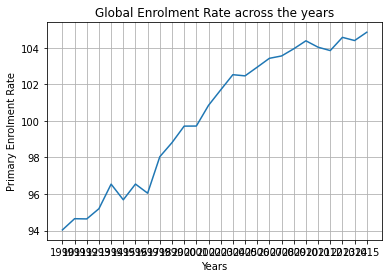

In [28]:
# Global Primary Enrolment Rate
new_df1p
x_label=new_df1p['Years']                
y_label=new_df1p['Primary Enrolment Rate']
plt.plot(x_label,y_label)
plt.title('Global Enrolment Rate across the years')
plt.ylabel('Primary Enrolment Rate')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (15, 10) 
plt.grid()

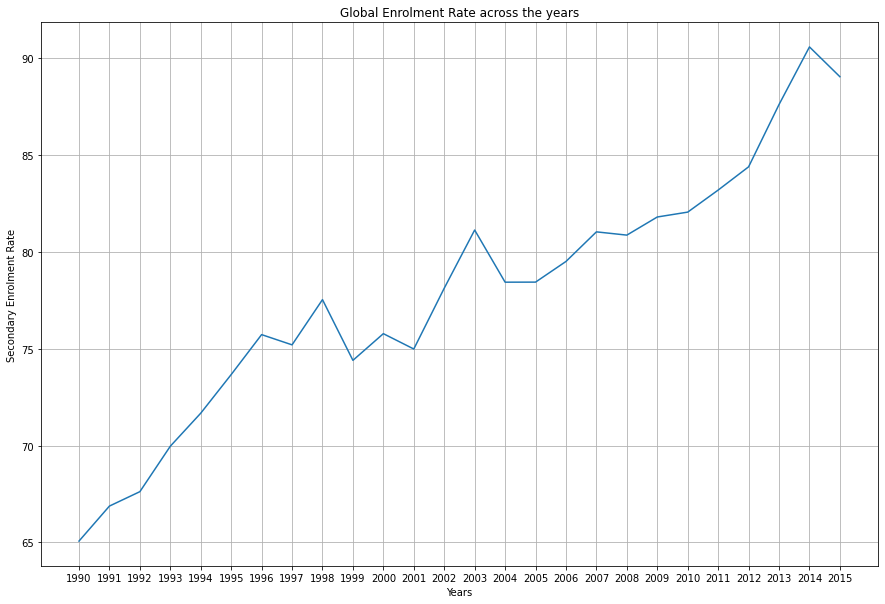

In [29]:
# Global Secondary Enrolment Rate
new_df2s
x_label=new_df2s['Years']                
y_label=new_df2s['Secondary Enrolment Rate']
plt.plot(x_label,y_label)
plt.title('Global Enrolment Rate across the years')
plt.ylabel('Secondary Enrolment Rate')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (15, 8) 
plt.grid()

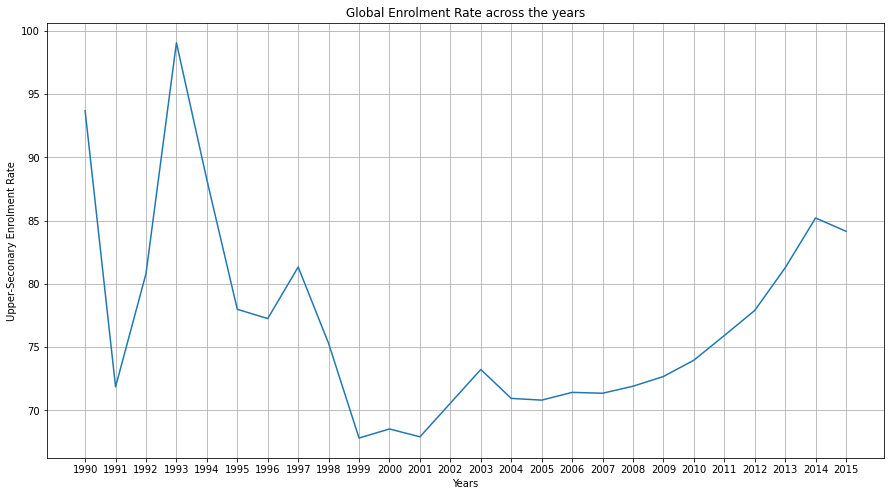

In [30]:
 # Global Upper Secondary Enrolment Rate
new_df3u
x_label=new_df3u['Years']                
y_label=new_df3u['Upper-Secondary Enrolment Rate']
plt.plot(x_label,y_label)
plt.title('Global Enrolment Rate across the years')
plt.ylabel('Upper-Seconary Enrolment Rate')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (15, 8) 
plt.grid()

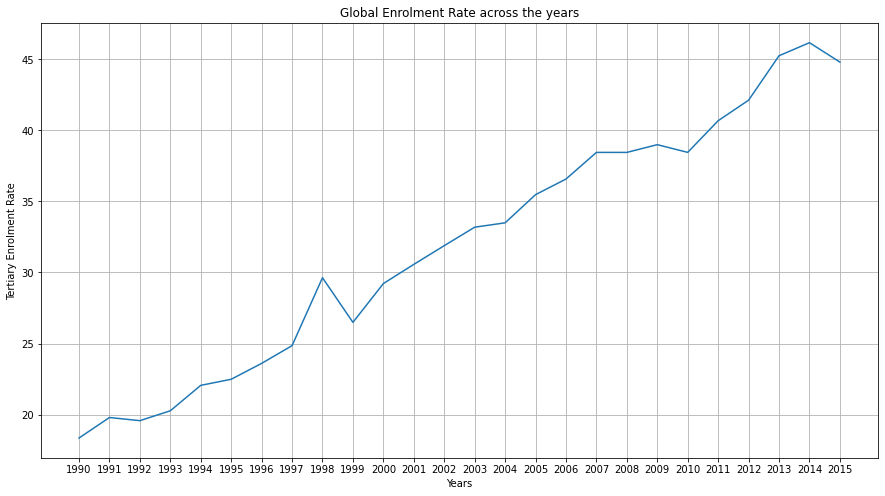

In [31]:
# Global Tertiary Enrolment Rate
new_df4t
x_label=new_df4t['Years']                
y_label=new_df4t['Tertiary Enrolment Rate']
plt.plot(x_label,y_label)
plt.title('Global Enrolment Rate across the years')
plt.ylabel('Tertiary Enrolment Rate')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (15, 8) 
plt.grid()

## Conclusion on Global Enrolment Rate

### Notedowns:
1. Enrolment Rate Range(%) or Min. to Max. Scale: Primary(94 to 106)[12], Secondary(65 to 91)[26], Upper Secondary(63 to 98)[35] and Tertiary(18 to 48)[30] 
2. Number of rate ups: Primary(14), Secondary(11), Upper Secondary(10) and Tertiary(18)
3. Number of rate downs: Primary(4), Secondary(5), Upper Secondary(7) and Tertiary(3)
4. Year of maximum fall: Primary(1994), Secondary(1998 & 2003), Upper Secondary(1990,1993 & 1997) and Tertiary(1998)

### Analysis Report:

1. Primary Education has the highest enrolment rate and Tertiary Education has lowest enrolment rate in 25 years. This tells that most of family send their children to primary school as a priority to life. And exceeding 100% in some countries due to over-aged adimission or repetition. Over-aged admission has inreased in last 10 years due to social awarness about education.

2. Tertiary education has the highest enrolment growth rate(30%) in 25 years.  This shows that more positions and opportunies opened in tertiary education. Secondary in the second with growth rate 15%. Primary in third with 12%. Primary and seconary has usual growth as most chilrens were already been sent to schools. On the other hand, Upper Secondary has negative growth rate(-%) of 10%. Due to opening of new certification and apprentice courses for 10th pass decreased the upper secondary growth rate.

3. Transition from Upper secondary to tertiary is most noticable. This tells that most of school pass out students either enrol in certification and training/apperentice courses or quit their education life.

4. From the year 2001 enrolment rate has seen continues growth rate in all levels of education. The major factors may be: imporved govt. policies, World bank awareness programs, lower inflation rate, advancement in technologies and many more. We will see some of them later.

In [32]:
# Indicator 2: Completion
indicator_with_completion
list2 = ['Primary completion rate, both sexes (%)',
 'Primary completion rate, female (%)',
 'Primary completion rate, gender parity index (GPI)',
 'Primary completion rate, male (%)',
 'MICS: Primary completion rate',
 'MICS: Primary completion rate. Female',
 'MICS: Primary completion rate. Male',
 'MICS: Secondary completion rate',
 'MICS: Secondary completion rate. Female',
 'MICS: Secondary completion rate. Male',]
completion_df = merged_df_final[merged_df_final['Indicator Name'].isin(list2)]
completion_df

Country Name Country Code  \
10505       Albania          ALB   
10506       Albania          ALB   
10507       Albania          ALB   
10508       Albania          ALB   
11883       Algeria          DZA   
...             ...          ...   
239729  Yemen, Rep.          YEM   
240689       Zambia          ZMB   
240690       Zambia          ZMB   
240691       Zambia          ZMB   
240692       Zambia          ZMB   

                                           Indicator Name  \
10505             Primary completion rate, both sexes (%)   
10506                 Primary completion rate, female (%)   
10507   Primary completion rate, gender parity index (...   
10508                   Primary completion rate, male (%)   
11883             Primary completion rate, both sexes (%)   
...                                                   ...   
239729                  Primary completion rate, male (%)   
240689            Primary completion rate, both sexes (%)   
240690                Primary completion rate, female (%)   
240691  Primary completion rate, gender parity index (...   
240692                  Primary completion rate, male (%)   

             Indicator Code       1990       1991       1992       1993  \
10505        SE.PRM.CMPT.ZS        NaN        NaN        NaN        NaN   
10506     SE.PRM.CMPT.FE.ZS        NaN        NaN        NaN        NaN   
10507   UIS.AIR.1.GLAST.GPI        NaN        NaN        NaN        NaN   
10508     SE.PRM.CMPT.MA.ZS        NaN        NaN        NaN        NaN   
11883        SE.PRM.CMPT.ZS  77.014061  76.182999  79.417892  79.182198   
...                     ...        ...        ...        ...        ...   
239729    SE.PRM.CMPT.MA.ZS        NaN        NaN        NaN        NaN   
240689       SE.PRM.CMPT.ZS        NaN        NaN        NaN        NaN   
240690    SE.PRM.CMPT.FE.ZS        NaN        NaN        NaN        NaN   
240691  UIS.AIR.1.GLAST.GPI        NaN        NaN        NaN        NaN   
240692    SE.PRM.CMPT.MA.ZS        NaN        NaN        NaN        NaN   

             1994      1995  ...       2009        2010       2011  \
10505         NaN       NaN  ...  94.086929   92.844139  98.047173   
10506         NaN       NaN  ...  93.704391   91.490822  97.628563   
10507         NaN       NaN  ...   0.992150    0.972120   0.991760   
10508         NaN       NaN  ...  94.445442   94.114517  98.439957   
11883   78.428123  79.89817  ...  91.967239   95.705559  97.772392   
...           ...       ...  ...        ...         ...        ...   
239729        NaN       NaN  ...        NaN   74.545227        NaN   
240689        NaN       NaN  ...  84.642899   97.803711        NaN   
240690        NaN       NaN  ...  79.894203  102.472054        NaN   
240691        NaN       NaN  ...   0.894040    1.099900        NaN   
240692        NaN       NaN  ...  89.363602   93.164917        NaN   

              2012        2013        2014        2015       Currency Unit  \
10505   103.618843   94.522743  107.821320  106.367561        Albanian lek   
10506   102.668831   91.624779  107.814919  104.699371        Albanian lek   
10507     0.982440    0.942580    0.999890         NaN        Albanian lek   
10508   104.504120   97.206863  107.827202  107.900124        Albanian lek   
11883   101.701042  106.223831  108.642738  105.799019      Algerian dinar   
...            ...         ...         ...         ...                 ...   
239729   78.357948   77.022102         NaN         NaN         Yemeni rial   
240689   88.741020   81.009048         NaN         NaN  New Zambian kwacha   
240690   89.065643   79.918831         NaN         NaN  New Zambian kwacha   
240691    1.007320    0.973540         NaN         NaN  New Zambian kwacha   
240692   88.418648   82.091133         NaN         NaN  New Zambian kwacha   

                            Region         Income Group  
10505        Europe & Central Asia  Upper middle income  
10506        Europe & Central Asia  Upper midd

In [33]:

primary_df2 = completion_df[completion_df['Indicator Name']=='Primary completion rate, both sexes (%)']
secondary_df2 = completion_df[completion_df['Indicator Name']=='MICS: Secondary completion rate']

new_df11 =  primary_df2[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'Primary Completion Rate'})
new_df22 = secondary_df2[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'Secondary Completion Rate'})


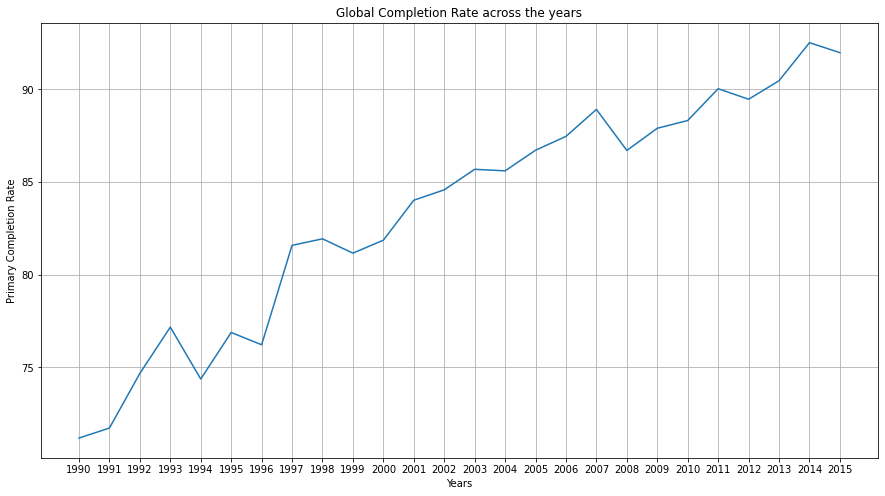

In [34]:

# Global Primary Completion Rate
new_df11
x_label=new_df11['Years']                
y_label=new_df11['Primary Completion Rate']
plt.plot(x_label,y_label)
plt.title('Global Completion Rate across the years')
plt.ylabel('Primary Completion Rate')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (20, 8) 
plt.grid()

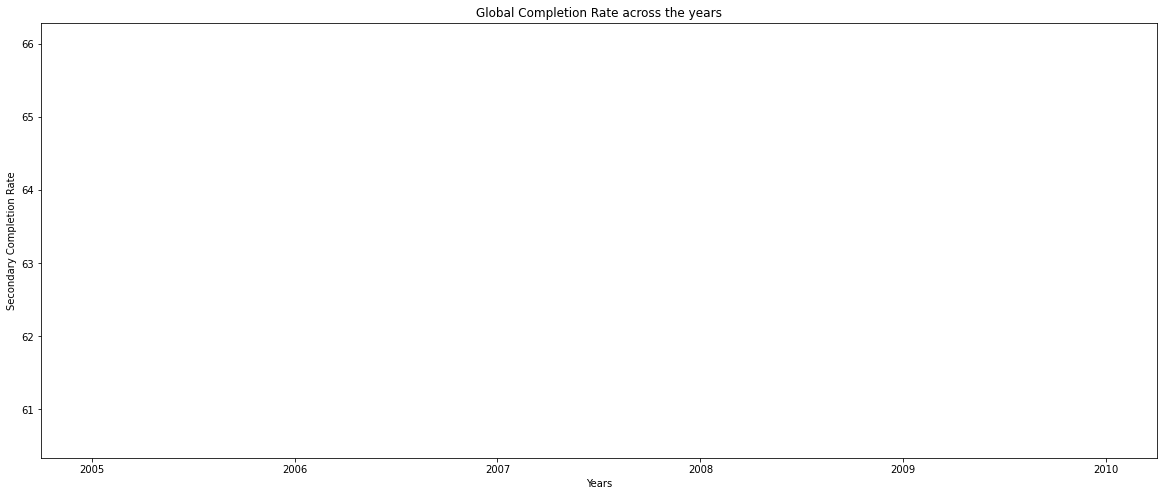

In [35]:
# Graph is null for Secondary Education
new_df22
x_label=new_df22['Years']                
y_label=new_df22['Secondary Completion Rate']
plt.plot(x_label,y_label)
plt.title('Global Completion Rate across the years')
plt.ylabel('Secondary Completion Rate')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (20, 8) 

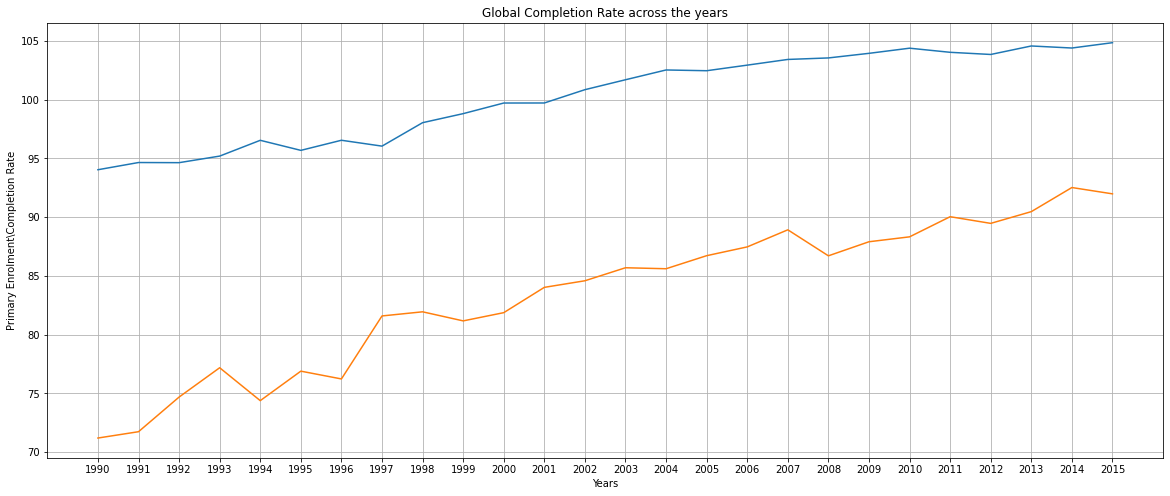

In [36]:
# Comparing Primary enrolment and completion rate
comp_enrol_merge = pd.merge(new_df1p,new_df11, how='left', on='Years')
comp_enrol_merge
x_label=comp_enrol_merge['Years']                
y_label=comp_enrol_merge[['Primary Enrolment Rate','Primary Completion Rate']]
plt.plot(x_label,y_label)
plt.title('Global Completion Rate across the years')
plt.ylabel('Primary Enrolment\Completion Rate')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (20, 8) 
plt.grid()

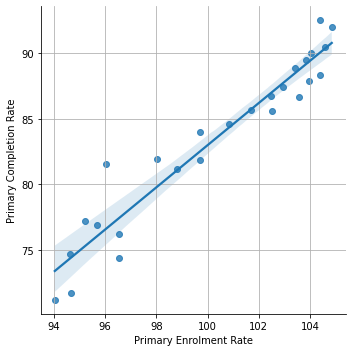

In [37]:
comp_enrol_merge = pd.merge(new_df1p,new_df11, how='left', on='Years')
comp_enrol_merge
sb.lmplot(x = 'Primary Enrolment Rate', y = 'Primary Completion Rate', data = comp_enrol_merge)
plt.grid()

## Comparing Enrolment rate vs completion rate
1. Blue line in enrolment rate and Orange line is completion rate.
2. The average shift between enrolment and completion rate is 12%. This means on an average 12% of      students fails to complete schoolings in time. 
3. The year 1990 had the highest differance of 23% in enrolment and completion.
4. The gap has improved a lot in last 10 years starting from 2008. The shift has decreased from 23% in 1990 to 11% in 2014.

### No data available for completion rate of secondary, upper secondary and tertiary education.

In [38]:
# Indicator 3 : Literacy Rate
literacy_df = merged_df_final[merged_df_final['Indicator Name'].isin(indicator_with_literacy)]

In [39]:
literacy_df['Indicator Name'].unique()

adult_df = literacy_df[literacy_df['Indicator Name']=='Adult literacy rate, population 15+ years, both sexes (%)']
youth_df = literacy_df[literacy_df['Indicator Name']=='Youth literacy rate, population 15-24 years, both sexes (%)']
elderly_df = literacy_df[literacy_df['Indicator Name']=='Elderly literacy rate, population 65+ years, both sexes (%)']
youth_male_df = literacy_df[literacy_df['Indicator Name']=='Youth literacy rate, population 15-24 years, male (%)']
youth_female_df = literacy_df[literacy_df['Indicator Name']=='Youth literacy rate, population 15-24 years, female (%)']

new_df1111 =  adult_df[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'Adult literacy Rate'})
new_df2222 = youth_df[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'Youth literacy Rate'})
new_df3333 = elderly_df[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'Elderly literacy Rate'})

youth_female = youth_female_df[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'Female Youth literacy Rate'})

youth_male = youth_male_df[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'Male Youth literacy Rate'})


In [40]:
# Comparing Male and Female Literacy
youth_female['Gender'] = 'female'
youth_male['Gender'] = 'male'
literacy_all = pd.concat([youth_female, youth_male])
literacy_all['Female Youth literacy Rate'] = literacy_all['Female Youth literacy Rate'].fillna(0)
literacy_all['Male Youth literacy Rate'] = literacy_all['Male Youth literacy Rate'].fillna(0)
literacy_all['Literacy'] = literacy_all['Female Youth literacy Rate'] + literacy_all['Male Youth literacy Rate']
liter_final = literacy_all[['Years', 'Literacy', 'Gender']]
liter_final
fig = px.bar(liter_final, x='Years', y='Literacy', color='Gender')
fig.show()

In [41]:
adult_df_sorted = adult_df.sort_values('2010', ascending=False)
list(adult_df_sorted.tail(10)['Country Name'])

['Ghana',
 'Cameroon',
 'Tanzania',
 'Rwanda',
 'Malawi',
 'Timor-Leste',
 'Pakistan',
 'Central African Republic',
 'Mali',
 'Guinea']

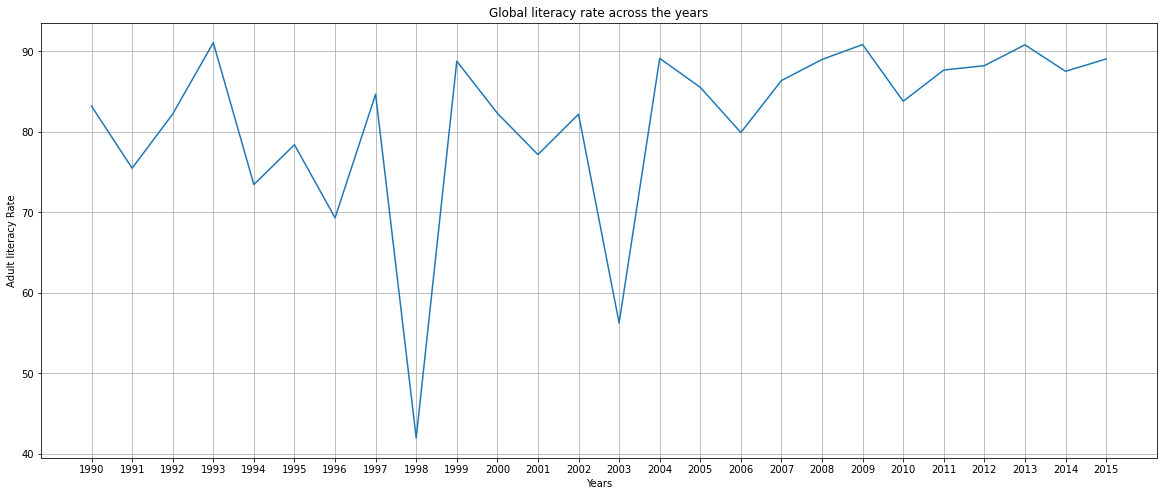

In [42]:
new_df1111
x_label=new_df1111['Years']                
y_label=new_df1111[['Adult literacy Rate']]
plt.plot(x_label,y_label)
plt.title('Global literacy rate across the years')
plt.ylabel('Adult literacy Rate')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (20, 8)
plt.grid()

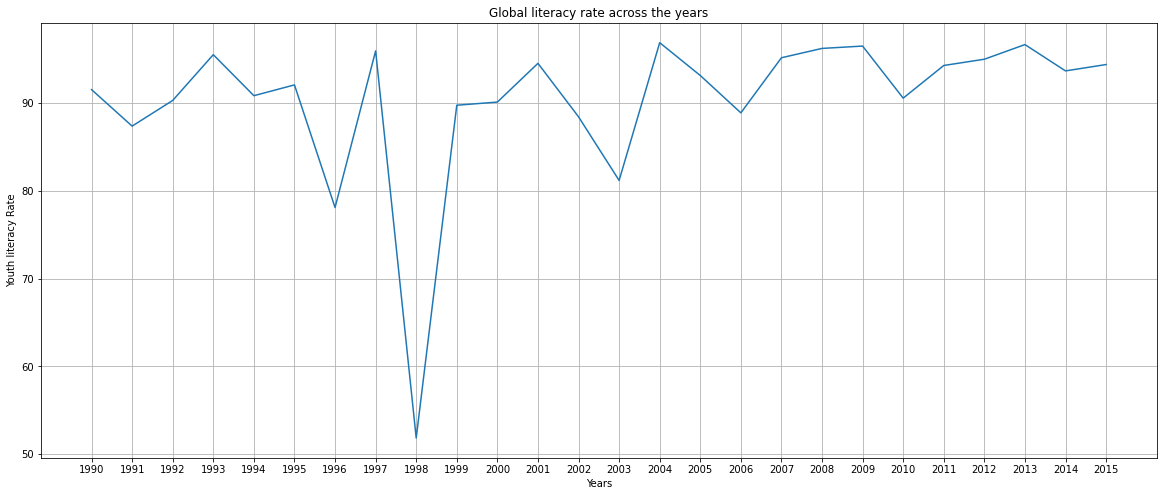

In [43]:
new_df2222
x_label=new_df2222['Years']                
y_label=new_df2222[['Youth literacy Rate']]
plt.plot(x_label,y_label)
plt.title('Global literacy rate across the years')
plt.ylabel('Youth literacy Rate')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (20, 8)
plt.grid()

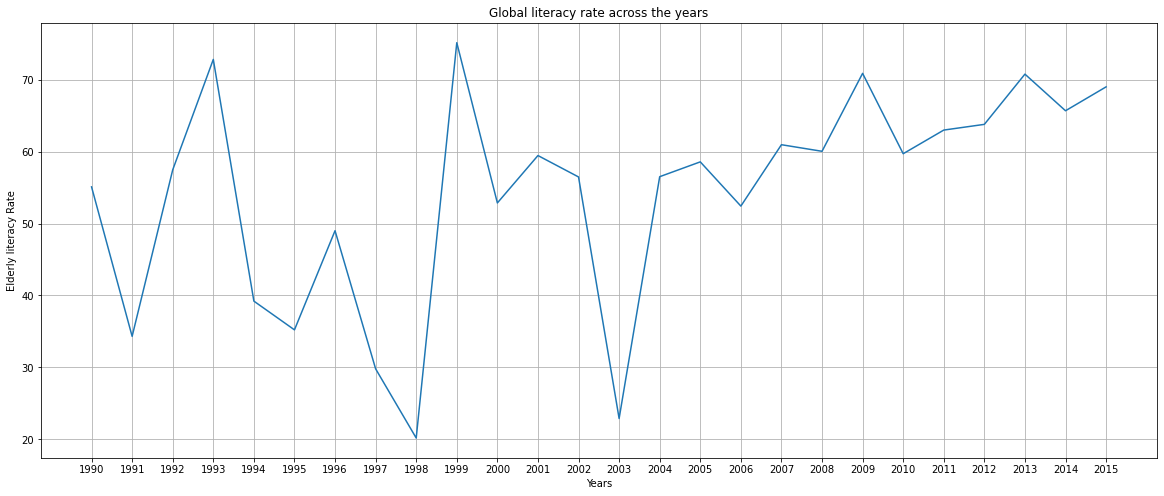

In [44]:
new_df3333
x_label=new_df3333['Years']                
y_label=new_df3333[['Elderly literacy Rate']]
plt.plot(x_label,y_label)
plt.title('Global literacy rate across the years')
plt.ylabel('Elderly literacy Rate')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (20, 8)
plt.grid()

### Enrolment rate vs literacy rate

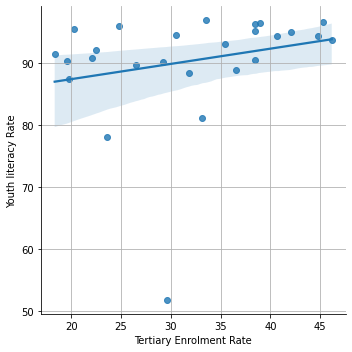

In [45]:
lite_enrol_merge = pd.merge(new_df4t,new_df2222, how='left', on='Years')
lite_enrol_merge
sb.lmplot(x = 'Tertiary Enrolment Rate', y = 'Youth literacy Rate', data = lite_enrol_merge)
plt.grid()

## Conlusion on Global Literacy Rate:
### Notedown
### Adult Literacy Rate:
  min. = 42(1998)
  max. = 91(1993,2009,2013)
  1990 = 83
  2015 = 89
  ziz-zag change in literacy rate
  overall, the increase in literacy is very small(6)
  In year 1998 & 2003, it decrease a lot. The reason may be
### Youth Literacy Rate:
  min. = 52(1998) \
  max. = 96-97(1993,1997,2004,2009,2013)
  1990 = 91
  2015 = 95
  ziz-zag change in literacy rate
  overall, the increase in literacy is very small(4)
  In year 1998, it decrease a lot. The reason may be
### Elderly Literacy Rate:
  min. = 20(1998)
  max. = 75(1993,1997,2004,2009,2013)
  1990 = 55
  2015 = 69
  ziz-zag change in literacy rate
  overall, the increase in literacy is okay(14)
  In year 1998, it decreased the most. The reason may be
  
### Report:
1. Elderly Literacy rate(69%) is the lowest of all. Then comes Adult literacy rate(89%) and finally at highest    is the Youth Literacy rate(95%). This a good sign towards an educating youth world.
2. In all the three cases, the literacy rate exponentially decreased in the year 1998. There must be    some global issue behind this.
3. Literacy rate shows a totally different graph from enrolment and completion rates,i.e. zig-zag.      This means that literacy rate stays almost same over the 25 years. And there must be many factors    behind this. The main reason behind this is not GNI per capita but level of awareness and freedom    of education to women in many countries.

In [46]:
# Indicator 4 : Unemployment
unemployment_df = merged_df_final[merged_df_final['Indicator Name'].isin(indicator_with_Unemployment)]

In [47]:
unemployment_df['Indicator Name'].unique()
female_df = unemployment_df[unemployment_df['Indicator Name']=='Unemployment, female (% of female labor force)']
male_df = unemployment_df[unemployment_df['Indicator Name']=='Unemployment, male (% of male labor force)']
total_df = unemployment_df[unemployment_df['Indicator Name']=='Unemployment, total (% of total labor force)']

new_df_female =  female_df[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'Female Unemployment'})
new_df_male = male_df[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'Male Unemployment'})
new_df_total = total_df[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'Total Unemployment'})


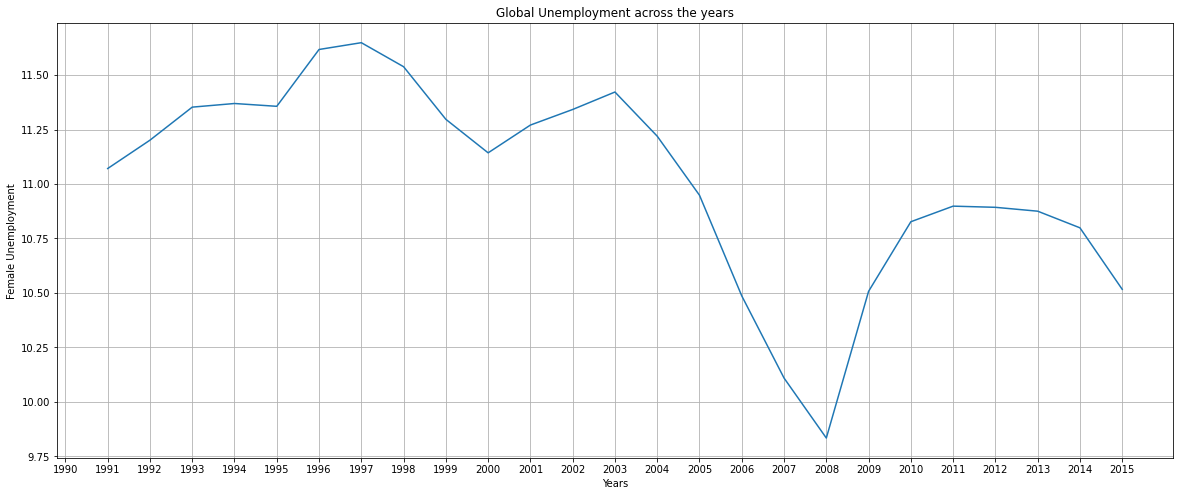

In [48]:
new_df_female
x_label=new_df_female['Years']                
y_label=new_df_female[['Female Unemployment']]
plt.plot(x_label,y_label)
plt.title('Global Unemployment across the years')
plt.ylabel('Female Unemployment')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (20, 8)
plt.grid()

### Female Unemployment Report:
1. Max: 11.65 (1997) ; Min: 9.85 (2008) ; 
2. Overall shift: (1.8%) (1997 to 2008)
3. 1991 (11.10)  --> 2015 (10.50) (0.6) ; Perc. unemployment decline: 5.4% 
4. Maximum graph decline (2003 to 2008) ; Maximum graph Growth (2008 to 2011)

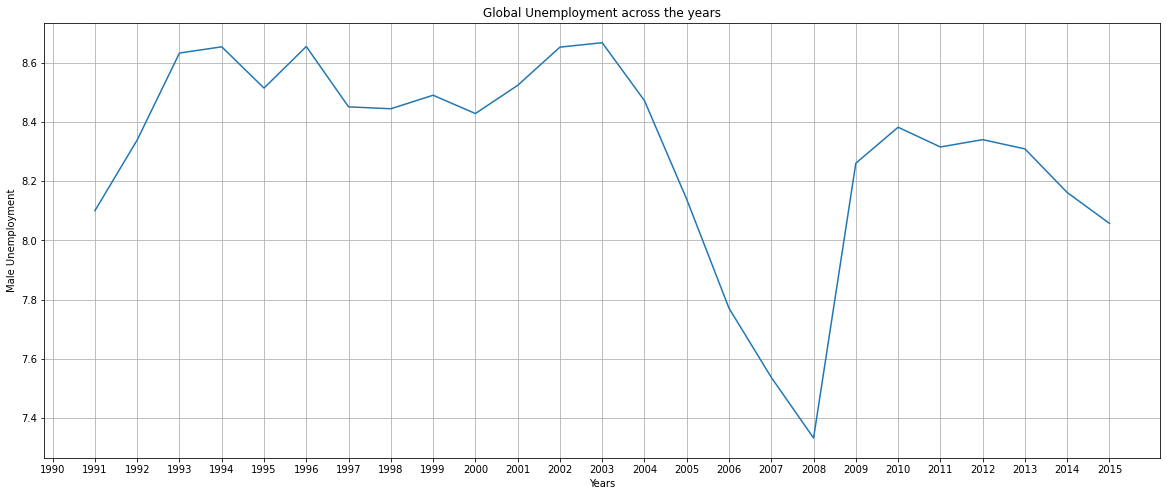

In [49]:
new_df_male
x_label=new_df_male['Years']                
y_label=new_df_male[['Male Unemployment']]
plt.plot(x_label,y_label)
plt.title('Global Unemployment across the years')
plt.ylabel('Male Unemployment')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (20, 8)
plt.grid()

### Male Unemployment Report:
1. Max: 8.66 (2003) ; Min: 7.35 (2008) 
2. Overall shift: (1.31%) (2003 to 2008)
3. 1991 (8.10)  --> 2015 (8.05)  (0.05)  ;  Perc. unemployment decline: 0.62%
4. Highest decline (2003 to 2008) ; Highest Growth (2008 to 2010)

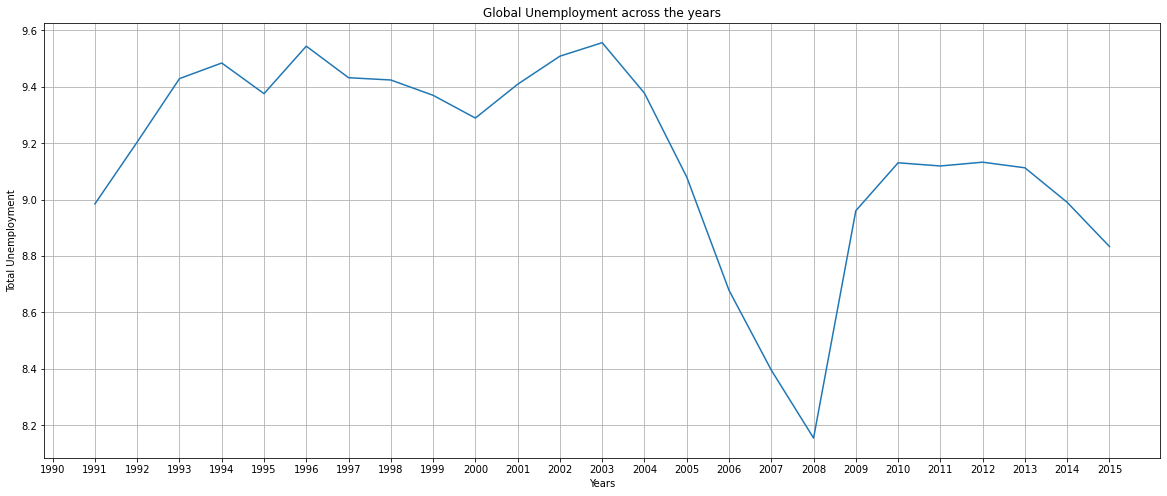

In [50]:
new_df_total
x_label=new_df_total['Years']                
y_label=new_df_total[['Total Unemployment']]
plt.plot(x_label,y_label)
plt.title('Global Unemployment across the years')
plt.ylabel('Total Unemployment')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (20, 8)
plt.grid()

### Total Unemployment Report:
1. Max: 9.55 (2003) ; Min: 8.15 (2008) 
2. Overall shift: (1.40%) (2003 to 2008)
3. 1991 (9.00)  --> 2015 (8.8)  (0.20)  Perc. unemployment decline: 2.2%
4. Highest decline (2003 to 2008) ; Highest Growth (2008 to 2010)

In [51]:
# Comparing Male and Female unemploment
new_df_female['Gender'] = 'female'
new_df_male['Gender'] = 'male'
unemployment_all = pd.concat([new_df_female, new_df_male])
unemployment_all['Female Unemployment'] = unemployment_all['Female Unemployment'].fillna(0)
unemployment_all['Male Unemployment'] = unemployment_all['Male Unemployment'].fillna(0)
unemployment_all['Unemployment'] = unemployment_all['Female Unemployment'] + unemployment_all['Male Unemployment']
unempl_final = unemployment_all[['Years', 'Unemployment', 'Gender']]
unempl_final
fig = px.bar(unempl_final, x='Years', y='Unemployment', color='Gender')
fig.show()

## Report on Unemployment
1. More females are unemployed than males.
2. Unemployment in female is declining at a faster rate as compared to male.
3. Females employement rate increased 9 times faster than that of male. 
4. Overall empoyment has increased by 2.2% globaly.
5. Employment has increased most between the years 2003 to 2008. And surprisingly, employment declines exonentially from 2008 onward. This happend due to unstabiliy on Global Stock Market of 2008.

In [52]:
total_df

Country Name Country Code  \
9612              Afghanistan          AFG   
10651                 Albania          ALB   
12017                 Algeria          DZA   
13268                  Angola          AGO   
15034               Argentina          ARG   
...                       ...          ...   
237668  Virgin Islands (U.S.)          VIR   
238544     West Bank and Gaza          PSE   
239867            Yemen, Rep.          YEM   
240793                 Zambia          ZMB   
242133               Zimbabwe          ZWE   

                                      Indicator Name  Indicator Code  1990  \
9612    Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
10651   Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
12017   Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
13268   Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
15034   Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
...                                              ...             ...   ...   
237668  Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
238544  Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
239867  Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
240793  Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
242133  Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   

        1991       1992       1993  1994       1995  ...  2009       2010  \
9612     1.3   0.800000   0.700000   0.6   1.800000  ...   8.2   8.100000   
10651   12.7  13.600000  15.000000  14.8  14.300000  ...  13.8  14.200000   
12017   20.6  23.000000  23.200001  24.4  27.900000  ...  10.2  10.000000   
13268    6.2   6.100000   5.900000   6.2   6.400000  ...   6.2   6.200000   
15034    5.8   6.700000  10.100000  12.1  18.799999  ...   8.6   7.700000   
...      ...        ...        ...   ...        ...  ...   ...        ...   
237668   8.9   8.900000   7.600000   9.9   9.000000  ...   9.0   7.900000   
238544  26.6  29.200001  24.799999  26.5  23.500000  ...  24.6  23.700001   
239867  10.6  13.000000  15.800000   8.3  15.100000  ...  14.6  17.799999   
240793  18.9  19.299999  19.700001  18.6  17.400000  ...   8.6  10.800000   
242133   5.8   5.900000   6.000000   5.0   5.500000  ...   5.5   6.200000   

             2011  2012  2013  2014       2015       Currency Unit  \
9612     8.200000   8.0   8.4   8.6   8.600000      Afghan afghani   
10651   14.000000  13.4  15.6  17.5  17.100000        Albanian lek   
12017   10.000000  11.0   9.8  10.6  11.200000      Algerian dinar   
13268    6.200000   6.2   6.2   6.2   6.200000      Angolan kwanza   
15034    7.200000   7.2   7.1   7.3   7.200000      Argentine peso   
...           ...   ...   ...   ...        ...                 ...   
237668   9.100000   9.9   9.0   8.2   8.100000         U.S. dollar   
238544  20.900000  23.0  23.4  26.9  25.900000  Israeli new shekel   
239867  17.299999  17.6  17.6  17.4  16.700001         Yemeni rial   
240793  13.600000   7.8   7.8   7.7   7.700000  New Zambian kwacha   
242133   5.400000   5.3   5.2   5.1   5.100000         U.S. dollar   

                            Region          Income Group  
9612                    South Asia            Low income  
10651        Europe & Central Asia   Upper middle income  
12017   Middle East & North Africa   Upper middle income  
13268           Sub-Saharan Africa   Upper middle income  
15034    Latin America & Caribbean   Upper middle income  
...                            ...                   ...  
237668   Latin America & Caribbean  High income: nonOECD  
238544  Middle East & North Africa   Lower middle income  
239867  Middle East & North Africa   Lower middle income  
240793          Sub-Saharan Africa   Lower middle income  
242133          Sub-Saharan Africa            Low income  

[186 rows x 33 columns]

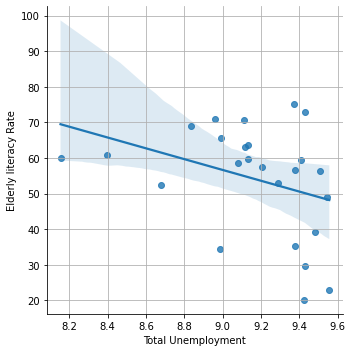

In [53]:
# Youth Literacy Rate vs total unemployment
lite_enrol_merge = pd.merge(new_df_total ,new_df3333, how='left', on='Years')
lite_enrol_merge
sb.lmplot(x = 'Total Unemployment', y = 'Elderly literacy Rate', data = lite_enrol_merge)
plt.grid()

In [54]:
# Indicator 5 : GDP of country and Expenditure
list4 = ['GDP at market prices (constant 2005 US$)','GDP, PPP (constant 2011 international $)', 
         'GDP per capita, PPP (constant 2011 international $)','GDP per capita (constant 2005 US$)']
list5 = ['Government expenditure on education as % of GDP (%)', 'Government expenditure in tertiary institutions as % of GDP (%)',
       'Government expenditure on post-secondary non-tertiary education as % of GDP (%)',
        'Government expenditure on tertiary education as % of GDP (%)',
       'Government expenditure per post-secondary non-tertiary student as % of GDP per capita (%)'
        'Government expenditure in educational institutions as % of GDP (%)'
        'Government expenditure per tertiary student as % of GDP per capita (%)',
       'Government expenditure per upper secondary student as % of GDP per capita (%)',
       'Government expenditure on secondary and post-secondary non-tertiary vocational education as % of GDP (%)']
GDP_df = merged_df_final[merged_df_final['Indicator Name'].isin(list4)] 
Expenditure_df = merged_df_final[merged_df_final['Indicator Name'].isin(list5)]

In [55]:
GDP_df['Indicator Name'].unique()
GDP1_df = GDP_df[GDP_df['Indicator Name']=='GDP at market prices (constant 2005 US$)']
GDP2_df = GDP_df[GDP_df['Indicator Name']=='GDP per capita (constant 2005 US$)']
GDP3_df = GDP_df[GDP_df['Indicator Name']=='GDP, PPP (constant 2011 international $)']

new_df_GDP1 =  GDP1_df[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].sum().reset_index().rename(columns={'index':'Years', 0:'GDP at market prices'})
new_df_GDP2 = GDP2_df[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'GDP per capita'})
new_df_GDP3 = GDP3_df[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].sum().reset_index().rename(columns={'index':'Years', 0:'GDP PPP'})


In [56]:
new_df_GDP1

Years  GDP at market prices
0   1990          3.726024e+13
1   1991          3.787370e+13
2   1992          3.862498e+13
3   1993          3.924768e+13
4   1994          4.042730e+13
5   1995          4.179184e+13
6   1996          4.320400e+13
7   1997          4.480325e+13
8   1998          4.592924e+13
9   1999          4.746262e+13
10  2000          4.958110e+13
11  2001          5.054813e+13
12  2002          5.164478e+13
13  2003          5.314429e+13
14  2004          5.549913e+13
15  2005          5.762738e+13
16  2006          6.011019e+13
17  2007          6.265641e+13
18  2008          6.380038e+13
19  2009          6.268980e+13
20  2010          6.538319e+13
21  2011          6.744111e+13
22  2012          6.906602e+13
23  2013          7.088544e+13
24  2014          7.277275e+13
25  2015          7.440728e+13

In [57]:
GDP2_df.sort_values('2010', ascending=False).reset_index()['2010']

0      144246.368775
1      141165.082857
2      104965.306078
3       88207.327560
4       87770.266844
           ...      
197       348.151511
198       341.309909
199       327.420510
200       318.075752
201       231.194326
Name: 2010, Length: 202, dtype: float64

In [58]:
GDP1_df.sort_values('2010', ascending=False).reset_index()['2010']

0      1.496437e+13
1      6.100620e+12
2      5.700098e+12
3      3.417095e+12
4      2.646837e+12
           ...     
197    1.974541e+08
198    1.833351e+08
199    1.649691e+08
200    1.532759e+08
201    3.182352e+07
Name: 2010, Length: 202, dtype: float64

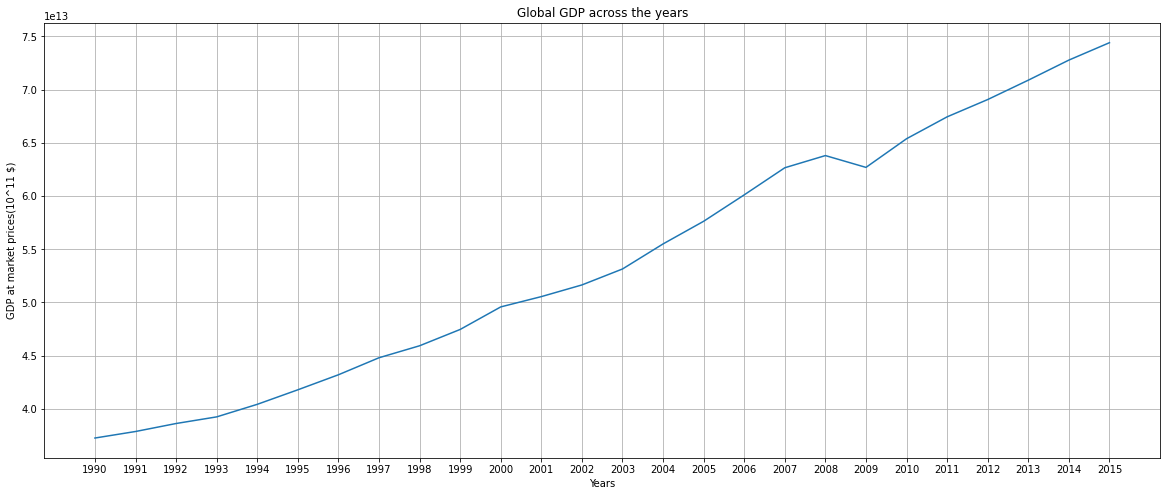

In [59]:
new_df_GDP1
x_label=new_df_GDP1['Years']                
y_label=new_df_GDP1[['GDP at market prices']]
plt.plot(x_label,y_label)
plt.title('Global GDP across the years')
plt.ylabel('GDP at market prices(10^11 $)')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (20, 8)
plt.grid()

### GDP at market prices - It is the sum of the gross values added of all residents producers at market prices, plus taxes less subsidies on imports. Also, Nominal GDP is GDP evaluated at current prices. So, we can call it Nominal GDP as well.


1. The global GDP increased linearly from 1990(37 Trillion USD) to 2008(64 Trillion USD). It decreased by 1.56% in 2008-09 due to stock market crash. It speeded up again after 2009 and reached  74.5 Trillion USD in 2015. The current(2021) GDP at market price is 93.86 Trillion USD.
2. 10 year ratio comparision: (Before 2008 and After 2008)
   Before 2008 (1998-2008)
   64/46 = 1.39
   After 2008 (2009-2019)
   87/63 = 1.38
   So, the rate of GDP growth at market price was not affected by the economic recession.
3. GDP at market price grown globally from 37 Trillion USD in 1990 to 74.5 Trillion USD in 2015,i.e., more than 2 times(or 200%) as initially in 25 years. 

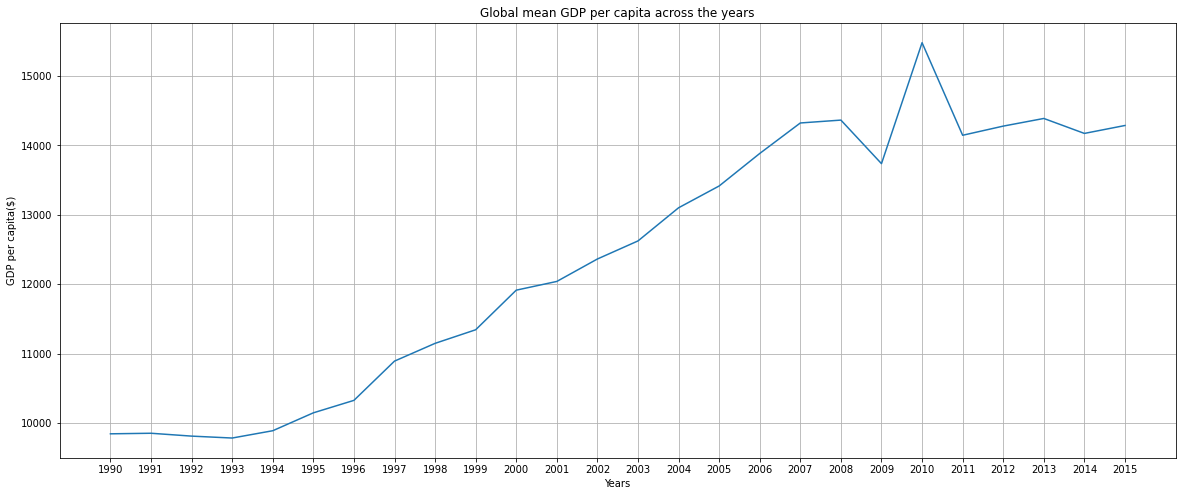

In [60]:
new_df_GDP2 
x_label=new_df_GDP2['Years']                
y_label=new_df_GDP2[['GDP per capita']]
plt.plot(x_label,y_label)
plt.title('Global mean GDP per capita across the years')
plt.ylabel('GDP per capita($)')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (20, 8)
plt.grid()

### GDP per capita - It is the annual summation of total produced value of a country per person

1. GDP per capita stays almost constant from 1990 to 1993, then sharply and sometime linearly increases upto 2007 and again seems constant for a year. In 2008-09, it is decreased by 4.17% and then changed zig-zag till 2015. It was highest in 2010.
2. GDP per capita grown from 9,900 USD in 1990 to 14,300 USD in 2015,i.e., 1.5 times(or 150%) as it was initially in 25 years.

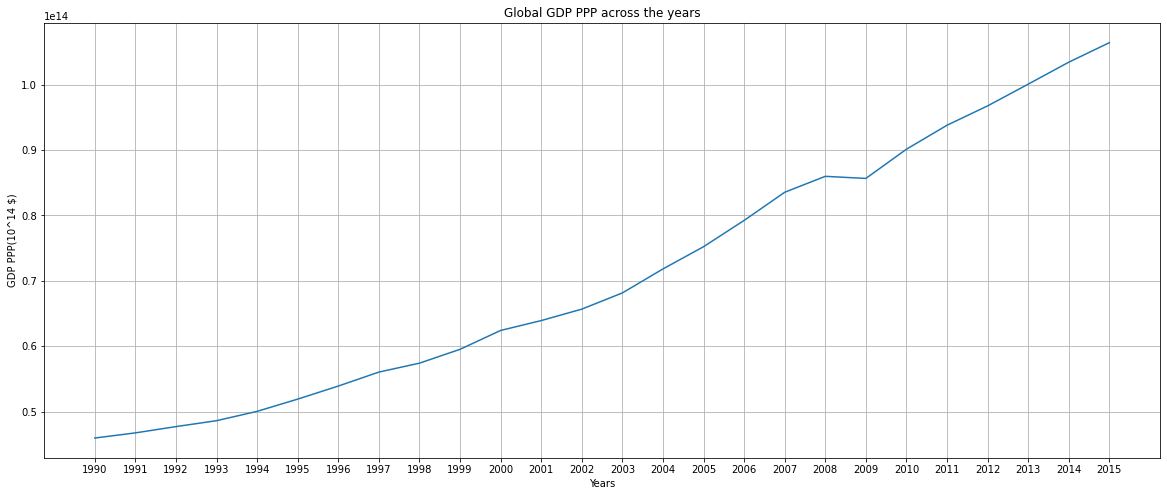

In [61]:
new_df_GDP3
x_label=new_df_GDP3['Years']                
y_label=new_df_GDP3[['GDP PPP']]
plt.plot(x_label,y_label)
plt.title('Global GDP PPP across the years')
plt.ylabel('GDP PPP(10^14 $)')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (20, 8)
plt.grid()

### GDP (PPP) - GDP in purchasing power parity is the GDP of a nation based on cost of living w.r.t. other countries
1. GDP (PPP) seem to be unaffacted by the financial crisis of 2008. It is almost constant in 2008-2009. In an indirect manner, this also means that GDP(PPP) of some countries has increased while others decreased.
2. It grown from 50 trillion USD in 1990 to 150 trillion USD in 2015,i.e., 3 times(300%) increment in 25 years.
3. It is changing almost linear in the 25 years of timeline.

## Conclusion
1. GDP PPP growth rate is higher than Nominal GDP. This means cost of leaving has non-linear relation with overall production values of the nation. This also means that cost of leaving of most of the countries is comparatively low. With low cost of living, more money can be saved for better educational and healt investment. 

In [62]:
Expenditure_df['Indicator Name'].unique()

Expenditure1_df = Expenditure_df[Expenditure_df['Indicator Name']=='Government expenditure on education as % of GDP (%)']
Expenditure2_df = Expenditure_df[Expenditure_df['Indicator Name']=='Government expenditure per upper secondary student as % of GDP per capita (%)']
Expenditure3_df = Expenditure_df[Expenditure_df['Indicator Name']=='Government expenditure on tertiary education as % of GDP (%)']

new_df_Expenditure1 =  Expenditure1_df[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'Govt. expenditure on education'})
new_df_Expenditure2 = Expenditure2_df[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'Govt. expenditure per upper secondary student'})
new_df_Expenditure3 = Expenditure3_df[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'Govt. expenditure on tertiary education'})


In [63]:
Expenditure1_df_sorted = Expenditure1_df.sort_values('2010', ascending=False)
list(Expenditure1_df_sorted.head(10)['Country Name'])

['Cuba',
 'Timor-Leste',
 'Solomon Islands',
 'Sao Tome and Principe',
 'Moldova',
 'Denmark',
 'Namibia',
 'Bolivia',
 'Iceland',
 'New Zealand']

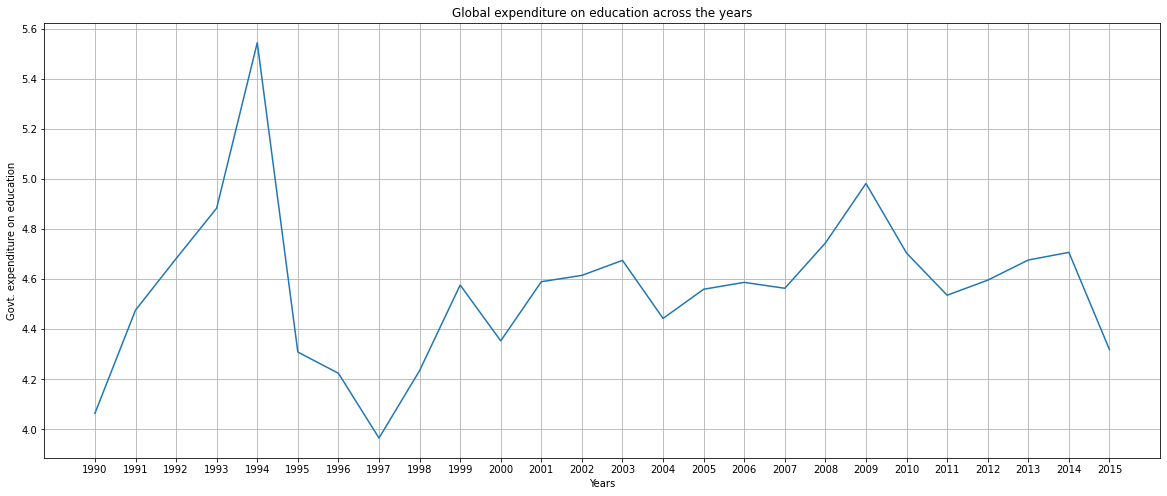

In [64]:
new_df_Expenditure1  # as % of GDP
x_label=new_df_Expenditure1['Years']                
y_label=new_df_Expenditure1[['Govt. expenditure on education']]
plt.plot(x_label,y_label)
plt.title('Global expenditure on education across the years')
plt.ylabel('Govt. expenditure on education')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (20, 8)
plt.grid()

### Report on Govt. expenditure on education as percentage(%) of GDP:
1. 1990 - 4.05; 2015 - 4.3, Overall change - 0.25
2. Max(1994) - 5.55, Min(1997) - 4.00; Range - 1.55
3. In the 25 year period, the expenditure on education across globe is almost same. This shows that      most of the governments around the world has negligency towards education and that's why there are    maximum no. of undeveloped and developing countries. There could be other reasons also.

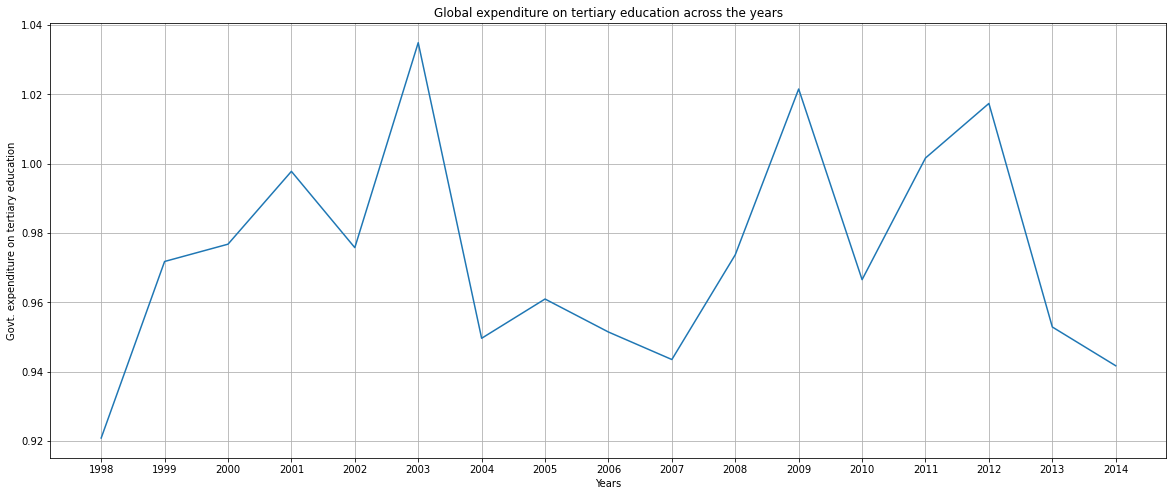

In [65]:
new_df_Expenditure3  # as % of GDP
x_label=new_df_Expenditure3['Years']                
y_label=new_df_Expenditure3[['Govt. expenditure on tertiary education']]
plt.plot(x_label,y_label)
plt.title('Global expenditure on tertiary education across the years')
plt.ylabel('Govt. expenditure on tertiary education')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (20, 8)
plt.grid()

### Govt. expenditure on tertiary education(Higher studies) as percentage(%) of GDP:
1. 1998 - 0.92; 2014 - 0.94; Overall change - 0.02%
2. Max(2003) - 1.03; Min(1998) - 0.92; Range - 0.11%
3. Comparing to toal govt. expenditure, approx. 25% expenditure is on tertiary education. 
4. Comparing to rate of overall change in total expenditure, the expenditure on tertiary education      has approximately 20% more increase in rate as compared to other education levels.
5. This all means that tertiary education is given atmost priority which is the base of employment.

In [66]:
# Indicator 6 : Population
list7 = ['Barro-Lee: Population in thousands, age 15+, female',
       'Barro-Lee: Population in thousands, age 15+, total',
        'Barro-Lee: Population in thousands, age 25+, female',
       'Barro-Lee: Population in thousands, age 25+, total',
        'Population growth (annual %)',
        'Population of compulsory school age, both sexes (number)',
       'Population of compulsory school age, female (number)',
       'Population of compulsory school age, male (number)',]
population_df = merged_df_final[merged_df_final['Indicator Name'].isin(list7)]

In [67]:
population_df['Indicator Name'].unique()

population_growth_df = population_df[population_df['Indicator Name']=='Population growth (annual %)']
population_comp1_df = population_df[population_df['Indicator Name']=='Population of compulsory school age, both sexes (number)']
population_comp2_df = population_df[population_df['Indicator Name']=='Population of compulsory school age, female (number)']
population_comp3_df = population_df[population_df['Indicator Name']=='Population of compulsory school age, male (number)']

       

new_df_population_growth =  population_growth_df[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'Population growth (annual %)'})
new_df_population1 = population_comp1_df[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].sum().reset_index().rename(columns={'index':'Years', 0:'Population of compulsory school age, all'})
new_df_population2 = population_comp2_df[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].sum().reset_index().rename(columns={'index':'Years', 0:'Population of compulsory school age, female'})
new_df_population3 = population_comp3_df[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].sum().reset_index().rename(columns={'index':'Years', 0:'Population of compulsory school age, male'})


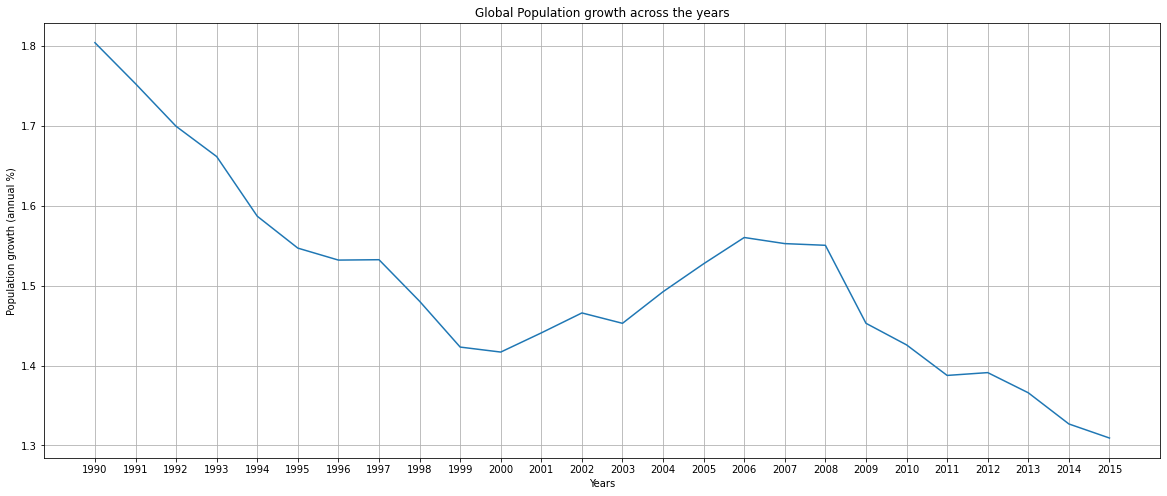

In [68]:
new_df_population_growth
x_label=new_df_population_growth['Years']                
y_label=new_df_population_growth[['Population growth (annual %)']]
plt.plot(x_label,y_label)
plt.title('Global Population growth across the years')
plt.ylabel('Population growth (annual %)')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (20, 8)
plt.grid()

### Report on population growth (%)
1. 1990 - 1.8(Max); 2015 - 1.31(Min); Overall change - 0.51
2. Contineous decline from 1990(1.8%) to 2000(1.42%), increased from 2000 to 2006(1.55%) with 0.01 decline in 2002-03. Finally, started declining from 2006 till 2015.
3. During end of 20th century, decline rate was 0.038/year. While during start of 21st century, it was 0.026/year. This means, with time population growth decline is getting worse. So, better policies and more awareness is the need of time for population control.

In [69]:
# Indicator 7.1: Teachers and teachers percentage
list8 = ['Teachers in primary education, both sexes (number)',
       'Teachers in primary education, female (number)',
         'Teachers in primary education, male (number)',
        'Teachers in secondary education, both sexes (number)',
       'Teachers in secondary education, female (number)',
        'Teachers in upper secondary education, both sexes (number)',
       'Teachers in upper secondary education, female (number)',
       'Teachers in tertiary education programmes, both sexes (number)',
       'Teachers in tertiary education programmes, female (number)']
teachers_df = merged_df_final[merged_df_final['Indicator Name'].isin(list8)]

In [70]:
teachers_df['2010'].sum()  # Maximum data available

93018183.30859375

In [71]:

teachers_df1 = teachers_df[teachers_df['Indicator Name']=='Teachers in primary education, both sexes (number)']
teachers_df2 = teachers_df[teachers_df['Indicator Name']=='Teachers in secondary education, both sexes (number)']
teachers_df3 = teachers_df[teachers_df['Indicator Name']=='Teachers in upper secondary education, both sexes (number)']
teachers_df4 = teachers_df[teachers_df['Indicator Name']=='Teachers in tertiary education programmes, both sexes (number)']
teachers_df_female = teachers_df[teachers_df['Indicator Name']=='Teachers in primary education, female (number)']
teachers_df_male = teachers_df[teachers_df['Indicator Name']=='Teachers in primary education, male (number)']

       

p_teachers_df =  teachers_df1[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].sum().reset_index().rename(columns={'index':'Years', 0:'Teachers in primary education'})
s_teachers_df = teachers_df2[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].sum().reset_index().rename(columns={'index':'Years', 0:'Teachers in secondary education'})
us_teachers_df = teachers_df3[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].sum().reset_index().rename(columns={'index':'Years', 0:'Teachers in upper secondary education'})
t_teachers_df = teachers_df4[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].sum().reset_index().rename(columns={'index':'Years', 0:'Teachers in tertiary education'})


In [72]:
teachers_df_male

Empty DataFrame
Columns: [Country Name, Country Code, Indicator Name, Indicator Code, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, Currency Unit, Region, Income Group]
Index: []

[0 rows x 33 columns]

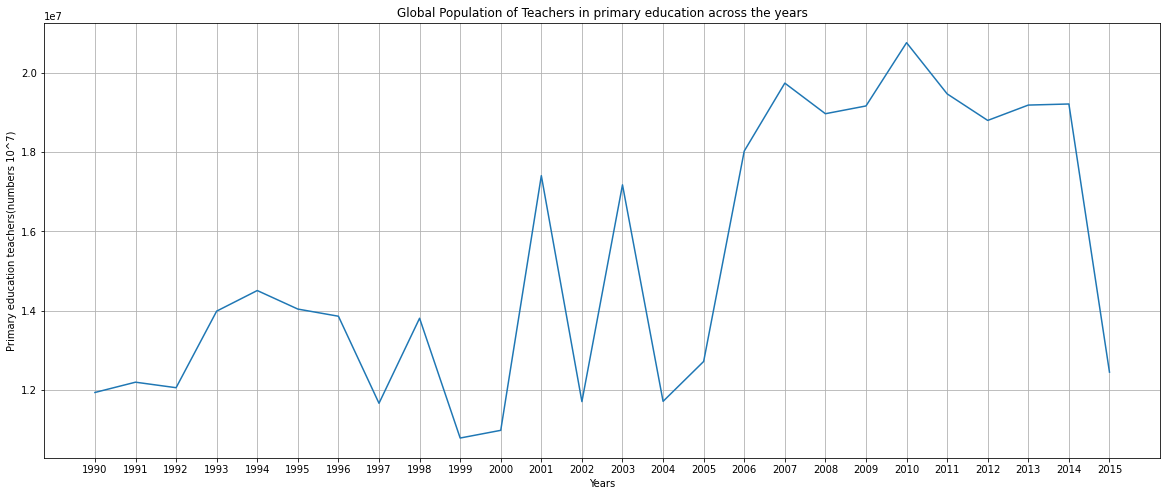

In [73]:
p_teachers_df
x_label=p_teachers_df['Years']                
y_label=p_teachers_df[['Teachers in primary education']]
plt.plot(x_label,y_label)
plt.title('Global Population of Teachers in primary education across the years')
plt.ylabel('Primary education teachers(numbers 10^7)')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (20, 8)
plt.grid()

### Report on global teacher count in primary education(includes 1 to 5 standards) across the years (in Million[M])
1. 1990 - 12 M; 2014 - 19.2 M; Overall change - 7.2 M;
2. Max - 2010(21 M); Min - 1999(10.5 M); Range - 10.5 M
3. Scientifically, the teacher count growth should be linearly increasing. But the graph shows zig-zag growth. The possible reason might be availability of less data in some years. And if the graph is correct, then the possible factors might be more teachers promoted to secondary education, or due to decline in enrolment rate, or better job opportunities to primary teachers. 

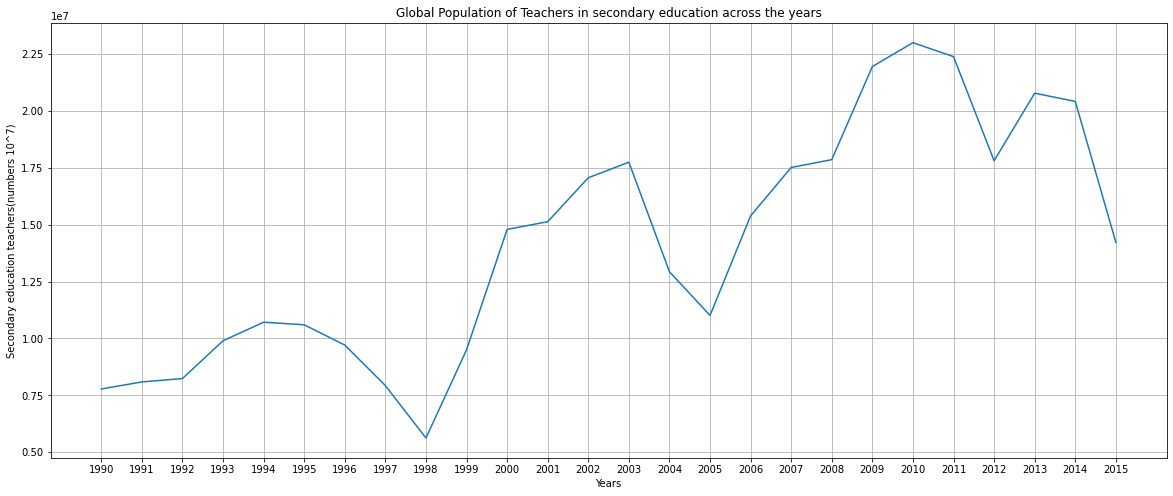

In [74]:
s_teachers_df
x_label=s_teachers_df['Years']                
y_label=s_teachers_df[['Teachers in secondary education']]
plt.plot(x_label,y_label)
plt.title('Global Population of Teachers in secondary education across the years')
plt.ylabel('Secondary education teachers(numbers 10^7)')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (20, 8)
plt.grid()

### Report on global teacher count in secondary education(includes 6 to 10) across the years (in Million[M])
1. 1990 - 7.5 M; 2014 - 20 M; Overall change - 12.5 M;
2. Max - 2010(22.5 M); Min - 1998(5.5 M); Range - 17 M
3. The number of teachers in 2014 is almost same in primary and secondary education.
4. The graph is showing increasing number of teachers except for few in the 25 year period. 
5. Comparing to number of teachers in primary, overall increase in number of teachers is 70% higher in secondary education. One of the reason may be what we have discussed last,i.e., promotion. Other reasons are more teachers are required in specific papers, or students/teacher ratio is needed to decrease due to in-depth studies, or many other reason still to be mentioned.

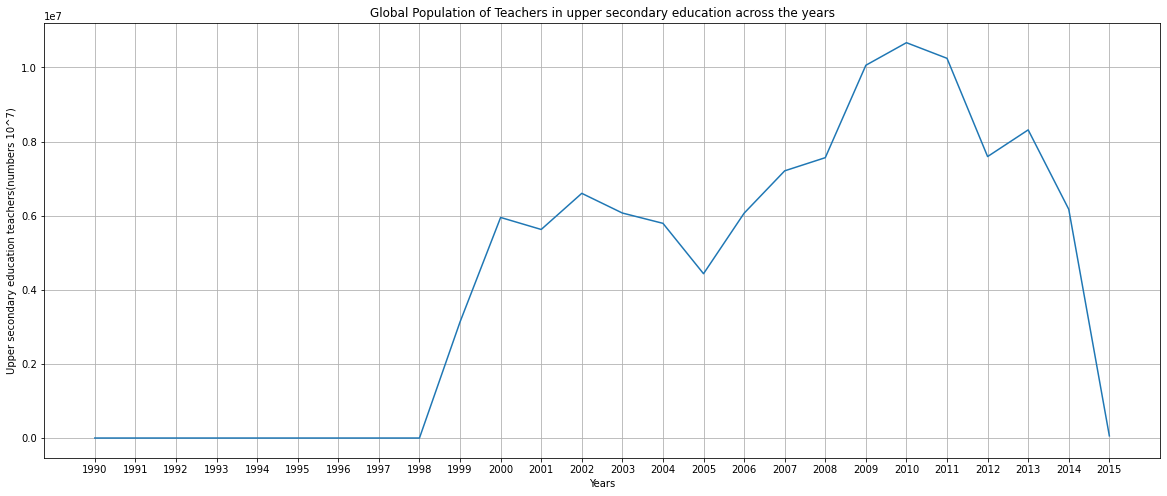

In [75]:
us_teachers_df
x_label=us_teachers_df['Years']                
y_label=us_teachers_df[['Teachers in upper secondary education']]
plt.plot(x_label,y_label)
plt.title('Global Population of Teachers in upper secondary education across the years')
plt.ylabel('Upper secondary education teachers(numbers 10^7)')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (20, 8)
plt.grid()

### Report on global teacher count in upper secondary education(includes 11 and 12) across the years (in Million[M])
1. 1990 to 1999 - Null values; 2000 - 6 M; 2014 - 6.2 M; Overall change- 0.2 M
2. Max- 2010(10.5 M); Min- 2005(4.6 M); Range- 5.9 M
3. Overall change is negligible mostly due to less amount of data in few years.
4. Maximum value is twice the minimum value within 5 year of range. This must be due to lack of data and nothing else. 
5. Comparing the global teacher counts in 2014 of primary, secondary and upper secondary, third one has the lowest,i.e, 6.2 Million, almost half the other two. The possible reason might be less number of enrolments compared to the other educational levels.

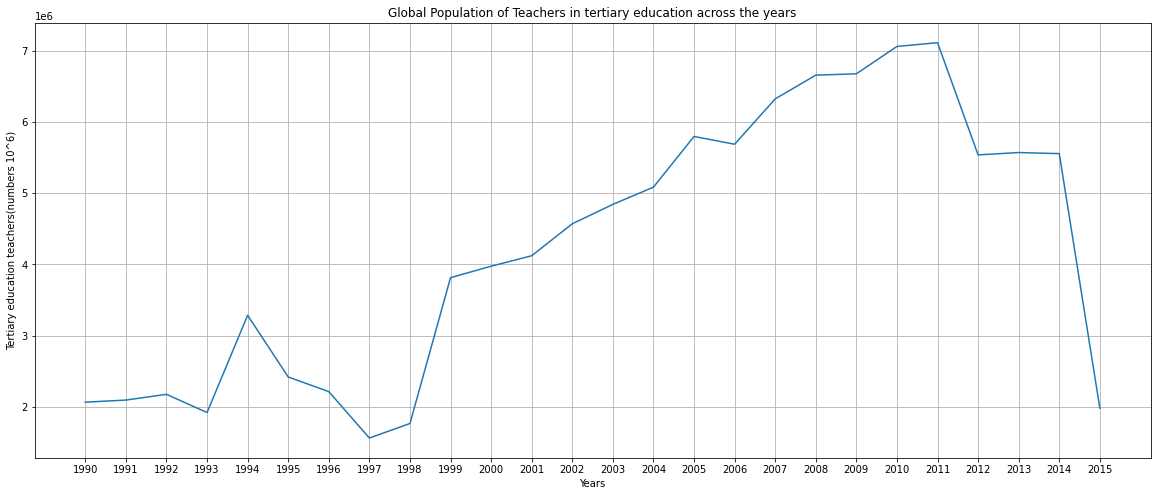

In [76]:
t_teachers_df
x_label=t_teachers_df['Years']                
y_label=t_teachers_df[['Teachers in tertiary education']]
plt.plot(x_label,y_label)
plt.title('Global Population of Teachers in tertiary education across the years')
plt.ylabel('Tertiary education teachers(numbers 10^6)')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (20, 8)
plt.grid()

### Report on global teacher count in tertiary education(higher studies) across the years (in Million[M])
1. 1990 - 2 M; 2014 - 5.5 M; Overall change - 3.5 M
2. Max - 2011(7.2 M); Min - 1997(1.5 M); Range - 5.7 M
3. Except for 2015, it has all non-null values. But again due to lack of data, graph is looks misbehaving.
4. In tertiary education, number of enrolment is generally very low compared to other. And so the number is teachers is also low.
5. A tertiary education teacher is usually a professor in which really high quilifications required. That's why also the global teacher count is lowest in this level of education.

### Conclusive report on overall global teacher count 
1. The number of teachers in 2014 is almost same in primary and secondary education,i.e, 20 M.
2. Comparing to number of teachers in primary, overall growth in number of teachers is 70% higher in secondary education. 
3. Overall change in upper secondary education is negligible mostly due to less amount of data in few years
4. Comparing the global teacher counts in 2014 of primary, secondary and upper secondary, third one has the lowest,i.e, 6.2 Million, almost half the other two. The possible reason might be less number of enrolments compared to the other educational levels.
5. In tertiary education, number of enrolments is generally very low compared to other. And so the number is teachers is also low. Other possible reason may be high qualification required to be a professor in colleges.  

In [77]:
'''x_label=female_teachers_mean['Years']                
y_label=female_teachers_mean[['Female Teachers in secondary education']]
plt.plot(x_label,y_label)
plt.title('Global Pecentage of female Teachers in secondary education across the years')
plt.ylabel('Female Teacher pecentage)')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (20, 8)
plt.grid()'''

"x_label=female_teachers_mean['Years']                \ny_label=female_teachers_mean[['Female Teachers in secondary education']]\nplt.plot(x_label,y_label)\nplt.title('Global Pecentage of female Teachers in secondary education across the years')\nplt.ylabel('Female Teacher pecentage)')\nplt.xlabel('Years')\nplt.rcParams['figure.figsize'] = (20, 8)\nplt.grid()"

In [78]:
# Indicator 7.2: Teachers percentage
female_teachers = merged_df_final[merged_df_final['Indicator Name']=='Percentage of teachers in tertiary education who are female (%)']
female_teachers_mean =  female_teachers[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'Female Teachers in tertirary education'})

female_teachers_mean


Years  Female Teachers in tertirary education
0   1990                               28.033815
1   1991                               27.977463
2   1992                               26.089489
3   1993                               26.661781
4   1994                               29.161510
5   1995                               31.619978
6   1996                               31.767703
7   1997                               33.911796
8   1998                               31.908220
9   1999                               33.293192
10  2000                               35.099110
11  2001                               35.445545
12  2002                               38.042231
13  2003                               37.120809
14  2004                               37.024710
15  2005                               37.909780
16  2006                               39.667449
17  2007                               40.631908
18  2008                               39.947794
19  2009                               40.504672
20  2010                               38.251085
21  2011                               40.432371
22  2012                               41.492894
23  2013                               41.098432
24  2014                               42.252645
25  2015                               44.908323

### Comparing percentage of female teachers globally:
1. 1990 - 44; 2015 - 56; Overall change - 12%
2. The growth of female teacher percentage is overall linear except for few deeps. So, it is a good sign of social awareness and women empowerment. But there are some undeveloped or developing countries which has very low percentage of female teachers. We will analyse it more rigorously in next part.

In [79]:
# Indicator 8- Female labor as a % of total labor force
female_labor = merged_df_final[merged_df_final['Indicator Name']=='Labor force, female (% of total labor force)']
male_labor = merged_df_final[merged_df_final['Indicator Name']=='Labor force, male (% of total labor force)']

female_labor_mean =  female_labor[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'Female labor force'})
male_labor_mean =  male_labor[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'Male labor force'})


male_labor_mean


Years  Male labor force
0   1990               NaN
1   1991               NaN
2   1992               NaN
3   1993               NaN
4   1994               NaN
5   1995               NaN
6   1996               NaN
7   1997               NaN
8   1998               NaN
9   1999               NaN
10  2000               NaN
11  2001               NaN
12  2002               NaN
13  2003               NaN
14  2004               NaN
15  2005               NaN
16  2006               NaN
17  2007               NaN
18  2008               NaN
19  2009               NaN
20  2010               NaN
21  2011               NaN
22  2012               NaN
23  2013               NaN
24  2014               NaN
25  2015               NaN

In [80]:
# Comparing Male and Female unemploment
female_labor_mean['Gender'] = 'female'
male_labor_mean['Gender'] = 'male'
total_labor = pd.concat([female_labor_mean, male_labor_mean])
total_labor['Female labor force'] = total_labor['Female labor force'].fillna(0)
total_labor['Male labor force'] = total_labor['Male labor force'].fillna(0)
total_labor['Labor Force'] = total_labor['Female labor force'] + total_labor['Male labor force']
labor_final = total_labor[['Years', 'Labor Force', 'Gender']]
labor_final
fig = px.bar(labor_final, x='Years', y='Labor Force', color='Gender')
fig.show()

In [81]:
youth_female  # Female literacy
new_df_female # female unemployment
female_teachers_mean # Female teacher percentage
female_labor_mean  # Female labor percentage

Years  Female labor force  Gender
0   1990           38.250410  female
1   1991           38.391559  female
2   1992           38.589511  female
3   1993           38.677350  female
4   1994           38.853423  female
5   1995           38.881610  female
6   1996           39.033966  female
7   1997           39.206392  female
8   1998           39.370493  female
9   1999           39.570145  female
10  2000           39.701784  female
11  2001           39.839122  female
12  2002           39.972477  female
13  2003           40.083827  female
14  2004           40.181551  female
15  2005           40.317088  female
16  2006           40.438907  female
17  2007           40.531328  female
18  2008           40.602040  female
19  2009           40.687458  female
20  2010           40.736511  female
21  2011           40.811298  female
22  2012           40.902672  female
23  2013           40.950783  female
24  2014           40.997068  female
25  2015           41.069995  female

In [82]:
all_merge = pd.merge(pd.merge(pd.merge(youth_female,new_df_female,how='left',on='Years'),female_teachers_mean,how='left',on='Years'), female_labor_mean,how='left',on='Years').drop(['Gender_x','Gender_y'],axis=1)
all_merge.columns

Index(['Years', 'Female Youth literacy Rate', 'Female Unemployment',
       'Female Teachers in tertirary education', 'Female labor force',
       'Gender'],
      dtype='object')

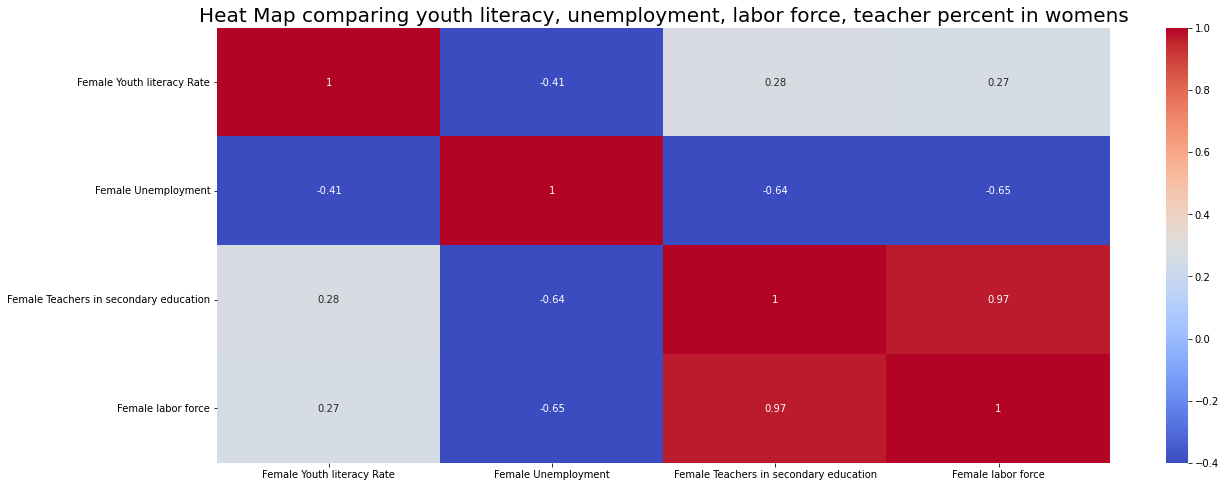

In [83]:
import seaborn as sns
x_axis_labels = ['Female Youth literacy Rate', 'Female Unemployment',
       'Female Teachers in secondary education', 'Female labor force'] # labels for x-axis
y_axis_labels = ['Female Youth literacy Rate', 'Female Unemployment',
       'Female Teachers in secondary education', 'Female labor force'] # labels for y-axis

sns.heatmap(all_merge.corr(), vmin=-0.4, cmap='coolwarm', annot=True, xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.title('Heat Map comparing youth literacy, unemployment, labor force, teacher percent in womens', fontsize=20)
plt.show()

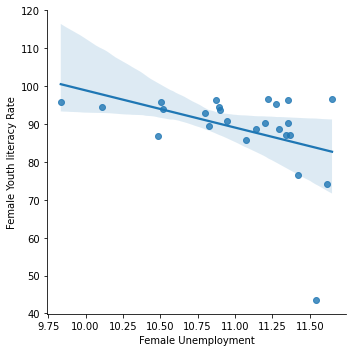

In [84]:
#1: Female literacy vs female unemployment
female_literacy_unemp = pd.merge(new_df_female,youth_female, how='left', on='Years')
female_literacy_unemp
sb.lmplot(x = 'Female Unemployment', y = 'Female Youth literacy Rate', data = female_literacy_unemp)

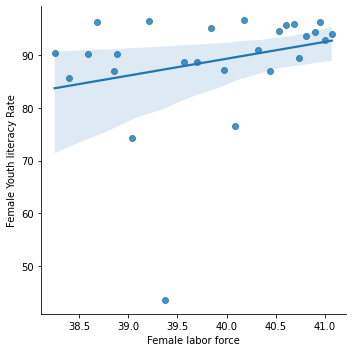

In [85]:
#2: Female literacy vs female labor percentage
female_literacy_labor = pd.merge(female_labor_mean,youth_female, how='left', on='Years')
female_literacy_labor
sb.lmplot(x = 'Female labor force', y = 'Female Youth literacy Rate', data = female_literacy_labor)

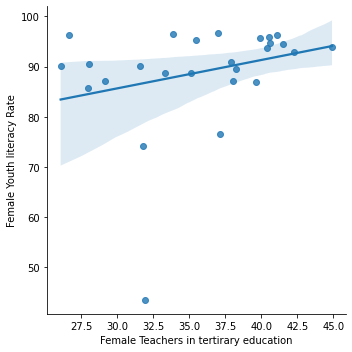

In [86]:
#3: Female literacy vs female teacher percentage
female_literacy_teacher = pd.merge(female_teachers_mean,youth_female, how='left', on='Years')
female_literacy_teacher
sb.lmplot(x = 'Female Teachers in tertirary education', y = 'Female Youth literacy Rate', data = female_literacy_teacher)

In [87]:
female_labor_sorted = female_labor.sort_values('2010', ascending=False)
list(female_labor_sorted.tail()['Country Name'])

['Saudi Arabia', 'Afghanistan', 'Yemen, Rep.', 'Qatar', 'United Arab Emirates']

## Comparison 1: Global Female Labor force vs GDP per capita (25 years)

In [88]:
female_labor_gdp_merge1 = pd.merge(new_df_GDP2,female_labor_mean, how='left', on='Years')

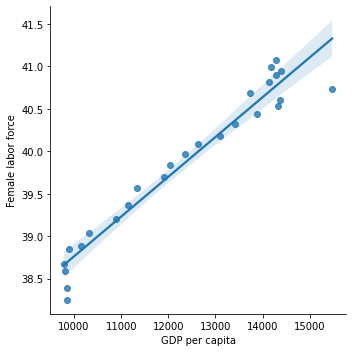

In [89]:
sb.lmplot(x = 'GDP per capita', y = 'Female labor force', data = female_labor_gdp_merge1)

## Comparison 2: Female labor force vs GDP per capita[Each Country] (2010)

In [90]:

world_female_labor = female_labor[['Country Name','2010']]
country_gdp3 = merged_df_final[merged_df_final['Indicator Name']=='GDP per capita (constant 2005 US$)'][['Country Name','2010']]
labor_gdp_merge = pd.merge(country_gdp3, world_female_labor, how='left', on='Country Name').rename(columns={'2010_x':'GDP per capita','2010_y':'Female Labour Percentage'})



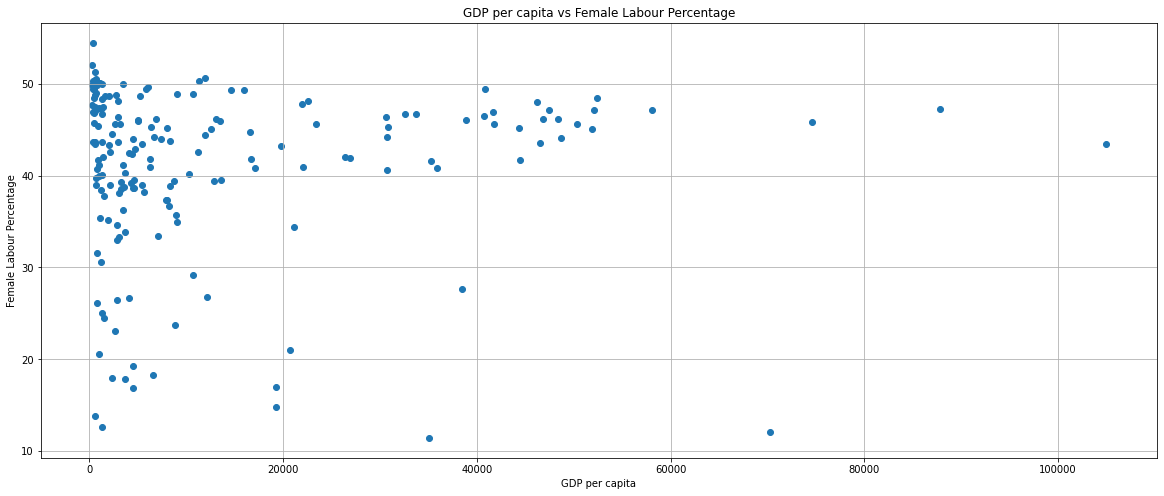

In [91]:
x_label=labor_gdp_merge['GDP per capita']                
y_label=labor_gdp_merge['Female Labour Percentage']
plt.scatter(x_label,y_label)
plt.title('GDP per capita vs Female Labour Percentage')
plt.ylabel('Female Labour Percentage')
plt.xlabel('GDP per capita')
plt.rcParams['figure.figsize'] = (20, 8) 
plt.grid()

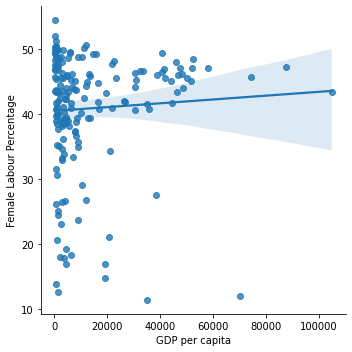

In [92]:
sb.lmplot(x = 'GDP per capita', y = 'Female Labour Percentage', data = labor_gdp_merge)

## Comparison 3 (Global Enrolment Rate vs GDP per capita for 25 years(1990-2015)

In [93]:
gdp_enrol_merge1 = pd.merge(new_df_GDP2,new_df1p, how='left', on='Years')

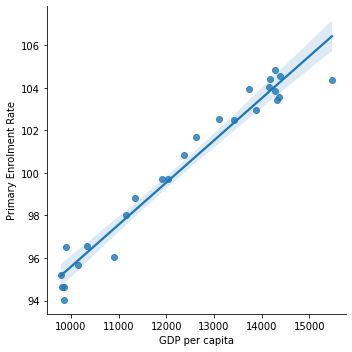

In [94]:
sb.lmplot(x = 'GDP per capita', y = 'Primary Enrolment Rate', data = gdp_enrol_merge1)

### Primary enrolment is compared with global GDP per capita for 25 years(1990 to 2015)
1. Global GDP is changing from 9,846 USD in 1990 to 14,200 USD in 2015. With the increase of GDP per capita primary enrolment rate changed from 94% to 104%. 
2. Overall change in GDP per capita: 4,354 USD; Overall change in Enrolment rate is 10%.
3. Indirectly we can say that, with 1% increase in enrolment rate, GDP per capita on an average increased to 435 USD. But the graph also tells that some countries has neutral effect of increasing enrolment rate on GDP and there may be many political, economic and social factors behind this.


## Comparison 4: (Enrolment Rate vs GDP per capita [Each country]  for 2010)

In [95]:
country_gdp2 = merged_df_final[merged_df_final['Indicator Name']=='GDP per capita (constant 2005 US$)'][['Country Name','2010']]


In [96]:
country_enrolment = merged_df_final[merged_df_final['Indicator Name']=='Gross enrolment ratio, primary, both sexes (%)'][['Country Name','2010']]

In [97]:
gdp_enrol_merge2 = pd.merge(country_gdp2,country_enrolment, how='left', on='Country Name').rename(columns={'2010_x':'GDP per capita','2010_y':'Primary Enrolment Rate'})

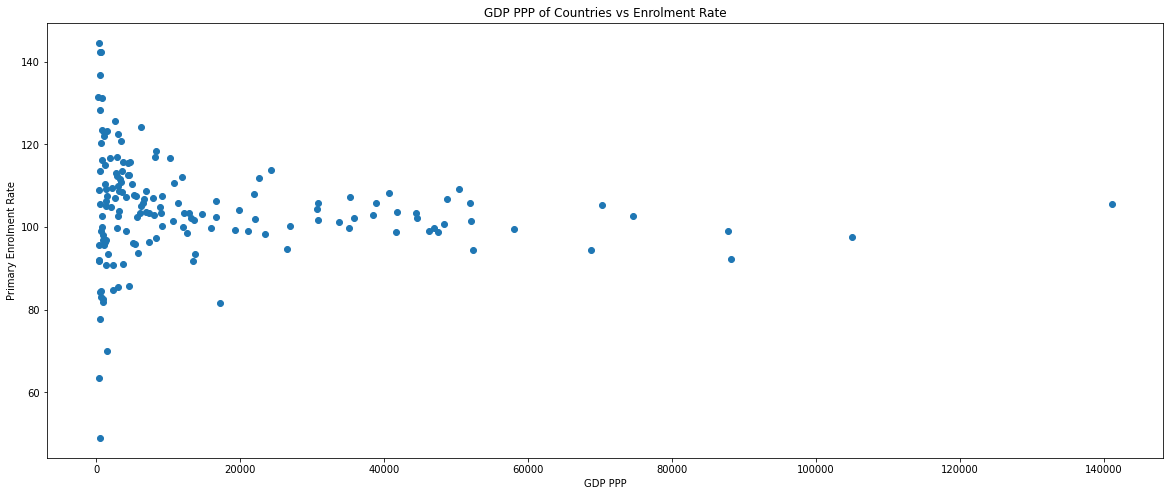

In [98]:
# Scatter plot
x_label=gdp_enrol_merge2['GDP per capita']                
y_label=gdp_enrol_merge2['Primary Enrolment Rate']
plt.scatter(x_label, y_label)
plt.title('GDP PPP of Countries vs Enrolment Rate')
plt.ylabel('Primary Enrolment Rate')
plt.xlabel('GDP PPP')
plt.show()

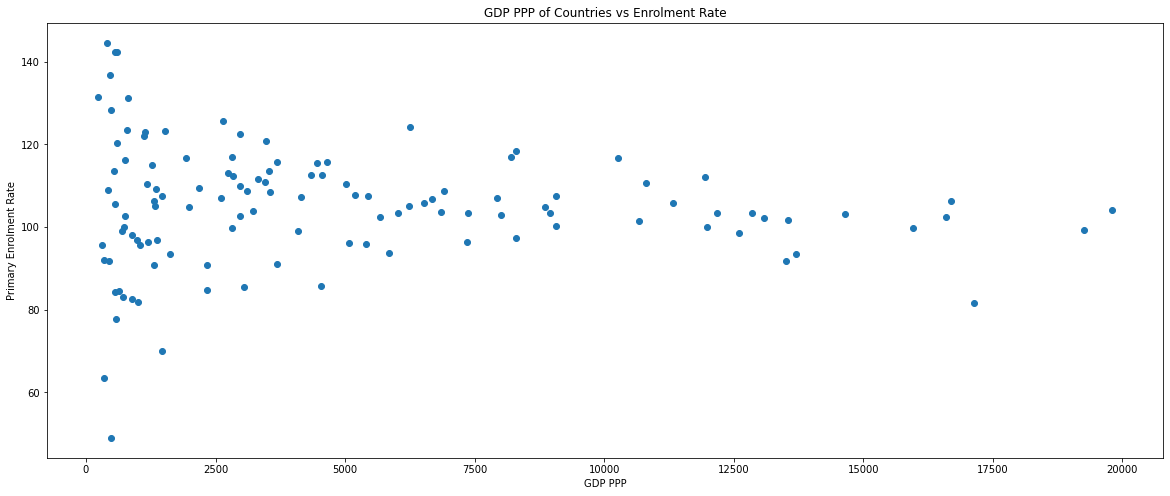

In [99]:
# Removing Outlier
_123 = gdp_enrol_merge2[gdp_enrol_merge2['GDP per capita']<20000]
x=_123['GDP per capita']                
y=_123['Primary Enrolment Rate']
plt.scatter(x, y)
plt.title('GDP PPP of Countries vs Enrolment Rate')
plt.ylabel('Primary Enrolment Rate')
plt.xlabel('GDP PPP')
plt.show()

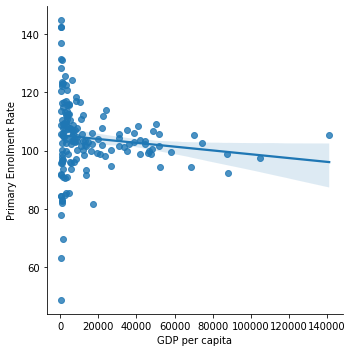

In [100]:
sb.lmplot(x = 'GDP per capita', y = 'Primary Enrolment Rate', data = gdp_enrol_merge2)

### Primary enrolment is compared with GDP per capita of individual countries for 2010
1. The graph has gone complex due to accumulation of data of 202 countries.
2. Most of the data is accumulated between GDP per capita of 0 to 20,000 USD and Primary enrolment rate of 80% to 122%.
3. The graph tells that some countries with lower GDP per capita has higher than Primary enrolment rate(PER) and vice-versa. For example, a country with GDP per capita 800 USD has approx. 138% PER while a country with more than 80,000 USD has 95% PER. This might also be an illusion because some countries has more than 100% PER due to class repeatition or admission after compulsory school age.
4. The serious note is 70% countries are positive impact on GDP per capita by enrolment rate.

## Comparison 5: (Global Literacy Rate vs GDP per capita for 25 years)

In [101]:
gdp_literacy_merge4 = pd.merge(new_df_GDP2,new_df1111, how='left', on='Years')

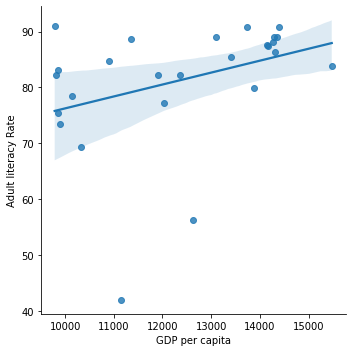

In [102]:
sb.lmplot(x = 'GDP per capita', y = 'Adult literacy Rate', data = gdp_literacy_merge4)

## Comparison 6: Literacy Rate vs GDP per capita[Country wise] for 2010 

In [103]:
country_literacy = merged_df_final[merged_df_final['Indicator Name']=='Adult literacy rate, population 15+ years, both sexes (%)'][['Country Name','2010']]


In [104]:
gdp_literacy_merge5 = pd.merge(country_gdp2,country_literacy, how='left', on='Country Name').rename(columns={'2010_x':'GDP per capita','2010_y':'Adult Literacy Rate'})


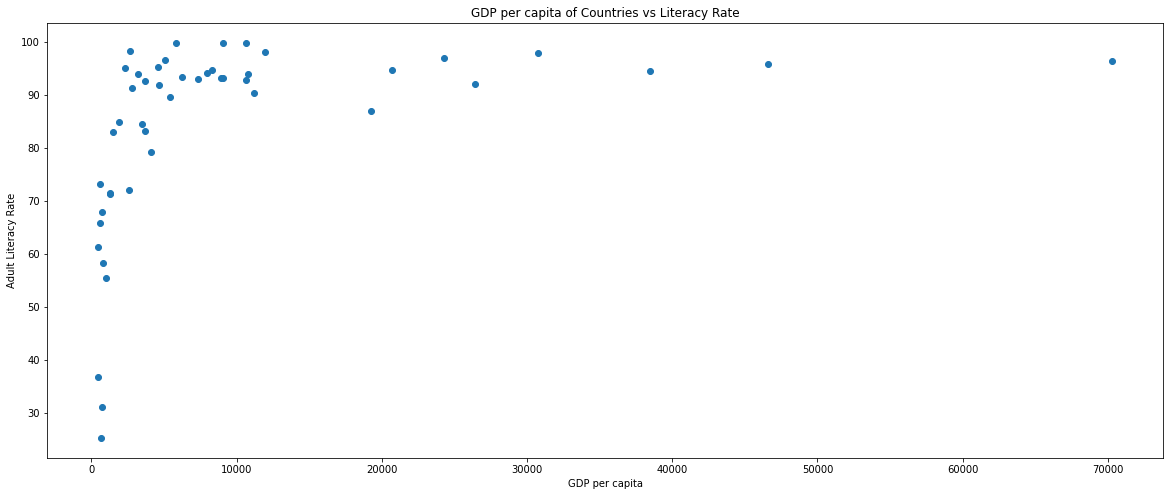

In [105]:
# Scatter plot
gdp_literacy_merge5
x_label=gdp_literacy_merge5['GDP per capita']                
y_label=gdp_literacy_merge5['Adult Literacy Rate']
plt.scatter(x_label, y_label)
plt.title('GDP per capita of Countries vs Literacy Rate')
plt.ylabel('Adult Literacy Rate')
plt.xlabel('GDP per capita')
plt.show()

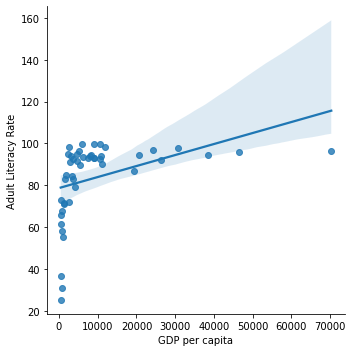

In [106]:
sb.lmplot(x = 'GDP per capita', y = 'Adult Literacy Rate', data = gdp_literacy_merge5)

## Comparison 7: Global GDP PPP vs Expenditure on education(as % of GDP) for 25 years

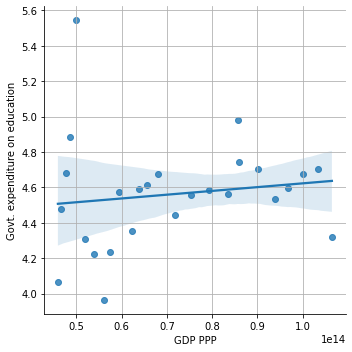

In [107]:
merge_exp_GDP = pd.merge(new_df_GDP3 ,new_df_Expenditure1, how='left', on='Years')
merge_exp_GDP

sb.lmplot(x = 'GDP PPP', y = 'Govt. expenditure on education', data = merge_exp_GDP)
 
plt.grid()

## Comparison 8: GDP PPP vs Expenditure on education(as % of GDP) for 2010 [Country wise]

In [108]:
Expenditure_df2 = merged_df_final[merged_df_final['Indicator Name']=='Government expenditure on education as % of GDP (%)'][['Country Name','2010']]
country_gdp4 = merged_df_final[merged_df_final['Indicator Name']=='GDP, PPP (constant 2011 international $)'][['Country Name','2010']]

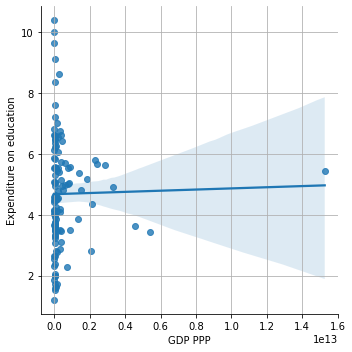

In [109]:
country_gdp4 = merged_df_final[merged_df_final['Indicator Name']=='GDP, PPP (constant 2011 international $)'][['Country Name','2010']]
expen_gdp_merge = pd.merge(country_gdp4, Expenditure_df2, how='left', on='Country Name').rename(columns={'2010_x':'GDP PPP','2010_y':'Expenditure on education'})
sb.lmplot(x = 'GDP PPP', y = 'Expenditure on education', data = expen_gdp_merge)
plt.grid()

In [110]:
# PISA, TIMSS, PIRLS
PISA_df = df3[df3['Indicator Name'].str.contains('PISA')]
PISA_non_null = PISA_df[~PISA_df['2000'].isna()]
list1 = ['PISA: Mean performance on the mathematics scale',
       'PISA: Mean performance on the mathematics scale. Female',
       'PISA: Mean performance on the mathematics scale. Male',
       'PISA: Mean performance on the reading scale',
       'PISA: Mean performance on the reading scale. Female',
       'PISA: Mean performance on the reading scale. Male',
       'PISA: Mean performance on the science scale',
       'PISA: Mean performance on the science scale. Female',
       'PISA: Mean performance on the science scale. Male']
PISA_list1_df = PISA_non_null[PISA_non_null['Indicator Name'].isin(list1)]


In [111]:
TIMSS_df = df3[df3['Indicator Name'].str.contains('TIMSS')]
TIMSS_non_null = TIMSS_df[~TIMSS_df['1995'].isna()]
list2 = ['TIMSS: Mean performance on the mathematics scale for fourth grade students, female',
       'TIMSS: Mean performance on the mathematics scale for fourth grade students, male',
       'TIMSS: Mean performance on the mathematics scale for fourth grade students, total',
       'TIMSS: Mean performance on the science scale for fourth grade students, female',
       'TIMSS: Mean performance on the science scale for fourth grade students, male',
       'TIMSS: Mean performance on the science scale for fourth grade students, total']
TIMSS_list2_df = TIMSS_non_null[TIMSS_non_null['Indicator Name'].isin(list2)]


In [112]:
PIRLS_df = df3[df3['Indicator Name'].str.contains('PIRLS')]
PIRLS_non_null = PIRLS_df[~PIRLS_df['2001'].isna()]
list3 = ['PIRLS: Mean performance on the reading scale, female',
       'PIRLS: Mean performance on the reading scale, male',
       'PIRLS: Mean performance on the reading scale, total']
PIRLS_list3_df = PIRLS_non_null[PIRLS_non_null['Indicator Name'].isin(list3)]

### PISA performance graph

In [113]:
PISA_df2 =  PISA_list1_df[['Indicator Name','Country Name','2000', '2003', '2006', '2009', '2012', '2015']]
list4 = ['PISA: Mean performance on the mathematics scale','PISA: Mean performance on the reading scale','PISA: Mean performance on the science scale']
PISA_df3 = PISA_df2[PISA_df2['Indicator Name'].isin(list4)]

In [114]:
PISA_2015 = PISA_df3.pivot(index='Country Name', columns='Indicator Name', values='2015').reset_index()
PISA_2015

Indicator Name          Country Name  \
0                            Albania   
1                          Argentina   
2                          Australia   
3                            Austria   
4                            Belgium   
5                             Brazil   
6                           Bulgaria   
7                             Canada   
8                              Chile   
9                     Czech Republic   
10                           Denmark   
11                           Finland   
12                            France   
13                           Germany   
14                            Greece   
15              Hong Kong SAR, China   
16                           Hungary   
17                           Iceland   
18                         Indonesia   
19                           Ireland   
20                            Israel   
21                             Italy   
22                             Japan   
23                       Korea, Rep.   
24                            Latvia   
25                     Liechtenstein   
26                        Luxembourg   
27                    Macedonia, FYR   
28                            Mexico   
29                       New Zealand   
30                            Norway   
31                              Peru   
32                            Poland   
33                          Portugal   
34                           Romania   
35                Russian Federation   
36                             Spain   
37                            Sweden   
38                       Switzerland   
39                          Thailand   
40                    United Kingdom   
41                     United States   

Indicator Name  PISA: Mean performance on the mathematics scale  \
0                                                      413.1570   
1                                                      409.0333   
2                                                      493.8962   
3                                                      496.7423   
4                                                      506.9844   
5                                                      377.0695   
6                                                      441.1899   
7                                                      515.6474   
8                                                      422.6714   
9                                                      492.3254   
10                                                     511.0876   
11                                                     511.0769   
12                                                     492.9204   
13                                                     505.9713   
14                                                     453.6299   
15                                                     547.9310   
16                                                     476.8309   
17                                                     488.0332   
18                                                     386.1096   
19                                                     503.7220   
20                                                     469.6695   
21                                                     489.7287   
22                                                     532.4399   
23                                                     524.1062   
24                                                     482.3051   
25                                                          NaN   
26                                                     485.7706   
27                                                     371.3114   
28                                                     408.0235   
29                                                     495.2233   
30                                                     501.7298   
31                                                     386.5606   
32                                                     504.4693   
3

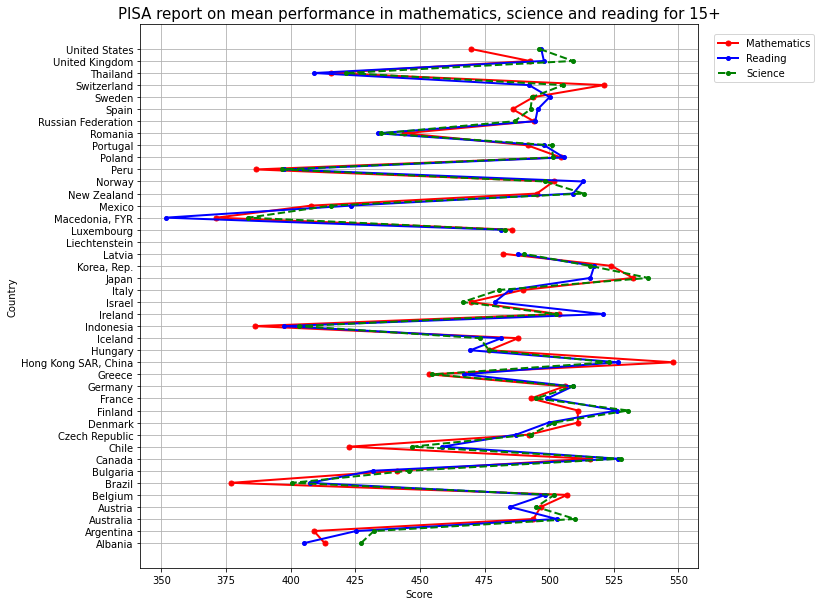

In [115]:
plt.figure(figsize=(10, 10))
plt.rcParams['figure.facecolor'] = 'white'

plt.plot(PISA_2015['PISA: Mean performance on the mathematics scale'], PISA_2015['Country Name'], 'ro-', linewidth=2, markersize=5)
plt.plot(PISA_2015['PISA: Mean performance on the reading scale'],PISA_2015['Country Name'],'bo-', linewidth=2, markersize=4)
plt.plot(PISA_2015['PISA: Mean performance on the science scale'],PISA_2015['Country Name'],'go--', linewidth=2, markersize=4)

plt.legend(['Mathematics','Reading','Science'], bbox_to_anchor=(1.01, 1), loc=2,  borderaxespad=1.)
plt.xlabel('Score')
plt.ylabel('Country')
plt.title('PISA report on mean performance in mathematics, science and reading for 15+', fontsize=15)
plt.grid()
plt.show()


### TIMSS performance graph

In [116]:
TIMSS_df2 =  TIMSS_list2_df[['Indicator Name','Country Name', '1995', '2003', '2007', '2011', '2015']]
list5 = ['TIMSS: Mean performance on the mathematics scale for fourth grade students, total','TIMSS: Mean performance on the science scale for fourth grade students, total',]
TIMSS_df3 = TIMSS_df2[TIMSS_df2['Indicator Name'].isin(list5)]
TIMSS_df3
TIMSS_2015 = TIMSS_df3.pivot(index='Country Name', columns='Indicator Name', values='2011').reset_index()
TIMSS_2015

Indicator Name          Country Name  \
0                          Australia   
1                            Austria   
2                             Canada   
3                             Cyprus   
4                     Czech Republic   
5                             Greece   
6               Hong Kong SAR, China   
7                            Hungary   
8                            Iceland   
9                 Iran, Islamic Rep.   
10                           Ireland   
11                            Israel   
12                             Japan   
13                       Korea, Rep.   
14                            Kuwait   
15                            Latvia   
16                       Netherlands   
17                       New Zealand   
18                            Norway   
19                          Portugal   
20                         Singapore   
21                          Slovenia   
22                          Thailand   
23                     United States   

Indicator Name  TIMSS: Mean performance on the mathematics scale for fourth grade students, total  \
0                                                      516.000000                                   
1                                                      508.310903                                   
2                                                             NaN                                   
3                                                             NaN                                   
4                                                      511.000000                                   
5                                                             NaN                                   
6                                                      602.000000                                   
7                                                      515.000000                                   
8                                                             NaN                                   
9                                                      431.000000                                   
10                                                     527.000000                                   
11                                                            NaN                                   
12                                                     585.000000                                   
13                                                     605.000000                                   
14                                                     342.000000                                   
15                                                            NaN                                   
16                                                     540.000000                                   
17                                                     486.000000                                   
18                                                     495.000000                                   
19                                                     532.000000                                   
20                                                     606.000000                                   
21                                                     513.000000                                   
22                                                     457.975859                                   
23                                                     541.000000                                   

Indicator Name  TIMSS: Mean performance on the science scale for fourth grade students, total  
0                                                      516.000000                              
1                                                      531.502150                              
2                                                             NaN                              
3                                                             NaN                        

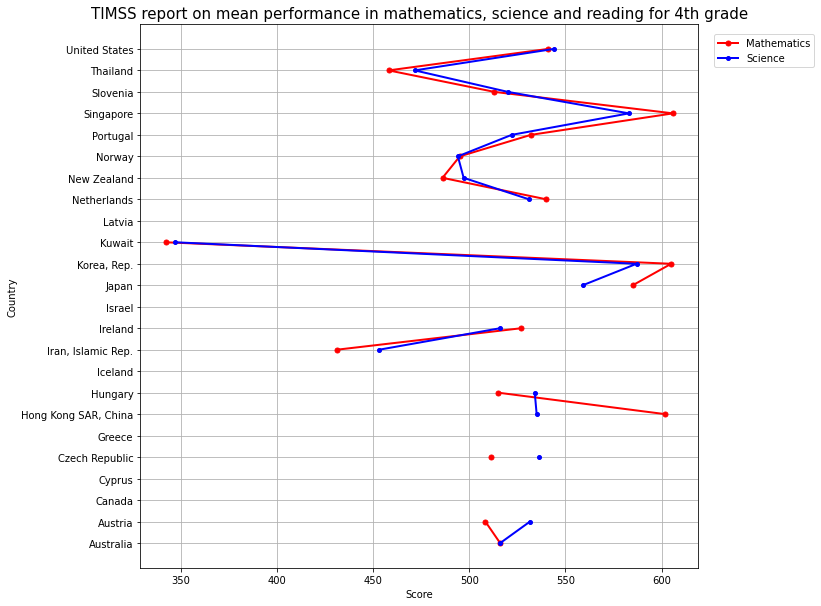

In [117]:
plt.figure(figsize=(10,10))
plt.rcParams['figure.facecolor'] = 'white'

plt.plot(TIMSS_2015['TIMSS: Mean performance on the mathematics scale for fourth grade students, total'], TIMSS_2015['Country Name'], 'ro-', linewidth=2, markersize=5)
plt.plot(TIMSS_2015['TIMSS: Mean performance on the science scale for fourth grade students, total'],TIMSS_2015['Country Name'],'bo-', linewidth=2, markersize=4)

plt.legend(['Mathematics','Science'], bbox_to_anchor=(1.01, 1), loc=2,  borderaxespad=1.)
plt.xlabel('Score')
plt.ylabel('Country')
plt.title('TIMSS report on mean performance in mathematics, science and reading for 4th grade', fontsize=15)
plt.grid()
plt.show()

### PIRLS performance graph

In [118]:
PIRLS_df2 =  PIRLS_list3_df[['Indicator Name','Country Name','2001','2011']]
PIRLS_df2
PIRLS_2011 = PIRLS_df2.pivot(index='Country Name', columns='Indicator Name', values='2011').reset_index()
PIRLS_2011

Indicator Name          Country Name  \
0                          Argentina   
1                             Belize   
2                           Bulgaria   
3                           Colombia   
4                             Cyprus   
5                     Czech Republic   
6                             France   
7                            Germany   
8                             Greece   
9               Hong Kong SAR, China   
10                           Hungary   
11                           Iceland   
12                Iran, Islamic Rep.   
13                            Israel   
14                             Italy   
15                            Kuwait   
16                            Latvia   
17                         Lithuania   
18                    Macedonia, FYR   
19                           Moldova   
20                           Morocco   
21                       Netherlands   
22                       New Zealand   
23                            Norway   
24                           Romania   
25                Russian Federation   
26                         Singapore   
27                   Slovak Republic   
28                          Slovenia   
29                            Sweden   
30                            Turkey   
31                     United States   

Indicator Name  PIRLS: Mean performance on the reading scale, female  \
0                                                             NaN      
1                                                             NaN      
2                                                      539.410380      
3                                                      447.036665      
4                                                             NaN      
5                                                      548.789159      
6                                                      522.465198      
7                                                      544.966113      
8                                                             NaN      
9                                                      579.416008      
10                                                     547.236551      
11                                                            NaN      
12                                                     467.427433      
13                                                     543.772090      
14                                                     542.925924      
15                                                            NaN      
16                                                            NaN      
17                                                     537.491701      
18                                                            NaN      
19                                                            NaN      
20                                                     325.786472      
21                                                     549.402727      
22                                                     541.106645      
23                                                     514.004445      
24                                                     509.661375      
25                                                     577.781480      
26                                                     575.976663      
27                                                     540.254358      
28                                                     538.589455      
29                                                     548.949076      
30                                                            NaN      
31                                                     561.502992      

Indicator Name  PIRLS: Mean performance on the reading scale, male  \
0                                                             NaN    
1                                                             NaN    
2                                                      524.452423    
3                     

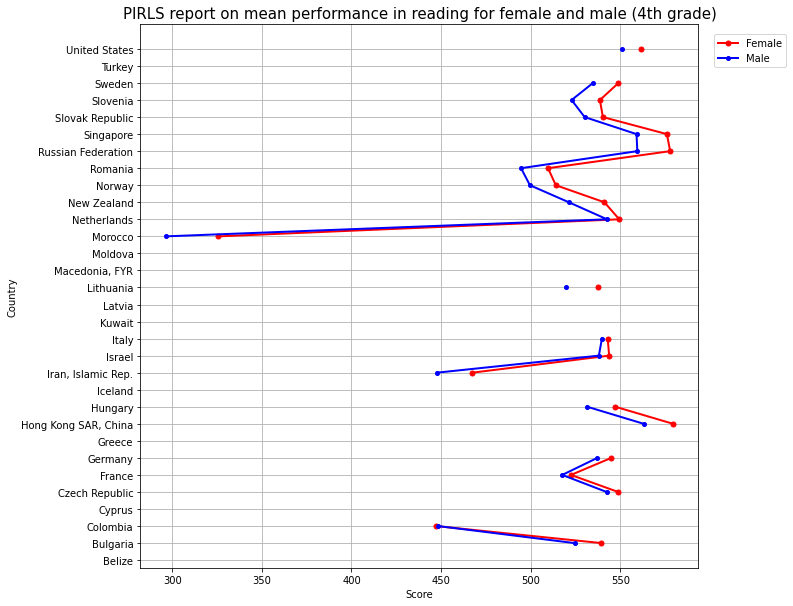

In [119]:
plt.figure(figsize=(10,10))
plt.rcParams['figure.facecolor'] = 'white'

plt.plot(PIRLS_2011['PIRLS: Mean performance on the reading scale, female'], PIRLS_2011['Country Name'], 'ro-', linewidth=2, markersize=5)
plt.plot(PIRLS_2011['PIRLS: Mean performance on the reading scale, male'],PIRLS_2011['Country Name'],'bo-', linewidth=2, markersize=4)


plt.legend(['Female','Male'], bbox_to_anchor=(1.01, 1), loc=2,  borderaxespad=1.)
plt.xlabel('Score')
plt.ylabel('Country')
plt.title('PIRLS report on mean performance in reading for female and male (4th grade)', fontsize=15)
plt.grid()
plt.show()

# Type 2: Income Group vs Year:
Classification of countries based on GNI or Income type

In [120]:
merged_df_final['Income Group'].unique()

array(['Low income', 'Upper middle income', 'High income: nonOECD',
       'Lower middle income', 'High income: OECD'], dtype=object)

In [121]:
income_group=merged_df_final.groupby('Income Group')['Country Name'].nunique().reset_index().rename(columns={'Country Name':'No. of Countries'})
income_group

Income Group  No. of Countries
0     High income: OECD                31
1  High income: nonOECD                44
2            Low income                34
3   Lower middle income                50
4   Upper middle income                55

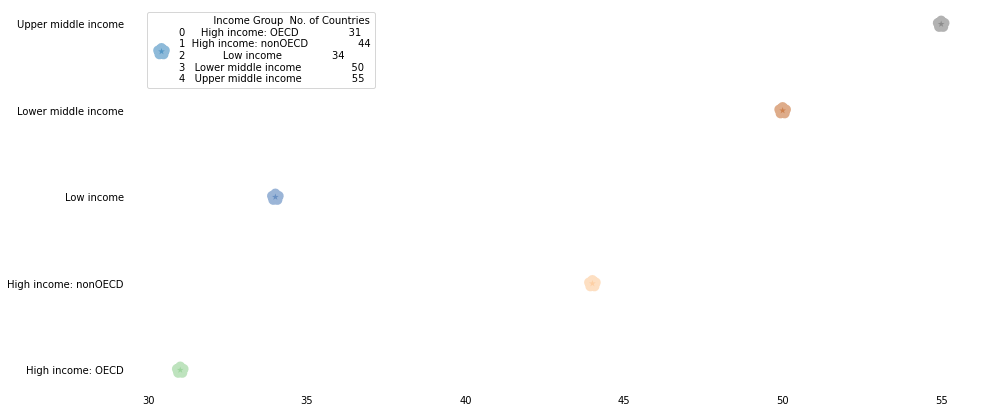

In [122]:
x=income_group['No. of Countries']
y=income_group['Income Group']

fig,hx = plt.subplots(figsize =(15, 7))
hx.scatter(x,y,label=income_group,alpha=0.5,s=50,c=[30,35,40,45,50],cmap='Accent',marker='*',linewidths=10)
for s in ['top', 'bottom', 'left', 'right']:
    hx.spines[s].set_visible(False)
hx.xaxis.set_ticks_position('none')
hx.yaxis.set_ticks_position('none')    
hx.xaxis.set_tick_params(pad = 5)
hx.yaxis.set_tick_params(pad = 15)
for i in hx.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
hx.legend( loc='best')    

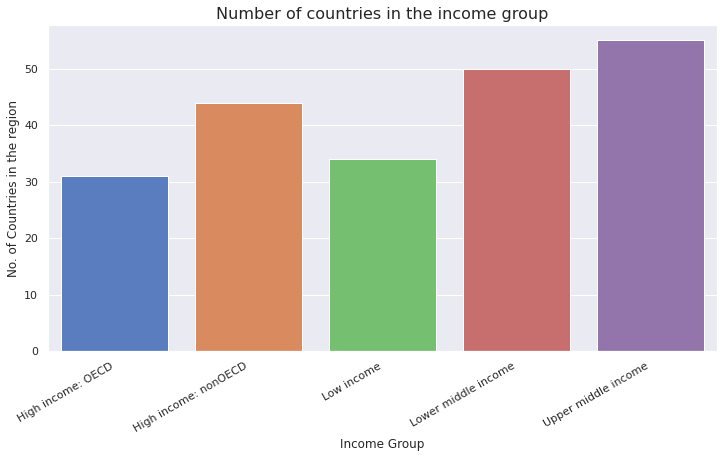

In [123]:
sb.set_theme()
fig, ax = plt.subplots(figsize=(12,6))
colors = sb.color_palette("muted")
ax = sb.barplot(x="Income Group", y="No. of Countries", data=income_group, palette=colors)
ax.set(xlabel='Income Group',ylabel='No. of Countries in the region')
ax.set_title('Number of countries in the income group', fontsize = 16)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

In [124]:
low_income_df = merged_df_final[merged_df_final['Income Group']=='Low income']
low_income_df

Country Name Country Code  \
8852    Afghanistan          AFG   
8853    Afghanistan          AFG   
8854    Afghanistan          AFG   
8855    Afghanistan          AFG   
8856    Afghanistan          AFG   
...             ...          ...   
242437     Zimbabwe          ZWE   
242438     Zimbabwe          ZWE   
242439     Zimbabwe          ZWE   
242440     Zimbabwe          ZWE   
242441     Zimbabwe          ZWE   

                                           Indicator Name  \
8852    All staff compensation as % of total expenditu...   
8853    All staff compensation as % of total expenditu...   
8854    All staff compensation as % of total expenditu...   
8855    All staff compensation as % of total expenditu...   
8856    Barro-Lee: Average years of primary schooling,...   
...                                                   ...   
242437  Wittgenstein Projection: Population in thousan...   
242438  Wittgenstein Projection: Population in thousan...   
242439  Wittgenstein Projection: Population in thousan...   
242440  Wittgenstein Projection: Population in thousan...   
242441  Wittgenstein Projection: Population in thousan...   

                  Indicator Code  1990  1991  1992  1993  1994  1995  ...  \
8852     UIS.XSPENDP.1.FDPUB.FNS   NaN   NaN   NaN   NaN   NaN   NaN  ...   
8853       UIS.XSPENDP.FDPUB.FNS   NaN   NaN   NaN   NaN   NaN   NaN  ...   
8854    UIS.XSPENDP.23.FDPUB.FNS   NaN   NaN   NaN   NaN   NaN   NaN  ...   
8855    UIS.XSPENDP.56.FDPUB.FNS   NaN   NaN   NaN   NaN   NaN   NaN  ...   
8856        BAR.PRM.SCHL.15UP.FE  0.44   NaN   NaN   NaN   NaN  0.57  ...   
...                          ...   ...   ...   ...   ...   ...   ...  ...   
242437          PRJ.POP.ALL.1.MA   NaN   NaN   NaN   NaN   NaN   NaN  ...   
242438          PRJ.POP.ALL.1.MF   NaN   NaN   NaN   NaN   NaN   NaN  ...   
242439          PRJ.POP.ALL.3.FE   NaN   NaN   NaN   NaN   NaN   NaN  ...   
242440          PRJ.POP.ALL.3.MA   NaN   NaN   NaN   NaN   NaN   NaN  ...   
242441          PRJ.POP.ALL.3.MF   NaN   NaN   NaN   NaN   NaN   NaN  ...   

        2009         2010       2011       2012       2013       2014  \
8852     NaN    75.467232  77.440659  81.173347  76.451523  76.980766   
8853     NaN    72.378258  73.721703  74.064011  71.171219  71.855270   
8854     NaN    75.467232  77.440659  81.173347  76.451523  76.980766   
8855     NaN    47.813629  45.223701  34.692341  39.004131  46.860580   
8856     NaN     1.270000        NaN        NaN        NaN        NaN   
...      ...          ...        ...        ...        ...        ...   
242437   NaN   799.570000        NaN        NaN        NaN        NaN   
242438   NaN  1614.840000        NaN        NaN        NaN        NaN   
242439   NaN  1401.820000        NaN        NaN        NaN        NaN   
242440   NaN  1608.650000        NaN        NaN        NaN        NaN   
242441   NaN  3010.470000        NaN        NaN        NaN        NaN   

               2015   Currency Unit              Region  Income Group  
8852      78.349113  Afghan afghani          South Asia    Low income  
8853      71.447098  Afghan afghani          South Asia    Low income  
8854      78.349113  Afghan afghani          South Asia    Low income  
8855      43.724129  Afghan afghani          South Asia    Low income  
8856            NaN  Afghan afghani          South Asia    Low income  
...             ...             ...                 ...           ...  
242437   721.560000     U.S. dollar  Sub-Saharan Africa    Low income  
242438  1474.430000     U.S. dollar  Sub-Saharan Africa    Low income  
242439  1722.960000     U.S. dollar  Sub-Saharan Africa    Low income  
242440  1873.550000     U.S. dollar  Sub-Saharan Africa    Low income  
242441  3596.510000     U.S. dollar  Sub-Saharan Africa    Low income  

[41236 rows x 33 columns]

In [125]:
low_mid_income_df = merged_df_final[merged_df_final['Income Group']=='Lower middle income']

In [126]:
up_mid_income_df = merged_df_final[merged_df_final['Income Group']=='Upper middle income']

In [127]:
high_OECD_income_df = merged_df_final[merged_df_final['Income Group']=='High income: OECD']

OECD = Organisation for Economic Co-operation and Development (It works to build better policies for better lives) 

Note: We will not consider non-OECD countries

In [128]:
# Case 1 : Low Income Countries
print('Low Income Countries:') 
print(low_income_df['Country Name'].unique())
print('\n')
print('No. of Countries:')
print(len(low_income_df['Country Name'].unique()))
print('\n')
print('Regions with Low Income Countries')
print(low_income_df['Region'].unique())
region_count = low_income_df.groupby('Region')['Country Name'].unique().reset_index()
region_count

Low Income Countries:
['Afghanistan' 'Bangladesh' 'Benin' 'Burkina Faso' 'Burundi' 'Cambodia'
 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.' 'Eritrea'
 'Ethiopia' 'Gambia, The' 'Guinea' 'Guinea-Bissau' 'Haiti' 'Kenya'
 'Korea, Dem. People’s Rep.' 'Liberia' 'Madagascar' 'Malawi' 'Mali'
 'Mozambique' 'Myanmar' 'Nepal' 'Niger' 'Rwanda' 'Sierra Leone' 'Somalia'
 'Tajikistan' 'Tanzania' 'Togo' 'Uganda' 'Zimbabwe']


No. of Countries:
34


Regions with Low Income Countries
['South Asia' 'Sub-Saharan Africa' 'East Asia & Pacific'
 'Latin America & Caribbean' 'Europe & Central Asia']


Region  \
0        East Asia & Pacific   
1      Europe & Central Asia   
2  Latin America & Caribbean   
3                 South Asia   
4         Sub-Saharan Africa   

                                        Country Name  
0     [Cambodia, Korea, Dem. People’s Rep., Myanmar]  
1                                       [Tajikistan]  
2                                            [Haiti]  
3                   [Afghanistan, Bangladesh, Nepal]  
4  [Benin, Burkina Faso, Burundi, Central African...

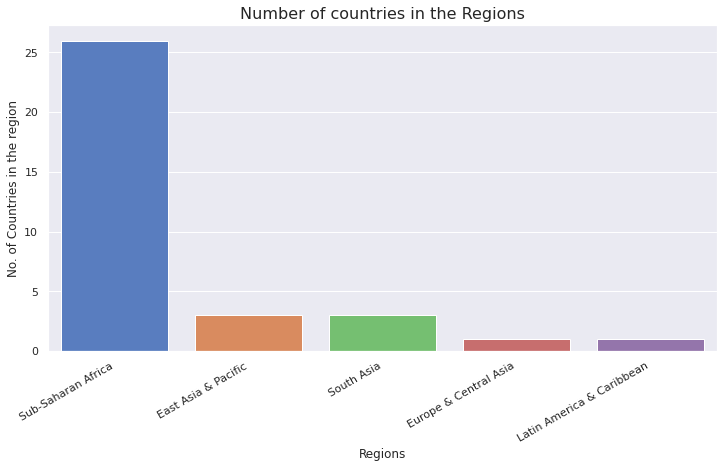

In [129]:
country_count = low_income_df.groupby('Region')['Country Name'].nunique().reset_index().rename(columns={'Country Name':'No. of Countries'}).sort_values('No. of Countries', ascending=False)
country_count

sb.set_theme()
fig, ax = plt.subplots(figsize=(12,6))
colors = sb.color_palette("muted")
ax = sb.barplot(x="Region", y="No. of Countries", data=country_count, palette=colors)
ax.set(xlabel='Regions',ylabel='No. of Countries in the region')
ax.set_title('Number of countries in the Regions', fontsize = 16)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

In [130]:
# Region wise GNI per capita with no. of countries
GNI_per_capita_low = low_income_df[low_income_df['Indicator Name']=='GNI per capita, PPP (current international $)']
fig = px.histogram(GNI_per_capita_low, x='2010', color='Region')
fig.show()

In [131]:
low_income_df = merged_df_final[merged_df_final['Income Group']=='Low income']
# Input the region to get details of:
low_income_df = low_income_df[low_income_df['Region']=='South Asia']
region = list(low_income_df['Region'].unique())
countries = list(low_income_df['Country Name'].unique())

In [132]:
low_income_df = merged_df_final[merged_df_final['Income Group']=='Low income']

In [133]:
low_income_df[low_income_df['Indicator Name'].str.contains('GDP per capita')]

Country Name Country Code  \
9266    Afghanistan          AFG   
9267    Afghanistan          AFG   
9268    Afghanistan          AFG   
9269    Afghanistan          AFG   
9277    Afghanistan          AFG   
...             ...          ...   
241585     Zimbabwe          ZWE   
241586     Zimbabwe          ZWE   
241587     Zimbabwe          ZWE   
241588     Zimbabwe          ZWE   
241607     Zimbabwe          ZWE   

                                           Indicator Name     Indicator Code  \
9266                   GDP per capita (constant 2005 US$)     NY.GDP.PCAP.KD   
9267                         GDP per capita (current US$)     NY.GDP.PCAP.CD   
9268    GDP per capita, PPP (constant 2011 internation...  NY.GDP.PCAP.PP.KD   
9269        GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
9277    Government expenditure per primary student as ...  SE.XPD.PRIM.PC.ZS   
...                                                   ...                ...   
241585                 GDP per capita (constant 2005 US$)     NY.GDP.PCAP.KD   
241586                       GDP per capita (current US$)     NY.GDP.PCAP.CD   
241587  GDP per capita, PPP (constant 2011 internation...  NY.GDP.PCAP.PP.KD   
241588      GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
241607  Government expenditure per tertiary student as...  SE.XPD.TERT.PC.ZS   

               1990         1991         1992         1993         1994  \
9266            NaN          NaN          NaN          NaN          NaN   
9267            NaN          NaN          NaN          NaN          NaN   
9268            NaN          NaN          NaN          NaN          NaN   
9269            NaN          NaN          NaN          NaN          NaN   
9277            NaN          NaN          NaN          NaN          NaN   
...             ...          ...          ...          ...          ...   
241585  1272.051032  1309.004994  1164.253594  1152.450442  1234.966180   
241586   862.586588   827.486940   631.990604   601.866877   619.835138   
241587  2605.794944  2681.495089  2384.972026  2360.793284  2529.826671   
241588  1684.211370  1790.826629  1629.103356  1650.955253  1806.814221   
241607     0.000000          NaN          NaN          NaN          NaN   

               1995  ...         2009         2010         2011         2012  \
9266            NaN  ...   524.823533   553.300289   569.233388   630.427413   
9267            NaN  ...   445.893298   553.300289   603.537023   669.009051   
9268            NaN  ...  1531.173993  1614.255001  1660.739856  1839.273579   
9269            NaN  ...  1482.098837  1581.600836  1660.739856  1873.153946   
9277            NaN  ...          NaN     9.445470     9.782870     6.894670   
...             ...  ...          ...          ...          ...          ...   
241585  1214.693460  ...   652.288733   719.979517   813.834010   913.530630   
241586   628.184925  ...   624.272243   719.979517   840.949880   968.163871   
241587  2488.298028  ...  1336.212650  1474.877137  1667.137950  1871.366349   
241588  1814.219959  ...  1293.386137  1445.042395  1667.137950  1905.837880   
241607          NaN  ...          NaN    66.495949          NaN   255.829575   

               2013         2014         2015   Currency Unit  \
9266     621.818079   610.241924   599.135196  Afghan afghani   
9267     631.744971   612.069651   569.577923  Afghan afghani   
9268    1814.155825  1780.382366  1747.978457  Afghan afghani   
9269    1877.411953  1875.447407  1864.973641  Afghan afghani   
9277       8.997400     9.531700     8.150530  Afghan afghani   
...             ...          ...          ...             ...   
241585   942.038655   939.780273   933.503264     U.S. dollar   
241586  1026.388289  1031.104616  1033.415842     U.S. dollar   
241587  1929.765004  1925.138710  1912.280264     U.S. dollar   
241588  1997.052201  2027.933139  2040.272449     U.S. dollar   
241607   254.916733          NaN    

In [134]:
# Essential Indicators
enrolment_indicator = [elem0 for elem0 in low_income_df['Indicator Name'].unique() if 'enrolment' in elem0] # Done
completion_indicator = [elem1 for elem1 in low_income_df['Indicator Name'].unique() if 'completion' in elem1] # Done 
Unemployment_indicator = [elem2 for elem2 in low_income_df['Indicator Name'].unique() if 'Unemployment' in elem2]  # Done 
GNI_indicator = [elem3 for elem3 in low_income_df['Indicator Name'].unique() if 'GNI' in elem3]  # Done 
expenditure_indicator = [elem4 for elem4 in low_income_df['Indicator Name'].unique() if 'expenditure' in elem4]    # Done
population_growth_indicator = [elem5 for elem5 in low_income_df['Indicator Name'].unique() if 'Population growth' in elem5]    # Done
GDP_per_indicator = [elem6 for elem6 in low_income_df['Indicator Name'].unique() if 'GDP per capita' in elem6]  # Done 
indicator_with_literacy = [elem7 for elem7 in low_income_df['Indicator Name'].unique() if 'literacy' in elem7]  # Done 


In [135]:
GDP_per_indicator

['GDP per capita (constant 2005 US$)',
 'GDP per capita (current US$)',
 'GDP per capita, PPP (constant 2011 international $)',
 'GDP per capita, PPP (current international $)',
 'Government expenditure per primary student as % of GDP per capita (%)',
 'Government expenditure per secondary student as % of GDP per capita (%)',
 'Government expenditure per post-secondary non-tertiary student as % of GDP per capita (%)',
 'Government expenditure per tertiary student as % of GDP per capita (%)',
 'Government expenditure per lower secondary student as % of GDP per capita (%)',
 'Government expenditure per upper secondary student as % of GDP per capita (%)']

Region: ['South Asia'] Countries: ['Afghanistan', 'Bangladesh', 'Nepal']


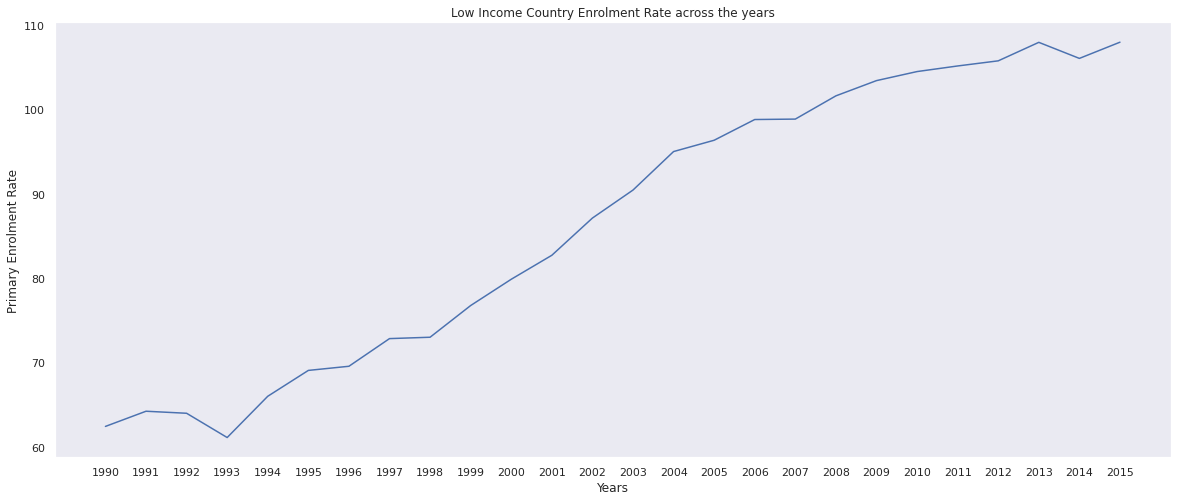

In [136]:

# Indicator 1: Enrolement Rate    
primary_df = low_income_df[low_income_df['Indicator Name']=='Gross enrolment ratio, primary, both sexes (%)']
low_inc_prim1 =  primary_df[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'Primary Enrolment Rate'})

print(f'Region: {region} Countries: {countries}')
# Low Income Countries Primary Enrolment Rate
low_inc_prim1
x_label=low_inc_prim1['Years']                
y_label=low_inc_prim1['Primary Enrolment Rate']
plt.plot(x_label,y_label)
plt.title('Low Income Country Enrolment Rate across the years')
plt.ylabel('Primary Enrolment Rate')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (20, 8) 
plt.grid()

In [137]:
primary_df.sort_values('2010', ascending=False).reset_index()

index              Country Name Country Code  \
0   136779                Madagascar          MDG   
1   184402                    Rwanda          RWA   
2   158875                     Nepal          NPL   
3   138386                    Malawi          MWI   
4    42385                   Burundi          BDI   
5   218906                      Togo          TGO   
6    45200                  Cambodia          KHM   
7   225685                    Uganda          UGA   
8    30876                     Benin          BEN   
9    94464             Guinea-Bissau          GNB   
10  154934                Mozambique          MOZ   
11    9295               Afghanistan          AFG   
12   24380                Bangladesh          BGD   
13  213567                Tajikistan          TJK   
14  215088                  Tanzania          TZA   
15  156314                   Myanmar          MMR   
16   57028          Congo, Dem. Rep.          COD   
17   79380                  Ethiopia          ETH   
18   49166  Central African Republic          CAF   
19   93558                    Guinea          GIN   
20   85782               Gambia, The          GMB   
21  142582                      Mali          MLI   
22   50256                      Chad          TCD   
23   40637              Burkina Faso          BFA   
24  164778                     Niger          NER   
25   76869                   Eritrea          ERI   

                                    Indicator Name Indicator Code        1990  \
0   Gross enrolment ratio, primary, both sexes (%)    SE.PRM.ENRR   96.447510   
1   Gross enrolment ratio, primary, both sexes (%)    SE.PRM.ENRR   73.106361   
2   Gross enrolment ratio, primary, both sexes (%)    SE.PRM.ENRR  111.929413   
3   Gross enrolment ratio, primary, both sexes (%)    SE.PRM.ENRR   73.121208   
4   Gross enrolment ratio, primary, both sexes (%)    SE.PRM.ENRR   67.325974   
5   Gross enrolment ratio, primary, both sexes (%)    SE.PRM.ENRR   92.815277   
6   Gross enrolment ratio, primary, both sexes (%)    SE.PRM.ENRR  111.919388   
7   Gross enrolment ratio, primary, both sexes (%)    SE.PRM.ENRR   70.546577   
8   Gross enrolment ratio, primary, both sexes (%)    SE.PRM.ENRR   50.938210   
9   Gross enrolment ratio, primary, both sexes (%)    SE.PRM.ENRR         NaN   
10  Gross enrolment ratio, primary, both sexes (%)    SE.PRM.ENRR   63.251289   
11  Gross enrolment ratio, primary, both sexes (%)    SE.PRM.ENRR   30.091150   
12  Gross enrolment ratio, primary, both sexes (%)    SE.PRM.ENRR   81.047562   
13  Gross enrolment ratio, primary, both sexes (%)    SE.PRM.ENRR         NaN   
14  Gross enrolment ratio, primary, both sexes (%)    SE.PRM.ENRR   69.577927   
15  Gross enrolment ratio, primary, both sexes (%)    SE.PRM.ENRR   89.230072   
16  Gross enrolment ratio, primary, both sexes (%)    SE.PRM.ENRR   61.278549   
17  Gross enrolment ratio, primary, both sexes (%)    SE.PRM.ENRR   35.317261   
18  Gross enrolment ratio, primary, both sexes (%)    SE.PRM.ENRR   70.142578   
19  Gross enrolment ratio, primary, both sexes (%)    SE.PRM.ENRR   34.815689   
20  Gross enrolment ratio, primary, both sexes (%)    SE.PRM.ENRR   57.182880   
21  Gross enrolment ratio, primary, both sexes (%)    SE.PRM.ENRR   27.185520   
22  Gross enrolment ratio, primary, both sexes (%)    SE.PRM.ENRR   49.632271   
23  Gross enrolment ratio, primary, both sexes (%)    SE.PRM.ENRR   32.525501   
24  Gross enrolment ratio, primary, both sexes (%)    SE.PRM.ENRR   26.806870   
25  Gross enrolment ratio, primary, both sexes (%)    SE.PRM.ENRR   22.071800   

          1991        1992        1993        1994  ...        2009  \
0    99.928360   93.776176   90.669197   87.745361  ...  149.951736   
1    75.174217   80.703072         NaN         NaN  ...  143.792725   
2   112.934509  115.864708  115.036880  115.810768  ...  137.276367   
3    76.064194   91.406303   97.165901  103.740692  ...  130.053345   
4    68.662666   65.212547   6

In [138]:
# Indicator 2: Completion Rate
completion_df = low_income_df[low_income_df['Indicator Name']=='Primary completion rate, both sexes (%)']
low_income_prim1 =  completion_df[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'Primary Completion Rate'})

print(f'Region: {region} Countries: {countries}')
# Global Primary Completion Rate
low_income_prim1


Region: ['South Asia'] Countries: ['Afghanistan', 'Bangladesh', 'Nepal']


Years  Primary Completion Rate
0   1990                27.699947
1   1991                32.586223
2   1992                34.068325
3   1993                35.176536
4   1994                31.085468
5   1995                33.203745
6   1996                31.361779
7   1997                36.784763
8   1998                29.910223
9   1999                41.351342
10  2000                40.185035
11  2001                44.612710
12  2002                45.257853
13  2003                49.299432
14  2004                50.276827
15  2005                53.133879
16  2006                57.233150
17  2007                59.666822
18  2008                59.252234
19  2009                62.153877
20  2010                62.498649
21  2011                61.744129
22  2012                62.762864
23  2013                65.050530
24  2014                69.359480
25  2015                68.287699

In [139]:
completion_df.sort_values('2010', ascending=False).reset_index()

index              Country Name Country Code  \
0   213971                Tajikistan          TJK   
1   215448                  Tanzania          TZA   
2    45566                  Cambodia          KHM   
3   156711                   Myanmar          MMR   
4    86142               Gambia, The          GMB   
5   137215                Madagascar          MDG   
6   219279                      Togo          TGO   
7   184745                    Rwanda          RWA   
8   138762                    Malawi          MWI   
9    24787                Bangladesh          BGD   
10   31257                     Benin          BEN   
11   94808             Guinea-Bissau          GNB   
12   57396          Congo, Dem. Rep.          COD   
13   79817                  Ethiopia          ETH   
14   93905                    Guinea          GIN   
15  143011                      Mali          MLI   
16  226055                    Uganda          UGA   
17  155403                Mozambique          MOZ   
18   42831                   Burundi          BDI   
19   41078              Burkina Faso          BFA   
20   77294                   Eritrea          ERI   
21   49597  Central African Republic          CAF   
22  165247                     Niger          NER   
23   50666                      Chad          TCD   

                             Indicator Name  Indicator Code       1990  \
0   Primary completion rate, both sexes (%)  SE.PRM.CMPT.ZS        NaN   
1   Primary completion rate, both sexes (%)  SE.PRM.CMPT.ZS        NaN   
2   Primary completion rate, both sexes (%)  SE.PRM.CMPT.ZS        NaN   
3   Primary completion rate, both sexes (%)  SE.PRM.CMPT.ZS        NaN   
4   Primary completion rate, both sexes (%)  SE.PRM.CMPT.ZS        NaN   
5   Primary completion rate, both sexes (%)  SE.PRM.CMPT.ZS  35.046711   
6   Primary completion rate, both sexes (%)  SE.PRM.CMPT.ZS  36.378502   
7   Primary completion rate, both sexes (%)  SE.PRM.CMPT.ZS  43.131130   
8   Primary completion rate, both sexes (%)  SE.PRM.CMPT.ZS  29.295040   
9   Primary completion rate, both sexes (%)  SE.PRM.CMPT.ZS        NaN   
10  Primary completion rate, both sexes (%)  SE.PRM.CMPT.ZS  18.653959   
11  Primary completion rate, both sexes (%)  SE.PRM.CMPT.ZS        NaN   
12  Primary completion rate, both sexes (%)  SE.PRM.CMPT.ZS        NaN   
13  Primary completion rate, both sexes (%)  SE.PRM.CMPT.ZS        NaN   
14  Primary completion rate, both sexes (%)  SE.PRM.CMPT.ZS  19.927710   
15  Primary completion rate, both sexes (%)  SE.PRM.CMPT.ZS        NaN   
16  Primary completion rate, both sexes (%)  SE.PRM.CMPT.ZS        NaN   
17  Primary completion rate, both sexes (%)  SE.PRM.CMPT.ZS  26.684059   
18  Primary completion rate, both sexes (%)  SE.PRM.CMPT.ZS  40.568481   
19  Primary completion rate, both sexes (%)  SE.PRM.CMPT.ZS  19.495890   
20  Primary completion rate, both sexes (%)  SE.PRM.CMPT.ZS        NaN   
21  Primary completion rate, both sexes (%)  SE.PRM.CMPT.ZS  30.172171   
22  Primary completion rate, both sexes (%)  SE.PRM.CMPT.ZS  16.450991   
23  Primary completion rate, both sexes (%)  SE.PRM.CMPT.ZS  16.594721   

         1991       1992       1993       1994  ...        2009        2010  \
0         NaN        NaN        NaN        NaN  ...   97.779488  100.937889   
1   62.549770  55.220322  58.125130  55.778980  ...  100.610451   87.631859   
2         NaN        NaN        NaN  45.978939  ...   82.990829   84.874077   
3         NaN        NaN        NaN        NaN  ...   84.403687   84.350327   
4         NaN  41.755741  39.623569  38.554981  ...         NaN   73.469543   
5   34.675560  32.565781  34.159199  31.534019  ...   73.963150   70.545670   
6   36.384251  37.106022        NaN  28.384470  ...   65.701797   70.469940   
7   43.499561  46.599171        NaN        NaN  ...   68.427788   69.547462   
8   32.639580  36.253929  38.416759  40.710678  ...   65.182564   67.562050   
9         NaN        NaN        NaN   

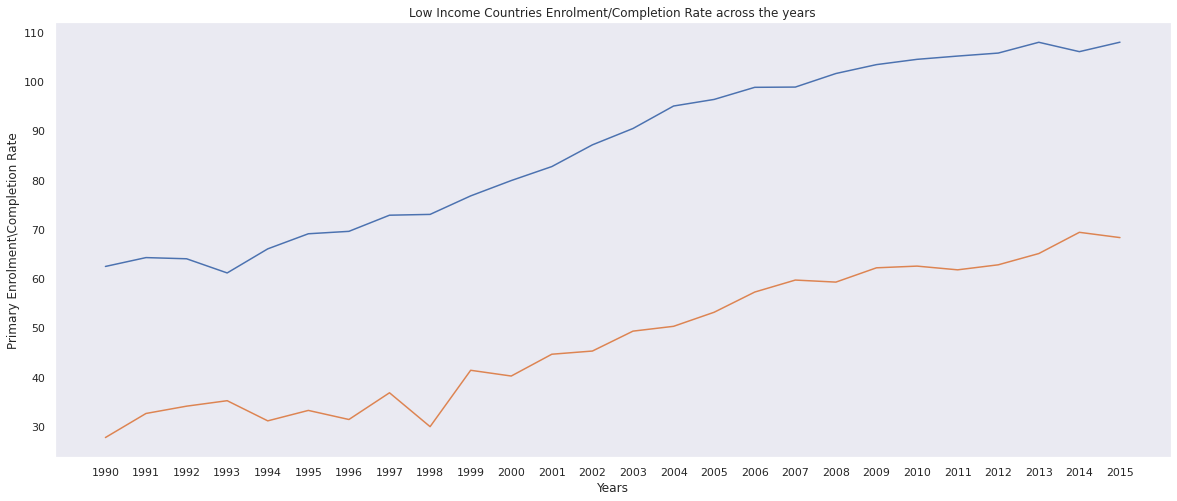

In [140]:
# Comparing Primary enrolment and completion rate
comp_enrol_merge = pd.merge(low_inc_prim1,low_income_prim1, how='left', on='Years')
comp_enrol_merge
x_label=comp_enrol_merge['Years']                
y_label=comp_enrol_merge[['Primary Enrolment Rate','Primary Completion Rate']]
plt.plot(x_label,y_label)
plt.title('Low Income Countries Enrolment/Completion Rate across the years')
plt.ylabel('Primary Enrolment\Completion Rate')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (20, 8) 
plt.grid()

### Comparing Enrolemnt rate and Completion rate of South Asian Low Income countries:
1. The above graph is showin mean enrolment and completion rate of three south asian low income countries Afghanistan, Bangladesh and Nepal.
2. The comparable non-null data is only between 2008 to 2011. 
3. Enrolment: 2008 - 110%; 2011 - 120%;
   Completion: 2008 - 58%; 2011 - 73%;
4. This shows that half of the enrolled students are not able to complete their education in time.   

In [141]:
# Indicator 3 : Literacy Rate
literacy_df = low_income_df[low_income_df['Indicator Name'].isin(indicator_with_literacy)]

In [142]:
adult_df = literacy_df[literacy_df['Indicator Name']=='Adult literacy rate, population 15+ years, both sexes (%)']
youth_df = literacy_df[literacy_df['Indicator Name']=='Youth literacy rate, population 15-24 years, both sexes (%)']
elderly_df = literacy_df[literacy_df['Indicator Name']=='Elderly literacy rate, population 65+ years, both sexes (%)']

new_df1111 =  adult_df[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'Adult literacy Rate'})
new_df2222 = youth_df[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'Youth literacy Rate'})
new_df3333 = elderly_df[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'Elderly literacy Rate'})


In [143]:
adult_df.sort_values('2010', ascending=False).reset_index()

index              Country Name Country Code  \
0  225137                    Uganda          UGA   
1  214451                  Tanzania          TZA   
2  183742                    Rwanda          RWA   
3  137651                    Malawi          MWI   
4   48659  Central African Republic          CAF   
5  141951                      Mali          MLI   
6   93373                    Guinea          GIN   

                                      Indicator Name  Indicator Code  1990  \
0  Adult literacy rate, population 15+ years, bot...  SE.ADT.LITR.ZS   NaN   
1  Adult literacy rate, population 15+ years, bot...  SE.ADT.LITR.ZS   NaN   
2  Adult literacy rate, population 15+ years, bot...  SE.ADT.LITR.ZS   NaN   
3  Adult literacy rate, population 15+ years, bot...  SE.ADT.LITR.ZS   NaN   
4  Adult literacy rate, population 15+ years, bot...  SE.ADT.LITR.ZS   NaN   
5  Adult literacy rate, population 15+ years, bot...  SE.ADT.LITR.ZS   NaN   
6  Adult literacy rate, population 15+ years, bot...  SE.ADT.LITR.ZS   NaN   

        1991  1992  1993  1994  ...  2009      2010      2011      2012  2013  \
0  56.107380   NaN   NaN   NaN  ...   NaN  73.21188       NaN  70.19822   NaN   
1        NaN   NaN   NaN   NaN  ...   NaN  67.80070       NaN  78.10059   NaN   
2  57.853489   NaN   NaN   NaN  ...   NaN  65.85227       NaN  68.33103   NaN   
3        NaN   NaN   NaN   NaN  ...   NaN  61.30972       NaN       NaN   NaN   
4        NaN   NaN   NaN   NaN  ...   NaN  36.75261       NaN       NaN   NaN   
5        NaN   NaN   NaN   NaN  ...   NaN  31.09975  33.56094       NaN   NaN   
6        NaN   NaN   NaN   NaN  ...   NaN  25.30774       NaN       NaN   NaN   

       2014      2015       Currency Unit              Region  Income Group  
0       NaN       NaN    Ugandan shilling  Sub-Saharan Africa    Low income  
1       NaN  77.88723  Tanzanian shilling  Sub-Saharan Africa    Low income  
2       NaN       NaN       Rwandan franc  Sub-Saharan Africa    Low income  
3  65.14537  62.14354       Malawi kwacha  Sub-Saharan Africa    Low income  
4       NaN       NaN           CFA franc  Sub-Saharan Africa    Low income  
5       NaN  33.06889           CFA franc  Sub-Saharan Africa    Low income  
6  32.00386       NaN       Guinean franc  Sub-Saharan Africa    Low income  

[7 rows x 34 columns]

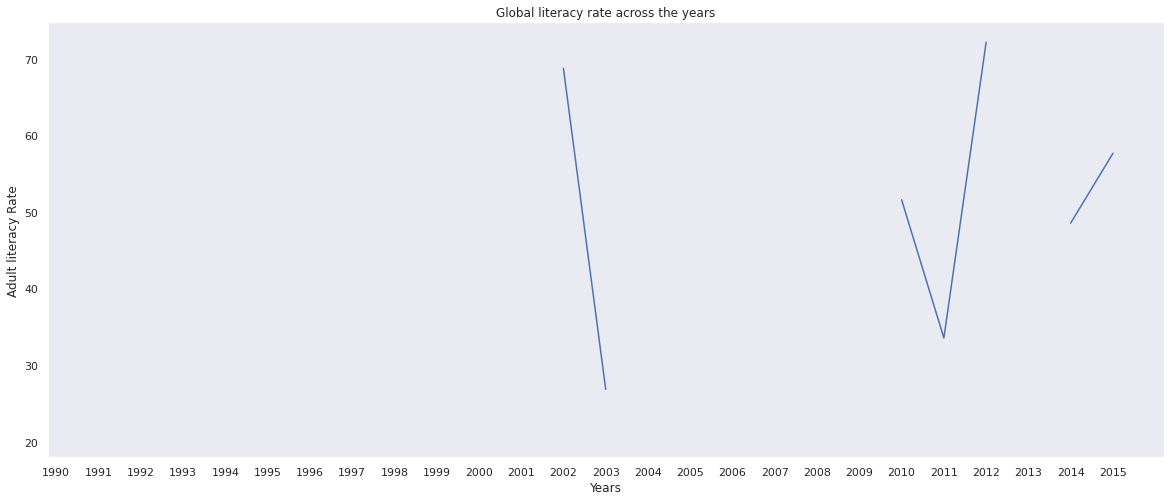

In [144]:
new_df1111
x_label=new_df1111['Years']                
y_label=new_df1111[['Adult literacy Rate']]
plt.plot(x_label,y_label)
plt.title('Global literacy rate across the years')
plt.ylabel('Adult literacy Rate')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (20, 8)
plt.grid()

In [145]:
# Indicator 4: Unemployment
unemployed_df = low_income_df[low_income_df['Indicator Name']=='Unemployment, total (% of total labor force)']
Uneducated_unemployed = low_income_df[low_income_df['Indicator Name']=='Share of youth not in education, employment, or training, total (% of youth population)']

In [146]:
umemployed_sorted = unemployed_df.sort_values('2010', ascending=False).reset_index()
umemployed_sorted

index               Country Name Country Code  \
0    86277                Gambia, The          GMB   
1   155553                 Mozambique          MOZ   
2    56168                    Comoros          COM   
3    97279                      Haiti          HTI   
4   118829                      Kenya          KEN   
5   214130                 Tajikistan          TJK   
6     9612                Afghanistan          AFG   
7   143164                       Mali          MLI   
8    77453                    Eritrea          ERI   
9   139071                     Malawi          MWI   
10   94004                     Guinea          GIN   
11  219559                       Togo          TGO   
12   94871              Guinea-Bissau          GNB   
13  242133                   Zimbabwe          ZWE   
14   49683   Central African Republic          CAF   
15  197981                    Somalia          SOM   
16   50812                       Chad          TCD   
17   79974                   Ethiopia          ETH   
18   24910                 Bangladesh          BGD   
19  119452  Korea, Dem. People’s Rep.          PRK   
20  137330                 Madagascar          MDG   
21   57662           Congo, Dem. Rep.          COD   
22  129950                    Liberia          LBR   
23   41364               Burkina Faso          BFA   
24  226243                     Uganda          UGA   
25  192718               Sierra Leone          SLE   
26  215702                   Tanzania          TZA   
27  185010                     Rwanda          RWA   
28  159359                      Nepal          NPL   
29  165422                      Niger          NER   
30   43170                    Burundi          BDI   
31   31349                      Benin          BEN   
32  156808                    Myanmar          MMR   
33   45876                   Cambodia          KHM   

                                  Indicator Name  Indicator Code  1990  \
0   Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
1   Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
2   Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
3   Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
4   Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
5   Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
6   Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
7   Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
8   Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
9   Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
10  Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
11  Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
12  Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
13  Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
14  Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
15  Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
16  Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
17  Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
18  Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
19  Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
20  Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
21  Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
22  Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
23  Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
24  Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
25  Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
26  Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
27  Unemployment, total (% of total labor 

Region: ['South Asia'] Countries: ['Afghanistan', 'Bangladesh', 'Nepal']


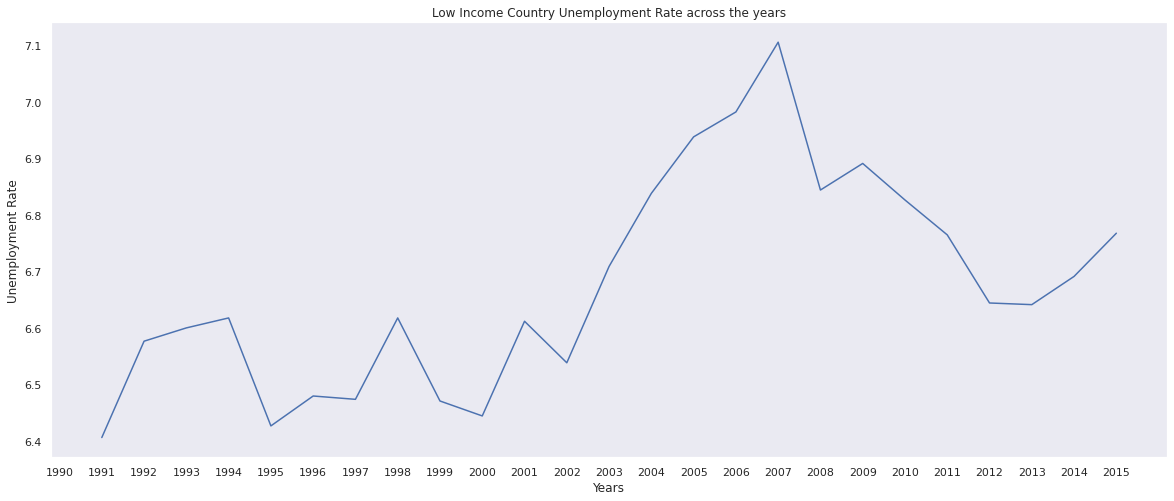

In [147]:
low_income_unem1 =  unemployed_df[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'Unemployment Rate'})

print(f'Region: {region} Countries: {countries}')
low_income_unem1
x_label=low_income_unem1['Years']                
y_label=low_income_unem1['Unemployment Rate']
plt.plot(x_label,y_label)
plt.title('Low Income Country Unemployment Rate across the years')
plt.ylabel('Unemployment Rate')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (20, 8) 
plt.grid()

### Unemployment rate in low income countries:
1. 1991 - 2%; 2015 - 5.3%;
2. Sharp increase in unemployment in 2002-03 i.e., 2.7 to 5.3

In [148]:
# Indicator 5: GDP per capita and Expenditure     
low_gdp_capita = low_income_df[low_income_df['Indicator Name']=='GDP per capita (constant 2005 US$)']
expenditure_low = low_income_df[low_income_df['Indicator Name']=='Expenditure on education as % of total government expenditure (%)']
low_gdp_ppp = low_income_df[low_income_df['Indicator Name']=='GDP, PPP (constant 2011 international $)']
GNI_per_capita_low = low_income_df[low_income_df['Indicator Name']=='GNI per capita, PPP (current international $)']


Region: ['South Asia'] Countries: ['Afghanistan', 'Bangladesh', 'Nepal']


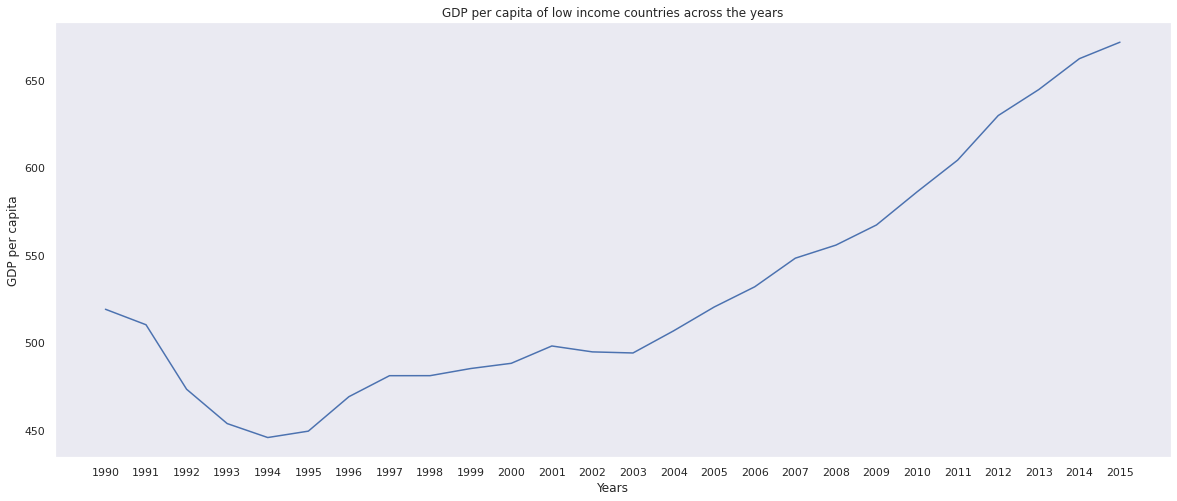

In [149]:
low_gdp1 =  low_gdp_ppp[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'GDP PPP'})

low_gdp2 =  low_gdp_capita[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'GDP per capita'})

print(f'Region: {region} Countries: {countries}')

low_gdp2
x_label=low_gdp2['Years']                
y_label=low_gdp2['GDP per capita']
plt.plot(x_label,y_label)
plt.title('GDP per capita of low income countries across the years')
plt.ylabel('GDP per capita')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (20, 10) 
plt.grid()

Region: ['South Asia'] Countries: ['Afghanistan', 'Bangladesh', 'Nepal']


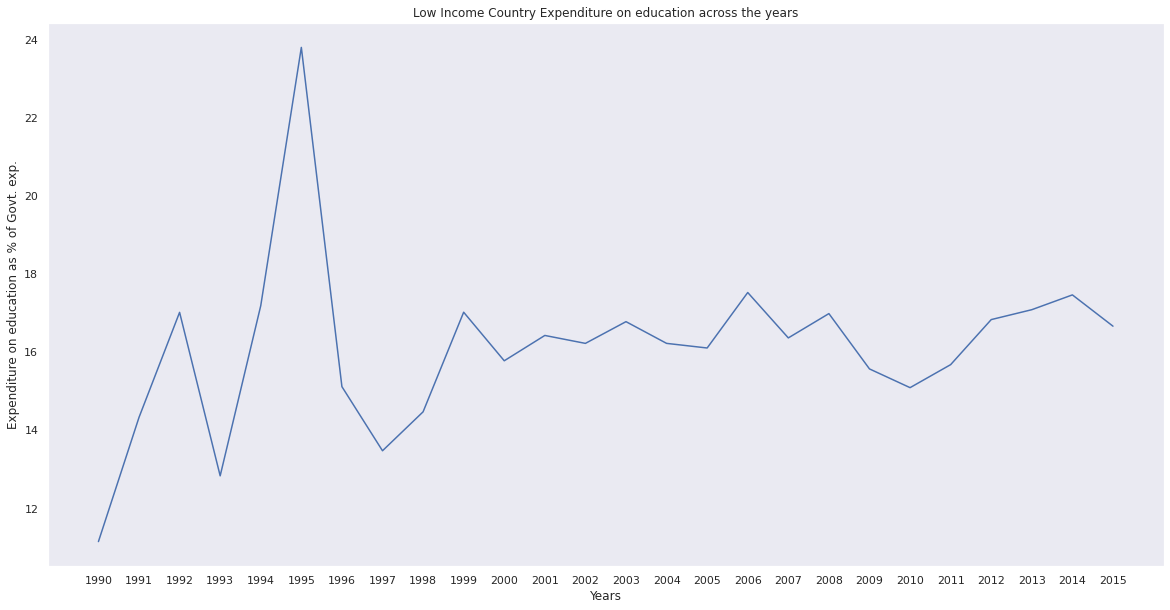

In [150]:
low_income_expenditure1 =  expenditure_low[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'Expenditure on education'})

print(f'Region: {region} Countries: {countries}')
low_income_expenditure1
x_label=low_income_expenditure1['Years']                
y_label=low_income_expenditure1['Expenditure on education']
plt.plot(x_label,y_label)
plt.title('Low Income Country Expenditure on education across the years')
plt.ylabel('Expenditure on education as % of Govt. exp.')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (20, 8) 
plt.grid()

Region: ['South Asia'] Countries: ['Afghanistan', 'Bangladesh', 'Nepal']


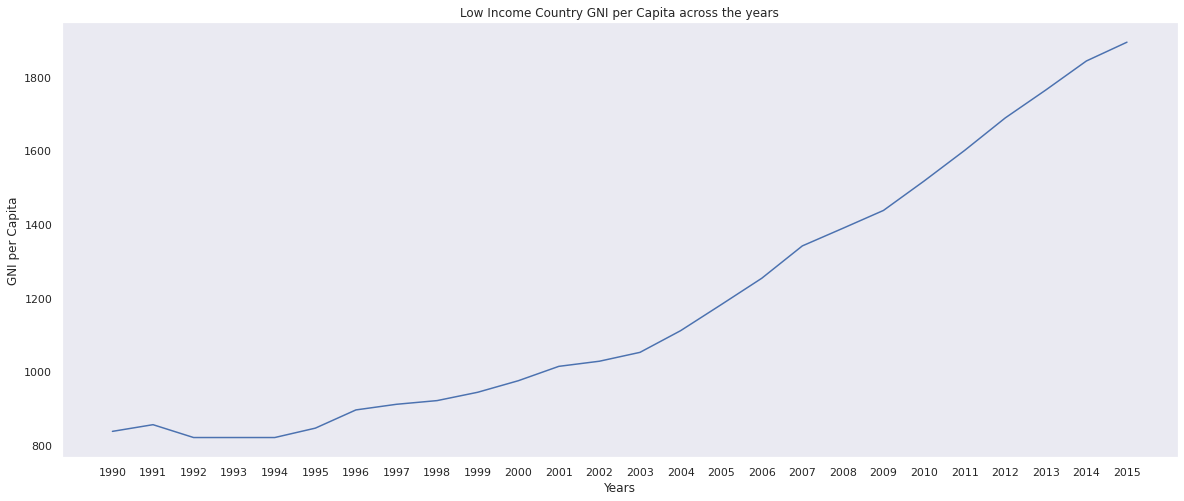

In [151]:
low_income_GNI_per_capita1 =  GNI_per_capita_low[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'GNI per Capita'})

print(f'Region: {region} Countries: {countries}')
low_income_GNI_per_capita1 
x_label=low_income_GNI_per_capita1['Years']                
y_label=low_income_GNI_per_capita1['GNI per Capita']
plt.plot(x_label,y_label)
plt.title('Low Income Country GNI per Capita across the years')
plt.ylabel('GNI per Capita')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (20, 8) 
plt.grid()

Region: ['South Asia'] Countries: ['Afghanistan', 'Bangladesh', 'Nepal']


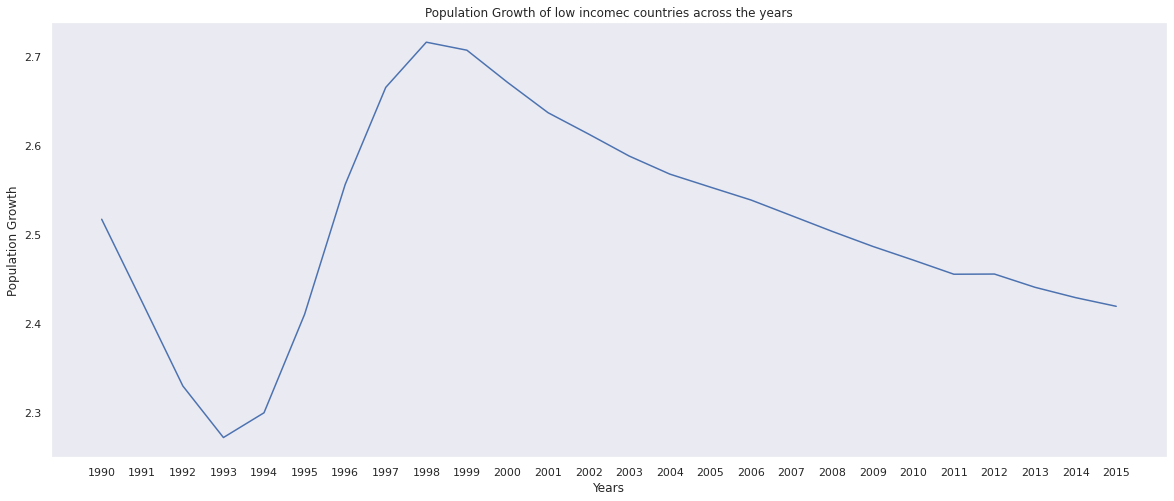

In [152]:
# Indicator 6: Population Growth    
low_df = low_income_df[low_income_df['Indicator Name']=='Population growth (annual %)']
low_pop_gro =  low_df[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'Population Growth'})

print(f'Region: {region} Countries: {countries}')
# Lower Secondary Enrolment Rate of India
low_pop_gro
x_label=low_pop_gro['Years']                
y_label=low_pop_gro['Population Growth']
plt.plot(x_label,y_label)
plt.title('Population Growth of low incomec countries across the years')
plt.ylabel('Population Growth')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (20, 10) 
plt.grid()

In [153]:
# Indicator 7.1: Teachers
list8 = ['Teachers in primary education, both sexes (number)',
       'Teachers in primary education, female (number)',
        'Teachers in secondary education, both sexes (number)',
       'Teachers in secondary education, female (number)',
        'Teachers in upper secondary education, both sexes (number)',
       'Teachers in upper secondary education, female (number)',
       'Teachers in tertiary education programmes, both sexes (number)',
       'Teachers in tertiary education programmes, female (number)']
teachers_df = low_income_df[low_income_df['Indicator Name'].isin(list8)]

In [154]:

teachers_df1 = teachers_df[teachers_df['Indicator Name']=='Teachers in primary education, both sexes (number)']
teachers_df2 = teachers_df[teachers_df['Indicator Name']=='Teachers in secondary education, both sexes (number)']
teachers_df3 = teachers_df[teachers_df['Indicator Name']=='Teachers in upper secondary education, both sexes (number)']
teachers_df4 = teachers_df[teachers_df['Indicator Name']=='Teachers in tertiary education programmes, both sexes (number)']

       

p_teachers_df =  teachers_df1[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].sum().reset_index().rename(columns={'index':'Years', 0:'Teachers in primary education'})
s_teachers_df = teachers_df2[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].sum().reset_index().rename(columns={'index':'Years', 0:'Teachers in secondary education'})
us_teachers_df = teachers_df3[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].sum().reset_index().rename(columns={'index':'Years', 0:'Teachers in upper secondary education'})
t_teachers_df = teachers_df4[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].sum().reset_index().rename(columns={'index':'Years', 0:'Teachers in tertiary education'})


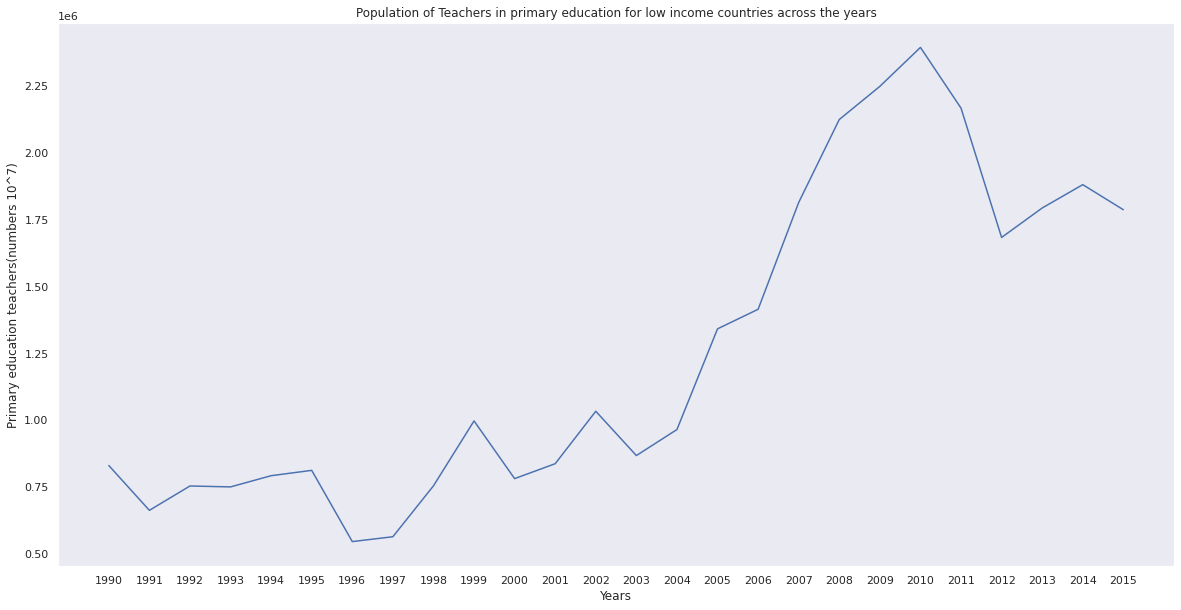

In [155]:
p_teachers_df
x_label=p_teachers_df['Years']                
y_label=p_teachers_df[['Teachers in primary education']]
plt.plot(x_label,y_label)
plt.title('Population of Teachers in primary education for low income countries across the years')
plt.ylabel('Primary education teachers(numbers 10^7)')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (20, 8)
plt.grid()

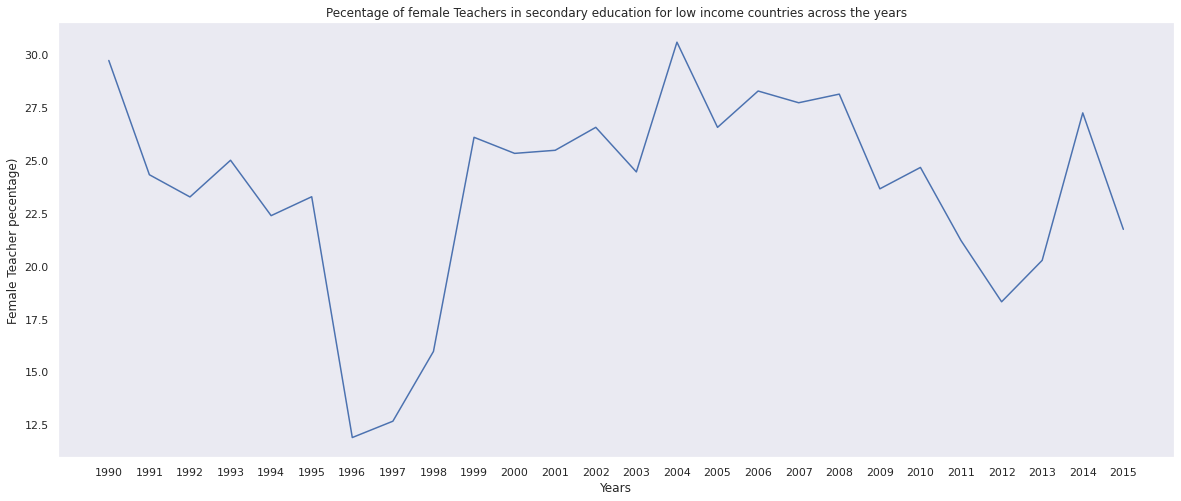

In [156]:
# Indicator 7.2: Teachers percentage
female_teachers = low_income_df[low_income_df['Indicator Name']=='Percentage of teachers in secondary education who are female (%)']
female_teachers_mean =  female_teachers[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'Female Teachers in secondary education'})

female_teachers_mean
x_label=female_teachers_mean['Years']                
y_label=female_teachers_mean[['Female Teachers in secondary education']]
plt.plot(x_label,y_label)
plt.title('Pecentage of female Teachers in secondary education for low income countries across the years')
plt.ylabel('Female Teacher pecentage)')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (20, 8)
plt.grid()

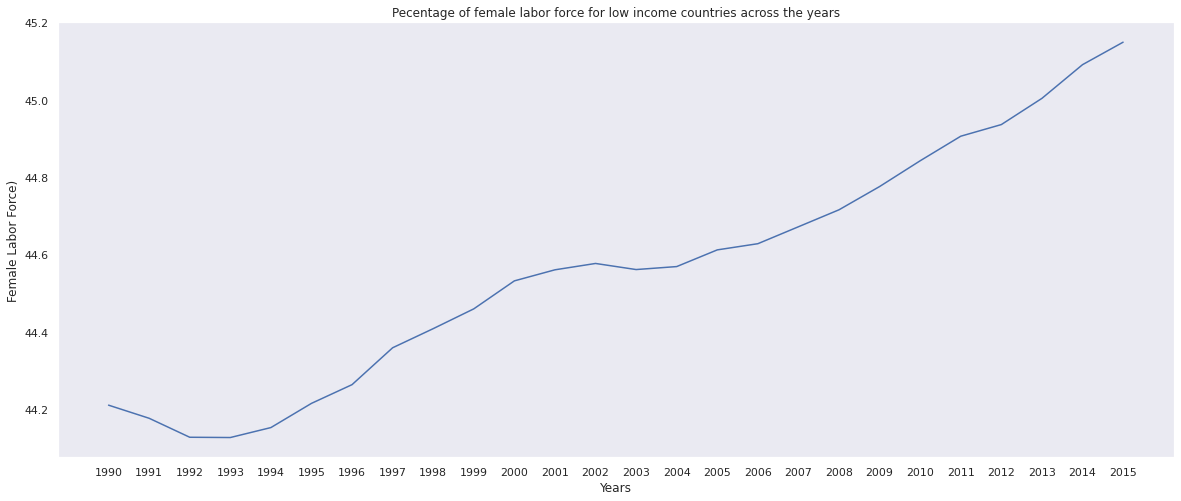

In [157]:
# Indicator 8- Female labor as a % of total labor force
female_labor = low_income_df[low_income_df['Indicator Name']=='Labor force, female (% of total labor force)']
female_labor_mean =  female_labor[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'Female labor force'})

female_labor_mean
x_label=female_labor_mean['Years']                
y_label=female_labor_mean[['Female labor force']]
plt.plot(x_label,y_label)
plt.title('Pecentage of female labor force for low income countries across the years')
plt.ylabel('Female Labor Force)')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (20, 8)
plt.grid()

In [158]:
female_labor.sort_values('2010', ascending=False).reset_index()

index               Country Name Country Code  \
0   154972                 Mozambique          MOZ   
1    42418                    Burundi          BDI   
2   184436                     Rwanda          RWA   
3   215114                   Tanzania          TZA   
4   158910                      Nepal          NPL   
5   192472               Sierra Leone          SLE   
6    45218                   Cambodia          KHM   
7    57046           Congo, Dem. Rep.          COD   
8    30893                      Benin          BEN   
9   218925                       Togo          TGO   
10  136808                 Madagascar          MDG   
11  241621                   Zimbabwe          ZWE   
12   93584                     Guinea          GIN   
13  138421                     Malawi          MWI   
14  119207  Korea, Dem. People’s Rep.          PRK   
15  129638                    Liberia          LBR   
16  225711                     Uganda          UGA   
17  118529                      Kenya          KEN   
18   97028                      Haiti          HTI   
19   94482              Guinea-Bissau          GNB   
20   79422                   Ethiopia          ETH   
21   76896                    Eritrea          ERI   
22   49184   Central African Republic          CAF   
23   50290                       Chad          TCD   
24   40663               Burkina Faso          BFA   
25  164815                      Niger          NER   
26   85808                Gambia, The          GMB   
27  156344                    Myanmar          MMR   
28   55910                    Comoros          COM   
29  213604                 Tajikistan          TJK   
30  142620                       Mali          MLI   
31   24406                 Bangladesh          BGD   
32  197744                    Somalia          SOM   
33    9313                Afghanistan          AFG   

                                  Indicator Name     Indicator Code  \
0   Labor force, female (% of total labor force)  SL.TLF.TOTL.FE.ZS   
1   Labor force, female (% of total labor force)  SL.TLF.TOTL.FE.ZS   
2   Labor force, female (% of total labor force)  SL.TLF.TOTL.FE.ZS   
3   Labor force, female (% of total labor force)  SL.TLF.TOTL.FE.ZS   
4   Labor force, female (% of total labor force)  SL.TLF.TOTL.FE.ZS   
5   Labor force, female (% of total labor force)  SL.TLF.TOTL.FE.ZS   
6   Labor force, female (% of total labor force)  SL.TLF.TOTL.FE.ZS   
7   Labor force, female (% of total labor force)  SL.TLF.TOTL.FE.ZS   
8   Labor force, female (% of total labor force)  SL.TLF.TOTL.FE.ZS   
9   Labor force, female (% of total labor force)  SL.TLF.TOTL.FE.ZS   
10  Labor force, female (% of total labor force)  SL.TLF.TOTL.FE.ZS   
11  Labor force, female (% of total labor force)  SL.TLF.TOTL.FE.ZS   
12  Labor force, female (% of total labor force)  SL.TLF.TOTL.FE.ZS   
13  Labor force, female (% of total labor force)  SL.TLF.TOTL.FE.ZS   
14  Labor force, female (% of total labor force)  SL.TLF.TOTL.FE.ZS   
15  Labor force, female (% of total labor force)  SL.TLF.TOTL.FE.ZS   
16  Labor force, female (% of total labor force)  SL.TLF.TOTL.FE.ZS   
17  Labor force, female (% of total labor force)  SL.TLF.TOTL.FE.ZS   
18  Labor force, female (% of total labor force)  SL.TLF.TOTL.FE.ZS   
19  Labor force, female (% of total labor force)  SL.TLF.TOTL.FE.ZS   
20  Labor force, female (% of total labor force)  SL.TLF.TOTL.FE.ZS   
21  Labor force, female (% of total labor force)  SL.TLF.TOTL.FE.ZS   
22  Labor force, female (% of total labor force)  SL.TLF.TOTL.FE.ZS   
23  Labor force, female (% of total labor force)  SL.TLF.TOTL.FE.ZS   
24  Labor force, female (% of total labor force)  SL.TLF.TOTL.FE.ZS   
25  Labor force, female (% of total labor force)  SL.TLF.TOTL.FE.ZS   
26  Labor force, female (% of total labor force)  SL.TLF.TOTL.FE.ZS   
27  Labor force, female (% of total labor force)  SL.TLF.TOTL.FE.ZS   
28  Labor force, female (% of total labor force)  SL.TL

## Comparison 1: Female labour force vs GDP

In [159]:
labor_gdp_merge = pd.merge(low_gdp2, female_labor_mean, how='left', on='Years')

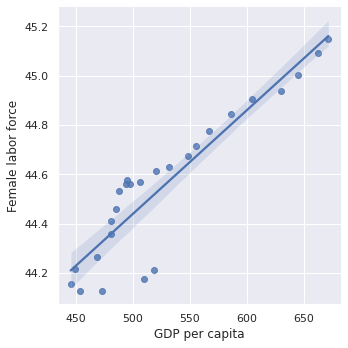

In [160]:
sb.lmplot(x = 'GDP per capita', y = 'Female labor force', data = labor_gdp_merge)

## Comparison 2:  Enrolment rate vs GDP per capita growth over 25 years in low income countries

Region: ['South Asia'] Countries: ['Afghanistan', 'Bangladesh', 'Nepal']


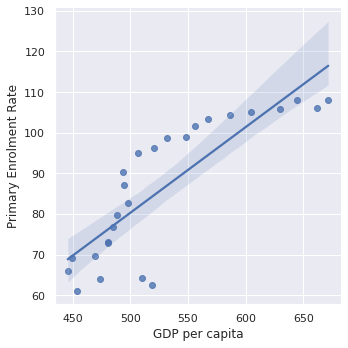

In [161]:
gdp_enrol_merge = pd.merge(low_inc_prim1, low_gdp2, how='left', on='Years')
gdp_enrol_merge
print(f'Region: {region} Countries: {countries}')
sb.lmplot(x = 'GDP per capita', y = 'Primary Enrolment Rate', data = gdp_enrol_merge)

## Comparison 3: (GDP PPP vs Expenditure for 25 years)

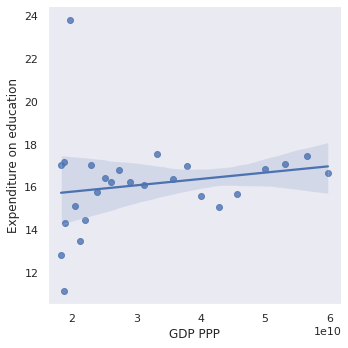

In [162]:
merge_exp_GDP = pd.merge(low_gdp1 ,low_income_expenditure1, how='left', on='Years')
merge_exp_GDP

sb.lmplot(x = 'GDP PPP', y = 'Expenditure on education', data = merge_exp_GDP)
 
plt.grid()

In [163]:
# Case 2 : Lower Middle Income Countries
print('Lower Middle Income Countries:') 
print(low_mid_income_df['Country Name'].unique())
print('\n')
print('No. of Countries:')
print(len(low_mid_income_df['Country Name'].unique()))
print('\n')
print('Regions with Lower Middle Income Countries')
print(low_mid_income_df['Region'].unique())
region_count = low_mid_income_df.groupby('Region')['Country Name'].unique().reset_index()
region_count

Lower Middle Income Countries:
['Armenia' 'Bhutan' 'Bolivia' 'Cabo Verde' 'Cameroon' 'Congo, Rep.'
 "Cote d'Ivoire" 'Djibouti' 'Egypt, Arab Rep.' 'El Salvador' 'Georgia'
 'Ghana' 'Guatemala' 'Guyana' 'Honduras' 'India' 'Indonesia' 'Kiribati'
 'Kosovo' 'Kyrgyz Republic' 'Lao PDR' 'Lesotho' 'Mauritania'
 'Micronesia, Fed. Sts.' 'Moldova' 'Mongolia' 'Morocco' 'Nicaragua'
 'Nigeria' 'Pakistan' 'Papua New Guinea' 'Paraguay' 'Philippines' 'Samoa'
 'Sao Tome and Principe' 'Senegal' 'Solomon Islands' 'South Sudan'
 'Sri Lanka' 'Sudan' 'Swaziland' 'Syrian Arab Republic' 'Timor-Leste'
 'Ukraine' 'Uzbekistan' 'Vanuatu' 'Vietnam' 'West Bank and Gaza'
 'Yemen, Rep.' 'Zambia']


No. of Countries:
50


Regions with Lower Middle Income Countries
['Europe & Central Asia' 'South Asia' 'Latin America & Caribbean'
 'Sub-Saharan Africa' 'Middle East & North Africa' 'East Asia & Pacific']


Region  \
0         East Asia & Pacific   
1       Europe & Central Asia   
2   Latin America & Caribbean   
3  Middle East & North Africa   
4                  South Asia   
5          Sub-Saharan Africa   

                                        Country Name  
0  [Indonesia, Kiribati, Lao PDR, Micronesia, Fed...  
1  [Armenia, Georgia, Kosovo, Kyrgyz Republic, Mo...  
2  [Bolivia, El Salvador, Guatemala, Guyana, Hond...  
3  [Djibouti, Egypt, Arab Rep., Morocco, Syrian A...  
4               [Bhutan, India, Pakistan, Sri Lanka]  
5  [Cabo Verde, Cameroon, Congo, Rep., Cote d'Ivo...

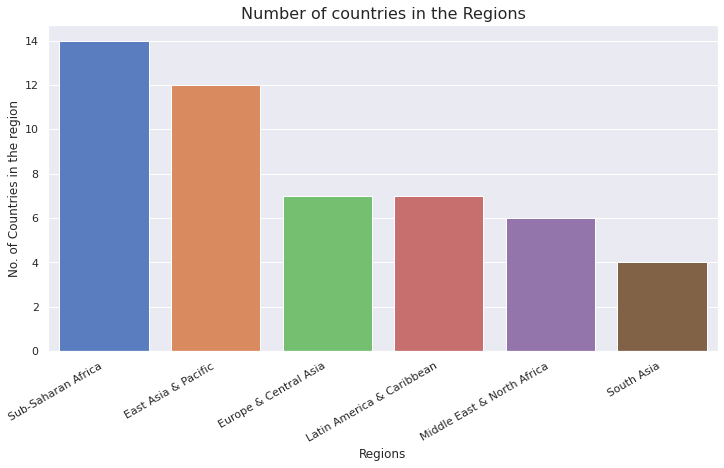

In [164]:
country_count = low_mid_income_df.groupby('Region')['Country Name'].nunique().reset_index().rename(columns={'Country Name':'No. of Countries'}).sort_values('No. of Countries', ascending=False)
country_count

sb.set_theme()
fig, ax = plt.subplots(figsize=(12,6))
colors = sb.color_palette("muted")
ax = sb.barplot(x="Region", y="No. of Countries", data=country_count, palette=colors)
ax.set(xlabel='Regions',ylabel='No. of Countries in the region')
ax.set_title('Number of countries in the Regions', fontsize = 16)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

In [165]:
# Region wise GNI per capita with no. of countries
low_mid_income_df = merged_df_final[merged_df_final['Income Group']=='Lower middle income']
GNI_per_capita_low_mid = low_mid_income_df[low_mid_income_df['Indicator Name']=='GNI per capita, PPP (current international $)']
fig = px.histogram(GNI_per_capita_low_mid, x='2010', color='Region')
fig.show()

In [166]:
low_mid_income_df = merged_df_final[merged_df_final['Income Group']=='Lower middle income']
low_mid_income_df = low_mid_income_df[low_mid_income_df['Region']=='South Asia']
region = list(low_mid_income_df['Region'].unique())
countries = list(low_mid_income_df['Country Name'].unique())


In [167]:
# Essential Indicators

enrolment_indicator2 = [elem0 for elem0 in low_mid_income_df['Indicator Name'].unique() if 'enrolment' in elem0] # Done
completion_indicator2 = [elem1 for elem1 in low_mid_income_df['Indicator Name'].unique() if 'completion' in elem1] # Done 
Unemployment_indicator2 = [elem2 for elem2 in low_mid_income_df['Indicator Name'].unique() if 'Unemployment' in elem2]  # Done 
GNI_indicator2 = [elem3 for elem3 in low_mid_income_df['Indicator Name'].unique() if 'GNI' in elem3]  # Done 
expenditure_indicator2 = [elem4 for elem4 in low_mid_income_df['Indicator Name'].unique() if 'expenditure' in elem4]    # Done
population_growth_indicator2 = [elem5 for elem5 in low_mid_income_df['Indicator Name'].unique() if 'Population growth' in elem5]    # Done


Region: ['South Asia'] Countries: ['Bhutan', 'India', 'Pakistan', 'Sri Lanka']


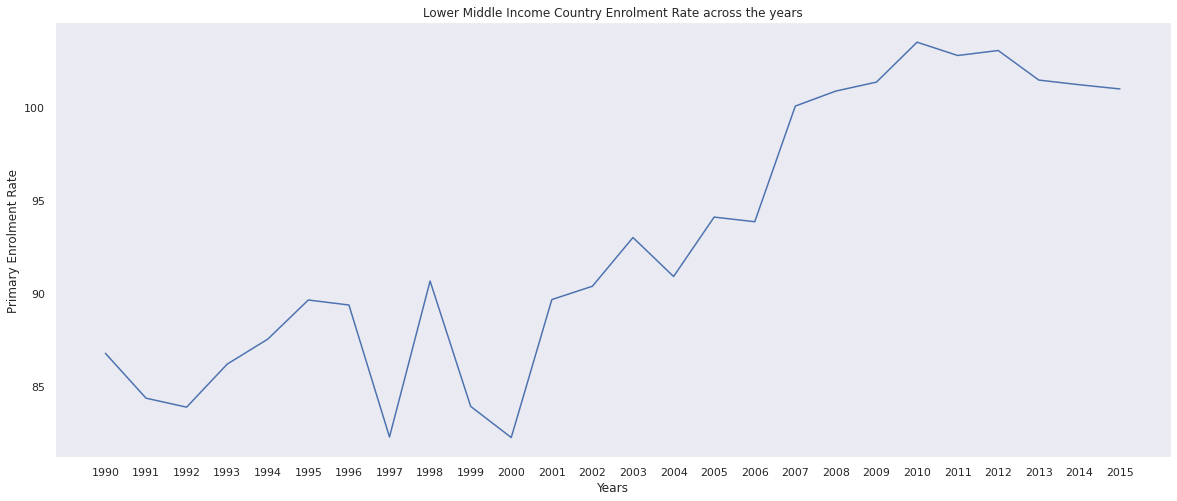

In [168]:

# Indicator 1: Enrolement Rate    
primary_df = low_mid_income_df[low_mid_income_df['Indicator Name']=='Gross enrolment ratio, primary, both sexes (%)']
low_inc_prim2 =  primary_df[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'Primary Enrolment Rate'})

print(f'Region: {region} Countries: {countries}')
# Low Income Countries Primary Enrolment Rate
low_inc_prim2
x_label=low_inc_prim2['Years']                
y_label=low_inc_prim2['Primary Enrolment Rate']
plt.plot(x_label,y_label)
plt.title('Lower Middle Income Country Enrolment Rate across the years')
plt.ylabel('Primary Enrolment Rate')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (20, 10) 
plt.grid()

In [169]:
pp = primary_df.sort_values('2010', ascending=False).reset_index()
pp[pp['Country Name']=='Pakistan']

index Country Name Country Code  \
3  168918     Pakistan          PAK   

                                   Indicator Name Indicator Code       1990  \
3  Gross enrolment ratio, primary, both sexes (%)    SE.PRM.ENRR  58.657551   

   1991  1992  1993  1994  ...       2009       2010       2011      2012  \
3   NaN   NaN   NaN   NaN  ...  93.987312  95.740982  91.974701  91.41507   

       2013       2014       2015    Currency Unit      Region  \
3  89.81498  93.563072  92.709541  Pakistani rupee  South Asia   

          Income Group  
3  Lower middle income  

[1 rows x 34 columns]

Region: ['South Asia'] Countries: ['Bhutan', 'India', 'Pakistan', 'Sri Lanka']


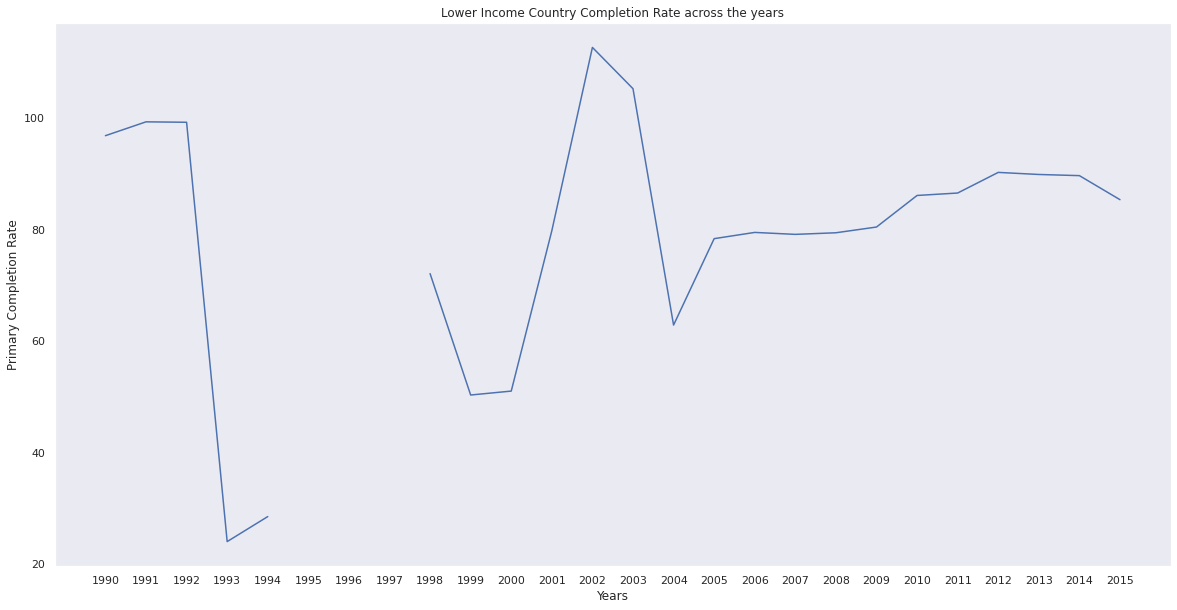

In [170]:
# Indicator 2: Completion Rate
completion_df = low_mid_income_df[low_mid_income_df['Indicator Name']=='Primary completion rate, both sexes (%)']
low_income_prim2 =  completion_df[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'Primary Completion Rate'})

print(f'Region: {region} Countries: {countries}')
# Lower Middle Primary Completion Rate
low_income_prim2
x_label=low_income_prim2['Years']                
y_label=low_income_prim2['Primary Completion Rate']
plt.plot(x_label,y_label)
plt.title('Lower Income Country Completion Rate across the years')
plt.ylabel('Primary Completion Rate')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (20, 8) 
plt.grid()

Region: ['South Asia'] Countries: ['Bhutan', 'India', 'Pakistan', 'Sri Lanka']


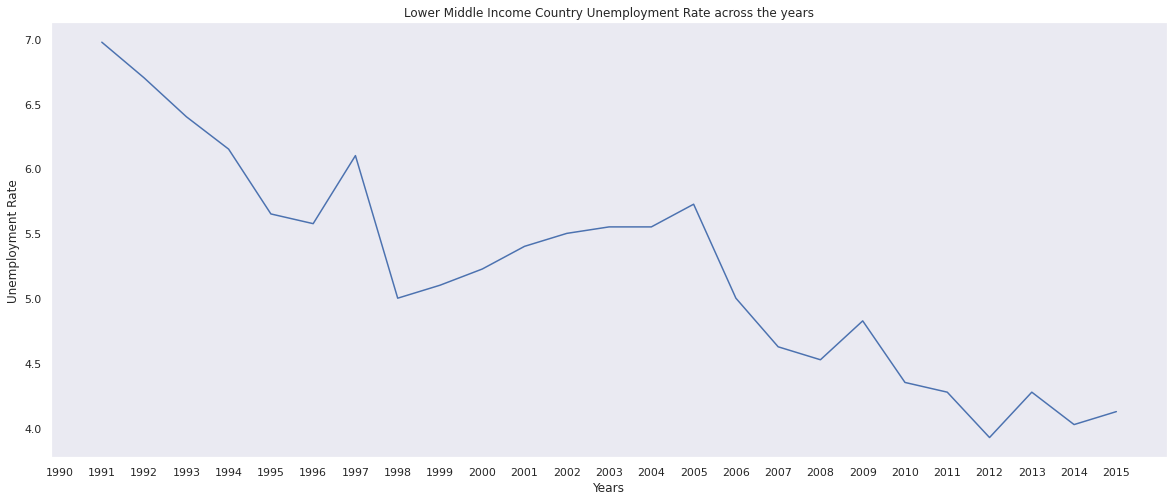

In [171]:
# Indicator 3: Unemployment
unemployed_df = low_mid_income_df[low_mid_income_df['Indicator Name']=='Unemployment, total (% of total labor force)']
Uneducated_unemployed = low_mid_income_df[low_mid_income_df['Indicator Name']=='Share of youth not in education, employment, or training, total (% of youth population)']

low_income_unem2 =  unemployed_df[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'Unemployment Rate'})

print(f'Region: {region} Countries: {countries}')
low_income_unem2
x_label=low_income_unem2['Years']                
y_label=low_income_unem2['Unemployment Rate']
plt.plot(x_label,y_label)
plt.title('Lower Middle Income Country Unemployment Rate across the years')
plt.ylabel('Unemployment Rate')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (20, 8) 
plt.grid()

In [172]:
pp2 = unemployed_df.sort_values('2010', ascending=False).reset_index()
pp2

index Country Name Country Code  \
0  169443     Pakistan          PAK   
1  202371    Sri Lanka          LKA   
2  104137        India          IND   
3   33159       Bhutan          BTN   

                                 Indicator Name  Indicator Code  1990  1991  \
0  Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   5.8   
1  Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN  14.7   
2  Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   4.1   
3  Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   3.3   

   1992  1993  1994  ...  2009  2010  2011  2012  2013  2014  2015  \
0   5.2   4.3   4.3  ...   5.5   5.6   6.0   6.0   6.2   5.6   5.9   
1  14.2  13.7  13.0  ...   5.9   4.9   4.2   4.0   4.4   4.4   4.7   
2   4.1   4.3   3.7  ...   3.9   3.6   3.7   3.7   3.6   3.5   3.5   
3   3.3   3.3   3.6  ...   4.0   3.3   3.2   2.0   2.9   2.6   2.4   

        Currency Unit      Region         Income Group  
0     Pakistani rupee  South Asia  Lower middle income  
1    Sri Lankan rupee  South Asia  Lower middle income  
2        Indian rupee  South Asia  Lower middle income  
3  Bhutanese ngultrum  South Asia  Lower middle income  

[4 rows x 34 columns]

In [173]:
# Indicator 4: GDP per capita and Expenditure
expenditure_low = low_mid_income_df[low_mid_income_df['Indicator Name']=='Government expenditure on education as % of GDP (%)']
low_mid_capita_df = low_mid_income_df[low_mid_income_df['Indicator Name']=='GDP per capita (constant 2005 US$)']
low_mid_gdp_df = low_mid_income_df[low_mid_income_df['Indicator Name']=='GDP, PPP (constant 2011 international $)']
GNI_per_capita_low = low_mid_income_df[low_mid_income_df['Indicator Name']=='GNI per capita, PPP (current international $)']


Region: ['South Asia'] Countries: ['Bhutan', 'India', 'Pakistan', 'Sri Lanka']


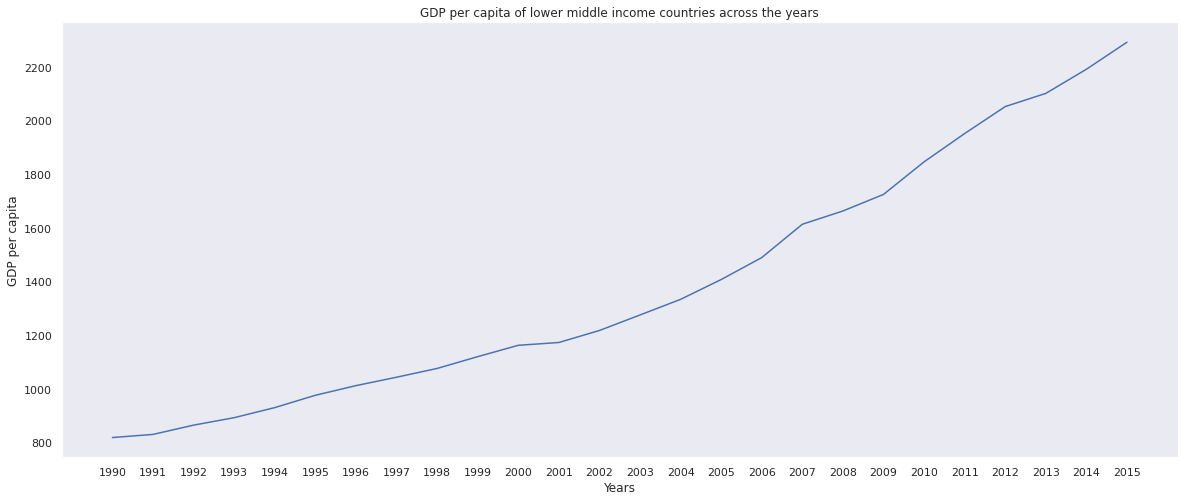

In [174]:
low_mid_gdp_ppp =  low_mid_gdp_df[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'GDP PPP'})

low_mid_gdp =  low_mid_capita_df[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'GDP per capita'})

print(f'Region: {region} Countries: {countries}')

low_mid_gdp
x_label=low_mid_gdp['Years']                
y_label=low_mid_gdp['GDP per capita']
plt.plot(x_label,y_label)
plt.title('GDP per capita of lower middle income countries across the years')
plt.ylabel('GDP per capita')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (20, 10) 
plt.grid()

Region: ['South Asia'] Countries: ['Bhutan', 'India', 'Pakistan', 'Sri Lanka']


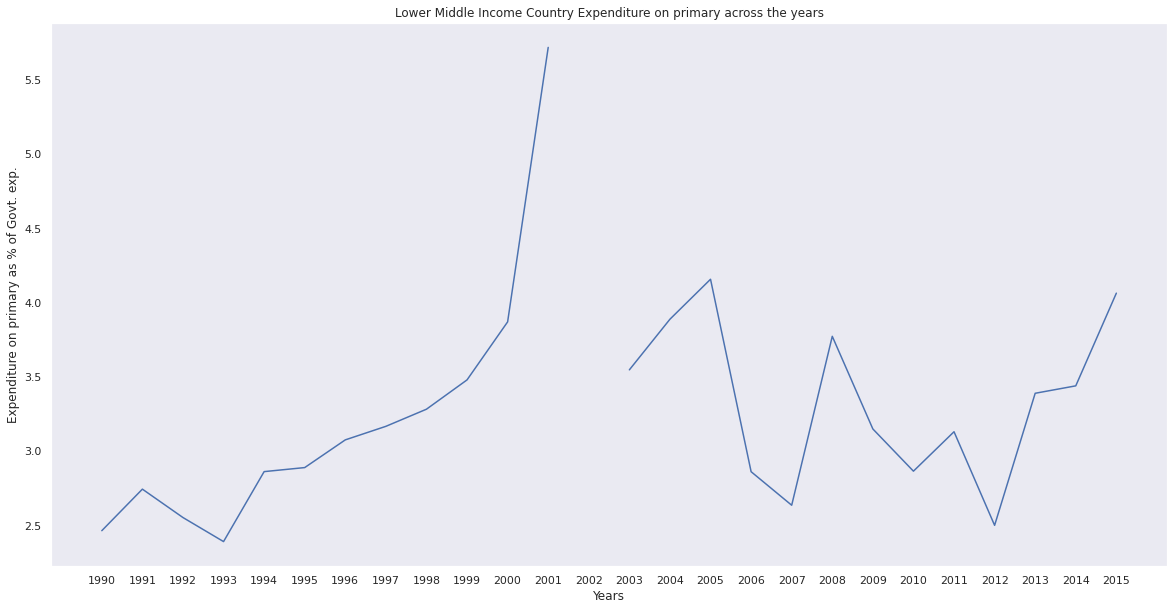

In [175]:
low_income_expenditure2 =  expenditure_low[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'Expenditure on primary'})

print(f'Region: {region} Countries: {countries}')
low_income_expenditure2
x_label=low_income_expenditure2['Years']                
y_label=low_income_expenditure2['Expenditure on primary']
plt.plot(x_label,y_label)
plt.title('Lower Middle Income Country Expenditure on primary across the years')
plt.ylabel('Expenditure on primary as % of Govt. exp.')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (20, 8) 
plt.grid()

Region: ['South Asia'] Countries: ['Bhutan', 'India', 'Pakistan', 'Sri Lanka']


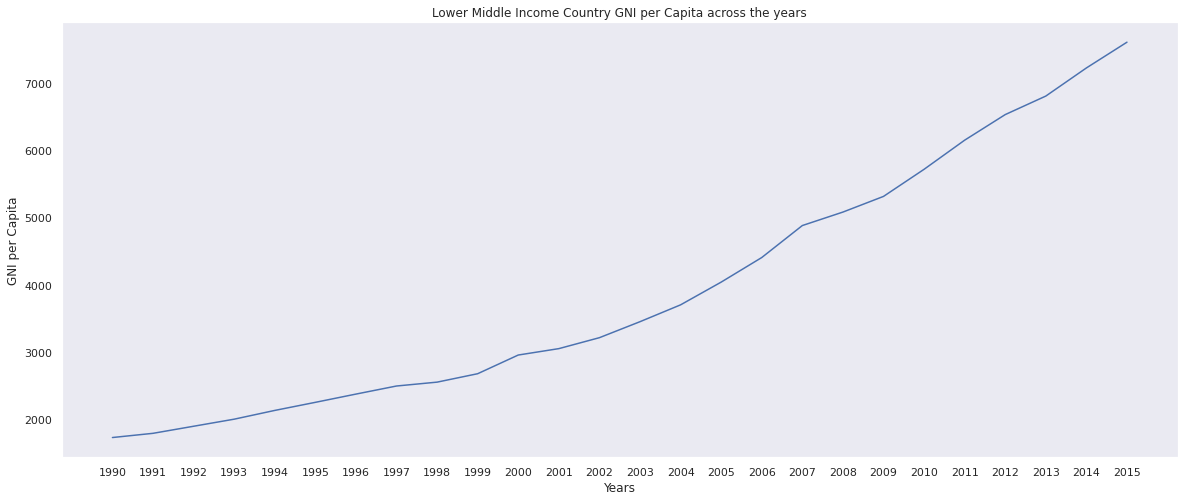

In [176]:
low_income_GNI_per_capita2 =  GNI_per_capita_low[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'GNI per Capita'})

print(f'Region: {region} Countries: {countries}')
low_income_GNI_per_capita2 
x_label=low_income_GNI_per_capita2['Years']                
y_label=low_income_GNI_per_capita2['GNI per Capita']
plt.plot(x_label,y_label)
plt.title('Lower Middle Income Country GNI per Capita across the years')
plt.ylabel('GNI per Capita')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (20, 8) 
plt.grid()

Region: ['South Asia'] Countries: ['Bhutan', 'India', 'Pakistan', 'Sri Lanka']


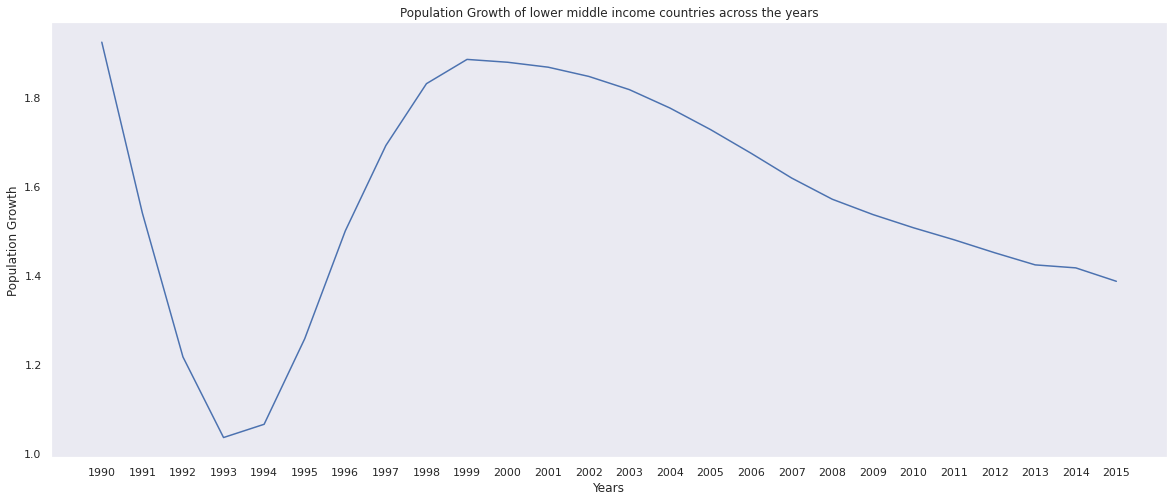

In [177]:
# Indicator 5: Population Growth    
low_mid_df = low_mid_income_df[low_mid_income_df['Indicator Name']=='Population growth (annual %)']
low_mid_pop_gro =  low_mid_df[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'Population Growth'})

print(f'Region: {region} Countries: {countries}')

low_mid_pop_gro
x_label=low_mid_pop_gro['Years']                
y_label=low_mid_pop_gro['Population Growth']
plt.plot(x_label,y_label)
plt.title('Population Growth of lower middle income countries across the years')
plt.ylabel('Population Growth')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (20, 10) 
plt.grid()

Region: ['South Asia'] Countries: ['Bhutan', 'India', 'Pakistan', 'Sri Lanka']


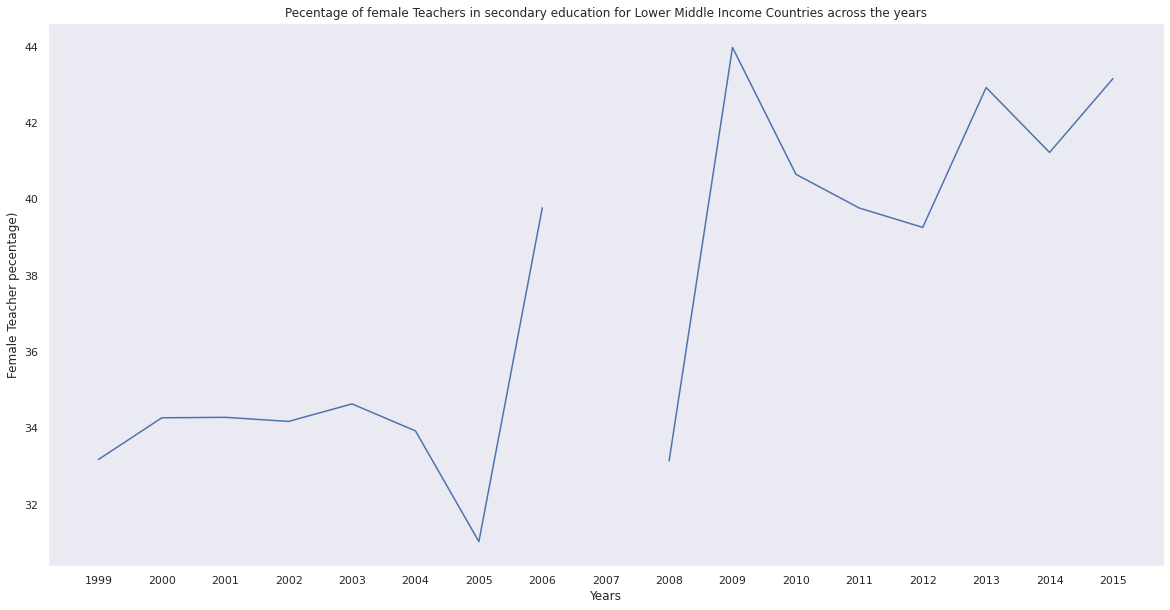

In [178]:
# Indicator 6: Teachers percentage
female_teachers2 = low_mid_income_df[low_mid_income_df['Indicator Name']=='Percentage of teachers in secondary education who are female (%)']
female_teachers_mean2 =  female_teachers2[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'Female Teachers in secondary education'})

print(f'Region: {region} Countries: {countries}')
female_teachers_mean2
x_label=female_teachers_mean2['Years']                
y_label=female_teachers_mean2[['Female Teachers in secondary education']]
plt.plot(x_label,y_label)
plt.title('Pecentage of female Teachers in secondary education for Lower Middle Income Countries across the years')
plt.ylabel('Female Teacher pecentage)')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (20, 8)
plt.grid()

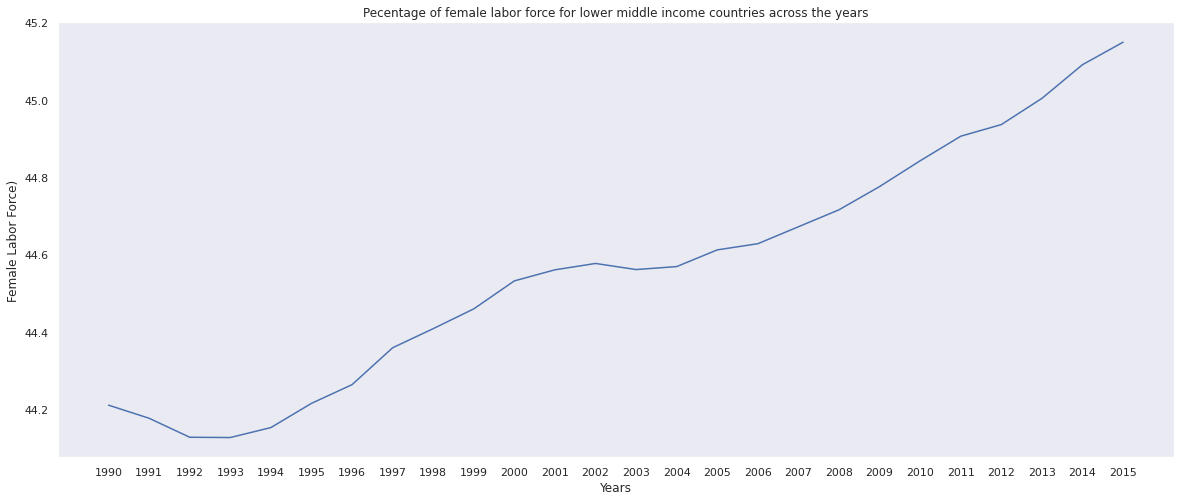

In [179]:
# Indicator 8- Female labor as a % of total labor force
female_labor = low_mid_income_df[low_mid_income_df['Indicator Name']=='Labor force, female (% of total labor force)']
female_labor_mean2 =  female_labor[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'Female labor force'})

female_labor_mean2
x_label=female_labor_mean['Years']                
y_label=female_labor_mean[['Female labor force']]
plt.plot(x_label,y_label)
plt.title('Pecentage of female labor force for lower middle income countries across the years')
plt.ylabel('Female Labor Force)')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (20, 8)
plt.grid()

East Asia & Pacific', 'Sub-Saharan Africa',
       'Europe & Central Asia', 'Latin America & Caribbean', 'South Asia',
       'Middle East & North Africa'

In [180]:
female_sorted = female_labor.sort_values('2010', ascending=False).reset_index()
south = female_sorted[female_sorted['Region']=='Middle East & North Africa']
south[['Country Name','2010']]

Empty DataFrame
Columns: [Country Name, 2010]
Index: []

## Comparison 1: Female labour force vs GDP

In [181]:
labor_gdp_merge = pd.merge(low_mid_gdp, female_labor_mean2, how='left', on='Years')
labor_gdp_merge

Years  GDP per capita  Female labor force
0   1990      818.526339           28.917170
1   1991      830.141496           28.501538
2   1992      864.756347           28.166424
3   1993      892.502648           28.313119
4   1994      930.076257           28.583075
5   1995      976.016398           27.980712
6   1996     1011.911830           28.203647
7   1997     1043.300783           28.501373
8   1998     1076.025688           29.548616
9   1999     1119.952680           29.171969
10  2000     1162.297075           29.432326
11  2001     1172.759226           29.667097
12  2002     1217.514339           29.916555
13  2003     1275.317584           30.264136
14  2004     1333.559585           30.584779
15  2005     1407.406722           30.964409
16  2006     1489.245978           31.073279
17  2007     1613.495658           30.968007
18  2008     1663.008692           30.898467
19  2009     1724.673808           30.928699
20  2010     1846.086241           30.293871
21  2011     1951.616389           30.186344
22  2012     2052.120610           30.446263
23  2013     2101.302717           29.943743
24  2014     2191.242297           29.701581
25  2015     2292.161541           30.110616

Region: ['South Asia'] Countries: ['Bhutan', 'India', 'Pakistan', 'Sri Lanka']


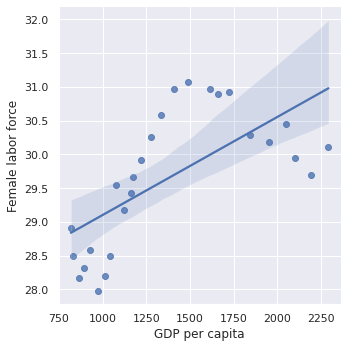

In [182]:
print(f'Region: {region} Countries: {countries}')
sb.lmplot(x = 'GDP per capita', y = 'Female labor force', data = labor_gdp_merge)

## Comparison 2:  Enrolment rate vs GDP per capita growth over 25 years in low income countries

Region: ['South Asia'] Countries: ['Bhutan', 'India', 'Pakistan', 'Sri Lanka']


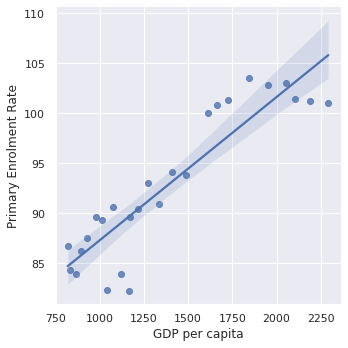

In [183]:
gdp_enrol_merge2 = pd.merge(low_inc_prim2, low_mid_gdp, how='left', on='Years')
gdp_enrol_merge2
print(f'Region: {region} Countries: {countries}')
sb.lmplot(x = 'GDP per capita', y = 'Primary Enrolment Rate', data = gdp_enrol_merge2)

## Comparison 3: (GDP PPP vs Expenditure for 25 years)

Region: ['South Asia'] Countries: ['Bhutan', 'India', 'Pakistan', 'Sri Lanka']


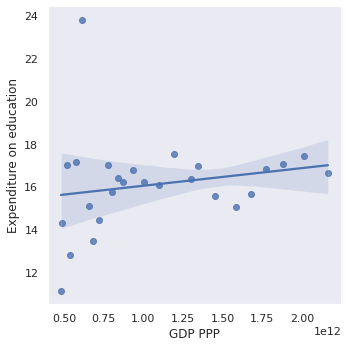

In [184]:
merge_exp_GDP = pd.merge(low_mid_gdp_ppp ,low_income_expenditure1, how='left', on='Years')
merge_exp_GDP
print(f'Region: {region} Countries: {countries}')
sb.lmplot(x = 'GDP PPP', y = 'Expenditure on education', data = merge_exp_GDP)
 
plt.grid()

In [185]:
# Case 3 : Upper Middle Income Countries
print('Upper Middle Income Countries:') 
print(up_mid_income_df['Country Name'].unique())
print('\n')
print('No. of Countries:')
print(len(up_mid_income_df['Country Name'].unique()))
print('\n')
print('Regions with Upper Middle Income Countries')
print(up_mid_income_df['Region'].unique())
region_count = up_mid_income_df.groupby('Region')['Country Name'].unique().reset_index()
region_count


Upper Middle Income Countries:
['Albania' 'Algeria' 'American Samoa' 'Angola' 'Argentina' 'Azerbaijan'
 'Belarus' 'Belize' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Bulgaria' 'China' 'Colombia' 'Costa Rica' 'Cuba' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Fiji' 'Gabon' 'Grenada' 'Hungary'
 'Iran, Islamic Rep.' 'Iraq' 'Jamaica' 'Jordan' 'Kazakhstan' 'Lebanon'
 'Libya' 'Macedonia, FYR' 'Malaysia' 'Maldives' 'Marshall Islands'
 'Mauritius' 'Mexico' 'Montenegro' 'Namibia' 'Palau' 'Panama' 'Peru'
 'Romania' 'Serbia' 'Seychelles' 'South Africa' 'St. Lucia'
 'St. Vincent and the Grenadines' 'Suriname' 'Thailand' 'Tonga' 'Tunisia'
 'Turkey' 'Turkmenistan' 'Tuvalu' 'Venezuela, RB']


No. of Countries:
55


Regions with Upper Middle Income Countries
['Europe & Central Asia' 'Middle East & North Africa'
 'East Asia & Pacific' 'Sub-Saharan Africa' 'Latin America & Caribbean'
 'South Asia']


Region  \
0         East Asia & Pacific   
1       Europe & Central Asia   
2   Latin America & Caribbean   
3  Middle East & North Africa   
4                  South Asia   
5          Sub-Saharan Africa   

                                        Country Name  
0  [American Samoa, China, Fiji, Malaysia, Marsha...  
1  [Albania, Azerbaijan, Belarus, Bosnia and Herz...  
2  [Argentina, Belize, Brazil, Colombia, Costa Ri...  
3  [Algeria, Iran, Islamic Rep., Iraq, Jordan, Le...  
4                                         [Maldives]  
5  [Angola, Botswana, Gabon, Mauritius, Namibia, ...

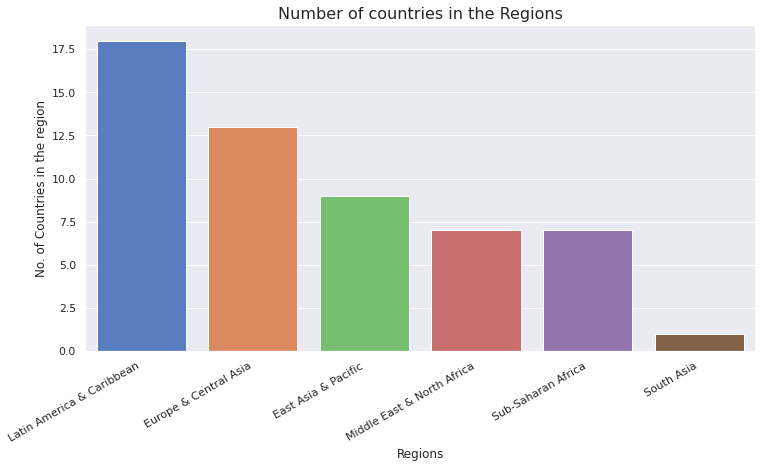

In [186]:
up_mid_income_df = merged_df_final[merged_df_final['Income Group']=='Upper middle income']
country_count = up_mid_income_df.groupby('Region')['Country Name'].nunique().reset_index().rename(columns={'Country Name':'No. of Countries'}).sort_values('No. of Countries', ascending=False)
country_count

sb.set_theme()
fig, ax = plt.subplots(figsize=(12,6))
colors = sb.color_palette("muted")
ax = sb.barplot(x="Region", y="No. of Countries", data=country_count, palette=colors)
ax.set(xlabel='Regions',ylabel='No. of Countries in the region')
ax.set_title('Number of countries in the Regions', fontsize = 16)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

In [187]:
# Region wise GNI per capita with no. of countries
up_mid_income_df = merged_df_final[merged_df_final['Income Group']=='Upper middle income']
GNI_per_capita_up_mid = up_mid_income_df[up_mid_income_df['Indicator Name']=='GNI per capita, PPP (current international $)']
fig = px.histogram(GNI_per_capita_up_mid, x='2010', color='Region')
fig.show()

In [188]:
up_mid_income_df = merged_df_final[merged_df_final['Income Group']=='Upper middle income']
up_mid_income_df = up_mid_income_df[up_mid_income_df['Region']=='Europe & Central Asia']
region = list(up_mid_income_df['Region'].unique())
countries = list(up_mid_income_df['Country Name'].unique())


In [189]:
# Essential Indicators
enrolment_indicator3 = [elem0 for elem0 in up_mid_income_df['Indicator Name'].unique() if 'enrolment' in elem0] # Done
completion_indicator3 = [elem1 for elem1 in up_mid_income_df['Indicator Name'].unique() if 'completion' in elem1] # Done 
Unemployment_indicator3 = [elem2 for elem2 in up_mid_income_df['Indicator Name'].unique() if 'Unemployment' in elem2]  # Done 
GNI_indicator3 = [elem3 for elem3 in up_mid_income_df['Indicator Name'].unique() if 'GNI' in elem3]  # Done 
expenditure_indicator3 = [elem4 for elem4 in up_mid_income_df['Indicator Name'].unique() if 'expenditure' in elem4]    # Done


Region: ['Europe & Central Asia'] Countries: ['Albania', 'Azerbaijan', 'Belarus', 'Bosnia and Herzegovina', 'Bulgaria', 'Hungary', 'Kazakhstan', 'Macedonia, FYR', 'Montenegro', 'Romania', 'Serbia', 'Turkey', 'Turkmenistan']


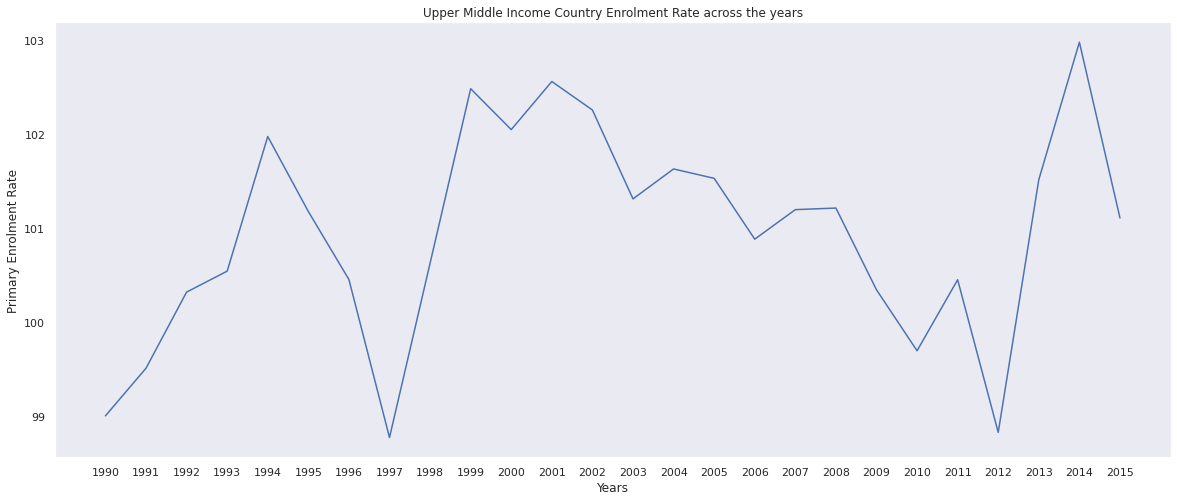

In [190]:
# Indicator 1: Enrolement Rate    
primary_df = up_mid_income_df[up_mid_income_df['Indicator Name']=='Gross enrolment ratio, primary, both sexes (%)']
up_mid_inc_prim3 =  primary_df[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'Primary Enrolment Rate'})

print(f'Region: {region} Countries: {countries}')
# Upper Middle Income Countries Primary Enrolment Rate
up_mid_inc_prim3
x_label=up_mid_inc_prim3['Years']                
y_label=up_mid_inc_prim3['Primary Enrolment Rate']
plt.plot(x_label,y_label)
plt.title('Upper Middle Income Country Enrolment Rate across the years')
plt.ylabel('Primary Enrolment Rate')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (20, 10) 
plt.grid()

In [191]:
primary_df.sort_values('2010',ascending=False).reset_index()

index    Country Name Country Code  \
0   117311      Kazakhstan          KAZ   
1   152489      Montenegro          MNE   
2    39317        Bulgaria          BGR   
3    26450         Belarus          BLR   
4   100871         Hungary          HUN   
5   223502          Turkey          TUR   
6    10119         Albania          ALB   
7   181733         Romania          ROU   
8   190845          Serbia          SRB   
9    20640      Azerbaijan          AZE   
10  135779  Macedonia, FYR          MKD   

                                    Indicator Name Indicator Code        1990  \
0   Gross enrolment ratio, primary, both sexes (%)    SE.PRM.ENRR  114.500648   
1   Gross enrolment ratio, primary, both sexes (%)    SE.PRM.ENRR         NaN   
2   Gross enrolment ratio, primary, both sexes (%)    SE.PRM.ENRR   95.058189   
3   Gross enrolment ratio, primary, both sexes (%)    SE.PRM.ENRR   93.272461   
4   Gross enrolment ratio, primary, both sexes (%)    SE.PRM.ENRR   85.307068   
5   Gross enrolment ratio, primary, both sexes (%)    SE.PRM.ENRR  104.214409   
6   Gross enrolment ratio, primary, both sexes (%)    SE.PRM.ENRR   99.821472   
7   Gross enrolment ratio, primary, both sexes (%)    SE.PRM.ENRR   89.705482   
8   Gross enrolment ratio, primary, both sexes (%)    SE.PRM.ENRR         NaN   
9   Gross enrolment ratio, primary, both sexes (%)    SE.PRM.ENRR  110.121559   
10  Gross enrolment ratio, primary, both sexes (%)    SE.PRM.ENRR         NaN   

          1991        1992        1993        1994  ...        2009  \
0   118.045433  121.889107  123.768028  122.439949  ...  107.213470   
1          NaN         NaN         NaN         NaN  ...  112.513588   
2    93.968079   93.988533   94.882538   95.973282  ...  102.926018   
3    95.116982   94.746971   96.495270   96.639252  ...  105.076683   
4    89.425926   95.107536  100.187958  105.676712  ...  102.193359   
5   103.943359  103.771591  101.123993   98.692513  ...  100.408737   
6   101.630791   99.968781   98.947861  101.989578  ...   97.525330   
7    84.870590   84.888130   86.103432   89.146446  ...   97.651337   
8          NaN         NaN         NaN         NaN  ...   97.685799   
9   109.057961  108.183510  107.709290  110.455566  ...   95.068573   
10         NaN         NaN   95.654030   96.763077  ...   85.508476   

          2010        2011        2012        2013        2014        2015  \
0   107.597260  108.571487  109.169182  110.658508  111.348770  110.563683   
1   106.776482   95.408386   95.278542         NaN         NaN   94.306717   
2   103.633171  101.500511  100.128937   99.374390   99.079033   97.218178   
3   103.449913  101.212372   98.976143   97.802406   98.966278  101.341621   
4   102.082603  101.107597  100.300247  100.073212  101.511749  101.616150   
5   101.551804  101.225304   98.606621  106.863968  105.825363  102.489670   
6    99.013313  101.815742  104.784393  107.784561  112.486641  113.699799   
7    97.264214   96.591881   95.540520         NaN         NaN   89.783058   
8    95.895760  101.493446  100.571312  100.895538  101.131157  101.342918   
9    93.762299   95.573631   97.955307  100.500450  106.059891  106.601486   
10   85.598907         NaN   85.757217   89.693909   90.408302   93.218498   

        Currency Unit                 Region         Income Group  
0        Kazakh tenge  Europe & Central Asia  Upper middle income  
1                Euro  Europe & Central Asia  Upper middle income  
2       Bulgarian lev  Europe & Central Asia  Upper middle income  
3    Belarusian rubel  Europe & Central Asia  Upper middle income  
4    Hungarian forint  Europe & Central Asia  Upper middle income  
5    New Turkish lira  Europe & Central Asia  Upper middle income  
6        Albanian lek  Europe & Central Asia  Upper middle income  
7    New Romanian leu  Europe & Central Asia  Upper middle income  
8   New Serbian dinar  Europe & Central Asia  Upper middle income  
9     New Azeri manat  Europe & Central Asia 

Region: ['Europe & Central Asia'] Countries: ['Albania', 'Azerbaijan', 'Belarus', 'Bosnia and Herzegovina', 'Bulgaria', 'Hungary', 'Kazakhstan', 'Macedonia, FYR', 'Montenegro', 'Romania', 'Serbia', 'Turkey', 'Turkmenistan']


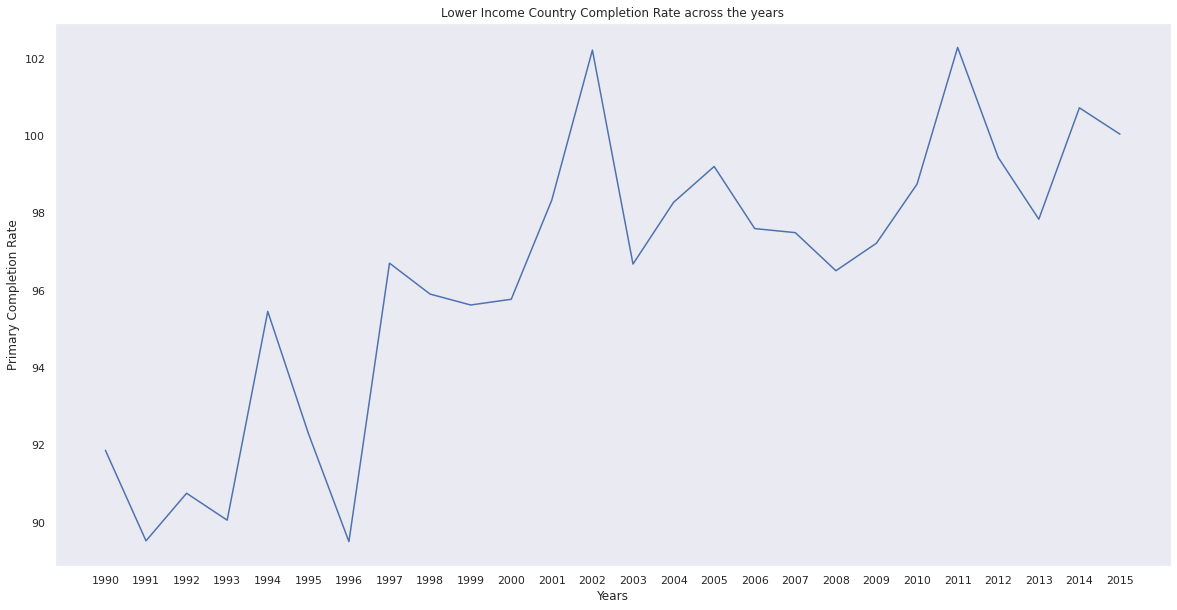

In [192]:
# Indicator 2: Completion Rate
completion_df = up_mid_income_df[up_mid_income_df['Indicator Name']=='Primary completion rate, both sexes (%)']
low_income_prim3 =  completion_df[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'Primary Completion Rate'})

print(f'Region: {region} Countries: {countries}')
# Upper Middle Primary Completion Rate
low_income_prim3
x_label=low_income_prim3['Years']                
y_label=low_income_prim3['Primary Completion Rate']
plt.plot(x_label,y_label)
plt.title('Lower Income Country Completion Rate across the years')
plt.ylabel('Primary Completion Rate')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (20, 8) 
plt.grid()


Region: ['Europe & Central Asia'] Countries: ['Albania', 'Azerbaijan', 'Belarus', 'Bosnia and Herzegovina', 'Bulgaria', 'Hungary', 'Kazakhstan', 'Macedonia, FYR', 'Montenegro', 'Romania', 'Serbia', 'Turkey', 'Turkmenistan']


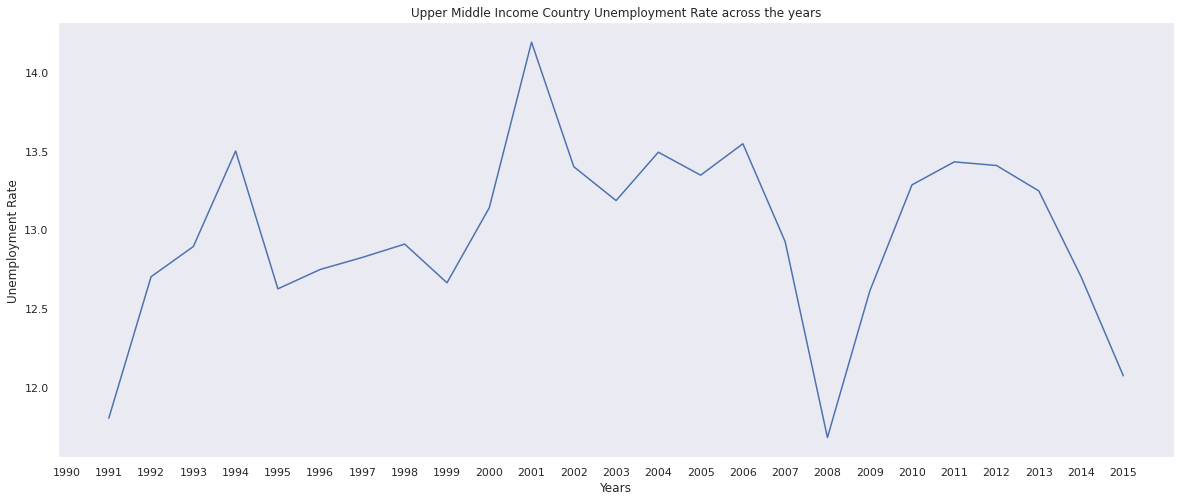

In [193]:
# Indicator 3: Unemployment
unemployed_df = up_mid_income_df[up_mid_income_df['Indicator Name']=='Unemployment, total (% of total labor force)']
Uneducated_unemployed = up_mid_income_df[up_mid_income_df['Indicator Name']=='Share of youth not in education, employment, or training, total (% of youth population)']

low_income_unem3 =  unemployed_df[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'Unemployment Rate'})

print(f'Region: {region} Countries: {countries}')
low_income_unem3
x_label=low_income_unem3['Years']                
y_label=low_income_unem3['Unemployment Rate']
plt.plot(x_label,y_label)
plt.title('Upper Middle Income Country Unemployment Rate across the years')
plt.ylabel('Unemployment Rate')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (20, 8) 
plt.grid()

In [194]:
unemployed_df.sort_values('2010', ascending=False).reset_index()

index            Country Name Country Code  \
0   136319          Macedonia, FYR          MKD   
1    35304  Bosnia and Herzegovina          BIH   
2   152647              Montenegro          MNE   
3   191423                  Serbia          SRB   
4    10651                 Albania          ALB   
5   101480                 Hungary          HUN   
6   224153                  Turkey          TUR   
7    39993                Bulgaria          BGR   
8   224726            Turkmenistan          TKM   
9   182409                 Romania          ROU   
10  117834              Kazakhstan          KAZ   
11   21337              Azerbaijan          AZE   
12   27022                 Belarus          BLR   

                                  Indicator Name  Indicator Code  1990  \
0   Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
1   Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
2   Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
3   Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
4   Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
5   Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
6   Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
7   Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
8   Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
9   Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
10  Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
11  Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
12  Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   

         1991       1992       1993       1994  ...       2009       2010  \
0   30.600000  30.500000  30.200001  31.299999  ...  32.200001  32.000000   
1   17.600000  20.799999  19.400000  19.700001  ...  24.100000  27.200001   
2   19.299999  19.299999  19.400000  19.400000  ...  19.100000  19.700001   
3   13.800000  16.100000  18.600000  21.299999  ...  16.100000  19.200001   
4   12.700000  13.600000  15.000000  14.800000  ...  13.800000  14.200000   
5   10.100000   9.900000  12.100000  10.800000  ...  10.000000  11.200000   
6    8.200000   8.500000   9.000000   8.600000  ...  12.600000  10.700000   
7   18.299999  13.800000  21.400000  20.000000  ...   6.800000  10.300000   
8    8.900000   8.900000   8.800000   8.700000  ...   9.100000   9.100000   
9    5.600000   6.600000   7.400000   8.200000  ...   6.900000   7.000000   
10   3.100000  11.800000   1.100000   7.500000  ...   6.600000   5.800000   
11   4.600000   4.700000   4.600000   4.600000  ...   5.700000   5.600000   
12   0.600000   0.600000   0.600000   0.600000  ...   0.900000   0.700000   

         2011  2012  2013  2014       2015  \
0   31.400000  31.0  29.0  28.0  26.100000   
1   27.600000  28.1  27.4  27.5  26.299999   
2   19.700001  19.6  19.5  18.0  17.500000   
3   23.000000  23.9  22.1  18.9  17.700001   
4   14.000000  13.4  15.6  17.5  17.100000   
5   11.000000  11.0  10.2   7.7   6.800000   
6    8.800000   8.1   8.7   9.9  10.200000   
7   11.300000  12.3  12.9  11.4   9.100000   
8    9.100000   9.0   9.0   8.9   8.800000   
9    7.200000   6.8   7.1   6.8   6.800000   
10   5.400000   5.3   5.2   5.1   5.000000   
11   5.400000   5.2   5.0   4.9   5.000000   
12   0.700000   0.6   0.5   0.5   0.500000   

                              Currency Unit                 Region  \
0                          Macedonian denar  Europe & Central Asia   
1   Bosnia and Herzegovina convertible mark  Europe & Central Asia   
2                                      Euro  Europe & Central Asia   
3                         New Serbian dinar  Europe & Central Asia   
4                              Albanian lek  Europe & Central Asia   
5                          Hungarian forint  Europe & Central Asia   
6                          New Turkish 

In [195]:
# Indicator 4: GDP PPP, GDP per capita and Expenditure
expenditure_low = up_mid_income_df[up_mid_income_df['Indicator Name']=='Government expenditure on education as % of GDP (%)']
up_mid_df = up_mid_income_df[up_mid_income_df['Indicator Name']=='GDP per capita (constant 2005 US$)']
up_mid_gdp_df = up_mid_income_df[up_mid_income_df['Indicator Name']=='GDP, PPP (constant 2011 international $)']
GNI_per_capita_low = up_mid_income_df[up_mid_income_df['Indicator Name']=='GNI per capita, PPP (current international $)']


Region: ['Europe & Central Asia'] Countries: ['Albania', 'Azerbaijan', 'Belarus', 'Bosnia and Herzegovina', 'Bulgaria', 'Hungary', 'Kazakhstan', 'Macedonia, FYR', 'Montenegro', 'Romania', 'Serbia', 'Turkey', 'Turkmenistan']


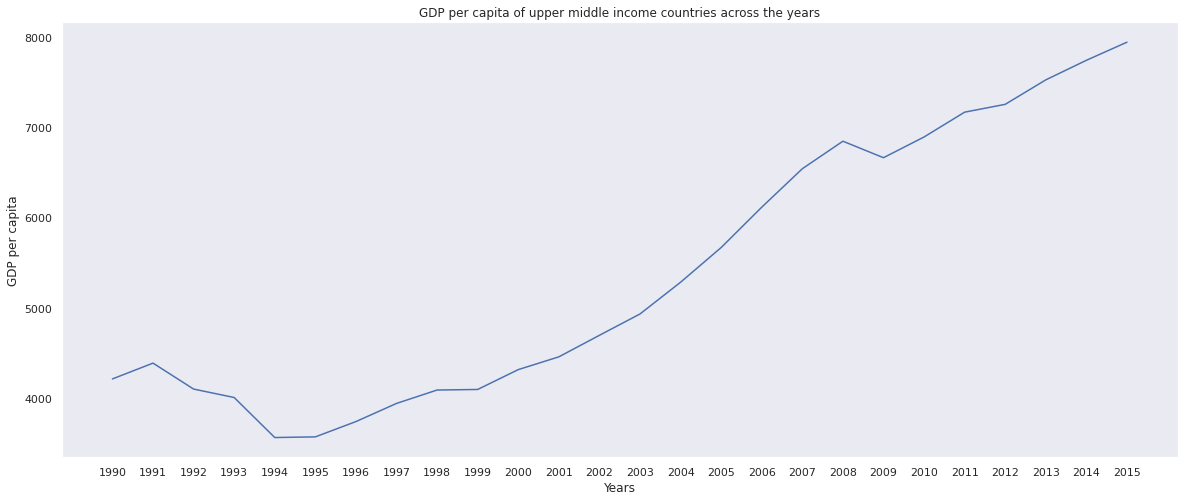

In [196]:
up_mid_gdp_ppp =  low_mid_gdp_df[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'GDP PPP'})

up_mid_gdp =  up_mid_df[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'GDP per capita'})

print(f'Region: {region} Countries: {countries}')

up_mid_gdp
x_label=up_mid_gdp['Years']                
y_label=up_mid_gdp['GDP per capita']
plt.plot(x_label,y_label)
plt.title('GDP per capita of upper middle income countries across the years')
plt.ylabel('GDP per capita')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (20, 10) 
plt.grid()

Region: ['Europe & Central Asia'] Countries: ['Albania', 'Azerbaijan', 'Belarus', 'Bosnia and Herzegovina', 'Bulgaria', 'Hungary', 'Kazakhstan', 'Macedonia, FYR', 'Montenegro', 'Romania', 'Serbia', 'Turkey', 'Turkmenistan']


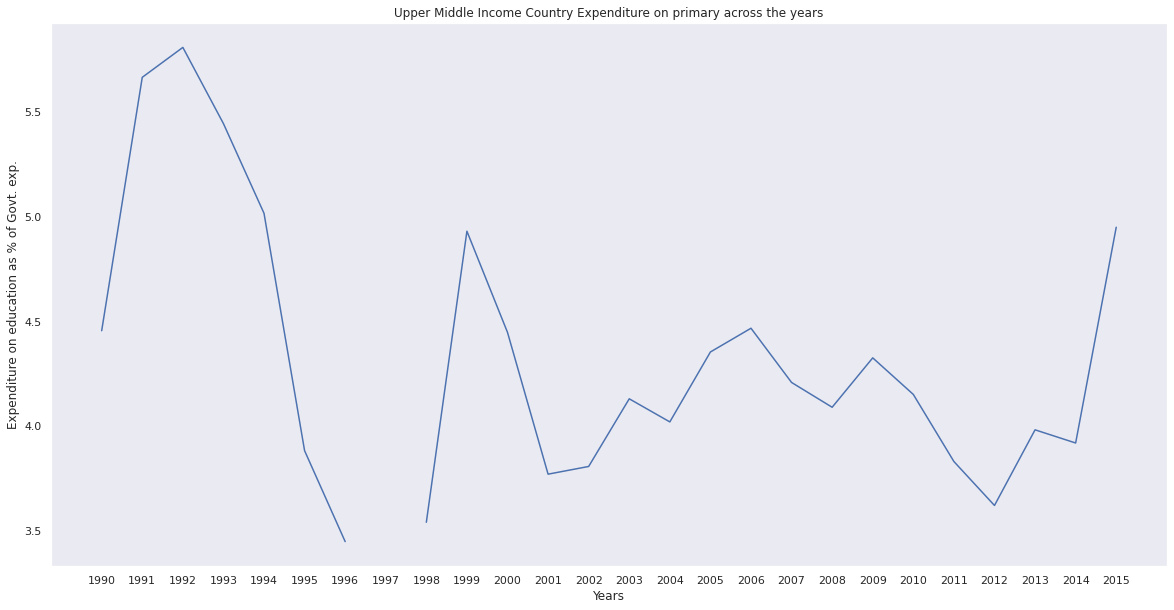

In [197]:
up_mid_income_expenditure3 =  expenditure_low[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'Expenditure on education'})

print(f'Region: {region} Countries: {countries}')
up_mid_income_expenditure3
x_label=up_mid_income_expenditure3['Years']                
y_label=up_mid_income_expenditure3['Expenditure on education']
plt.plot(x_label,y_label)
plt.title('Upper Middle Income Country Expenditure on primary across the years')
plt.ylabel('Expenditure on education as % of Govt. exp.')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (20, 8) 
plt.grid()

Region: ['Europe & Central Asia'] Countries: ['Albania', 'Azerbaijan', 'Belarus', 'Bosnia and Herzegovina', 'Bulgaria', 'Hungary', 'Kazakhstan', 'Macedonia, FYR', 'Montenegro', 'Romania', 'Serbia', 'Turkey', 'Turkmenistan']


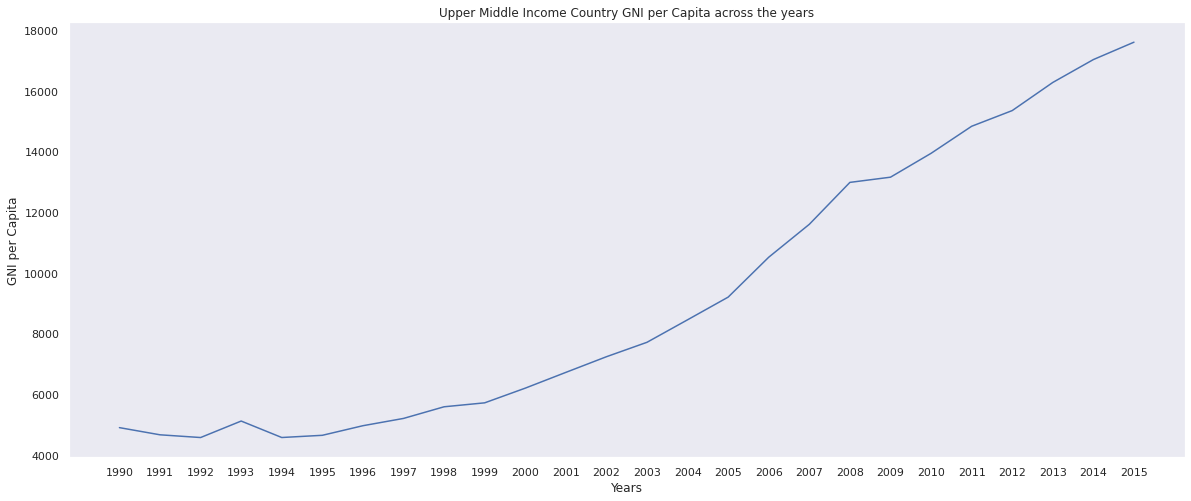

In [198]:
low_income_GNI_per_capita3 =  GNI_per_capita_low[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'GNI per Capita'})

print(f'Region: {region} Countries: {countries}')
low_income_GNI_per_capita3
x_label=low_income_GNI_per_capita3['Years']                
y_label=low_income_GNI_per_capita3['GNI per Capita']
plt.plot(x_label,y_label)
plt.title('Upper Middle Income Country GNI per Capita across the years')
plt.ylabel('GNI per Capita')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (20, 8) 
plt.grid()

Region: ['Europe & Central Asia'] Countries: ['Albania', 'Azerbaijan', 'Belarus', 'Bosnia and Herzegovina', 'Bulgaria', 'Hungary', 'Kazakhstan', 'Macedonia, FYR', 'Montenegro', 'Romania', 'Serbia', 'Turkey', 'Turkmenistan']


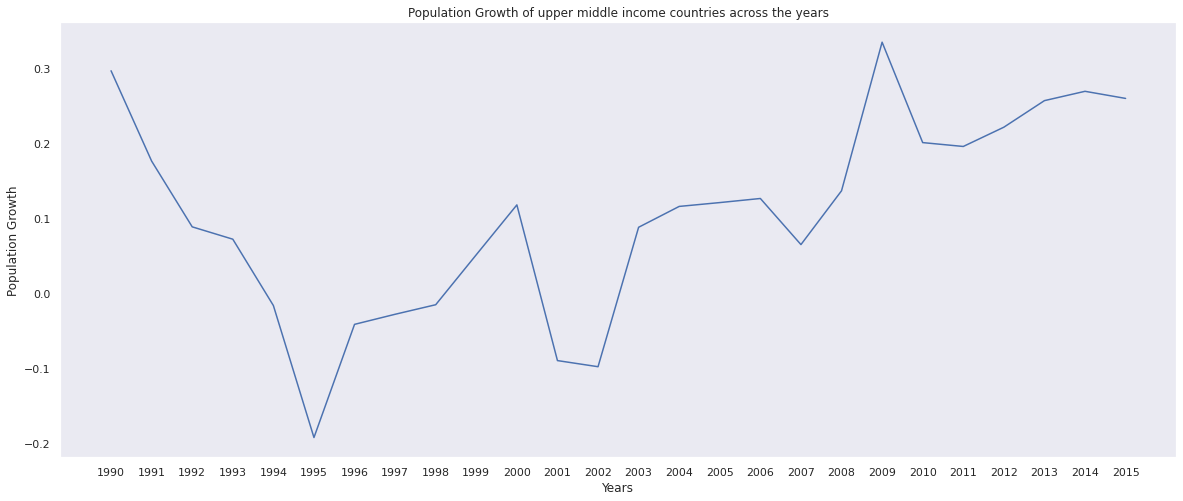

In [199]:
# Indicator 5: Population Growth    
up_mid_df = up_mid_income_df[up_mid_income_df['Indicator Name']=='Population growth (annual %)']
up_mid_pop_gro =  up_mid_df[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'Population Growth'})

print(f'Region: {region} Countries: {countries}')
up_mid_pop_gro
x_label=up_mid_pop_gro['Years']                
y_label=up_mid_pop_gro['Population Growth']
plt.plot(x_label,y_label)
plt.title('Population Growth of upper middle income countries across the years')
plt.ylabel('Population Growth')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (20, 10) 
plt.grid()

Region: ['Europe & Central Asia'] Countries: ['Albania', 'Azerbaijan', 'Belarus', 'Bosnia and Herzegovina', 'Bulgaria', 'Hungary', 'Kazakhstan', 'Macedonia, FYR', 'Montenegro', 'Romania', 'Serbia', 'Turkey', 'Turkmenistan']


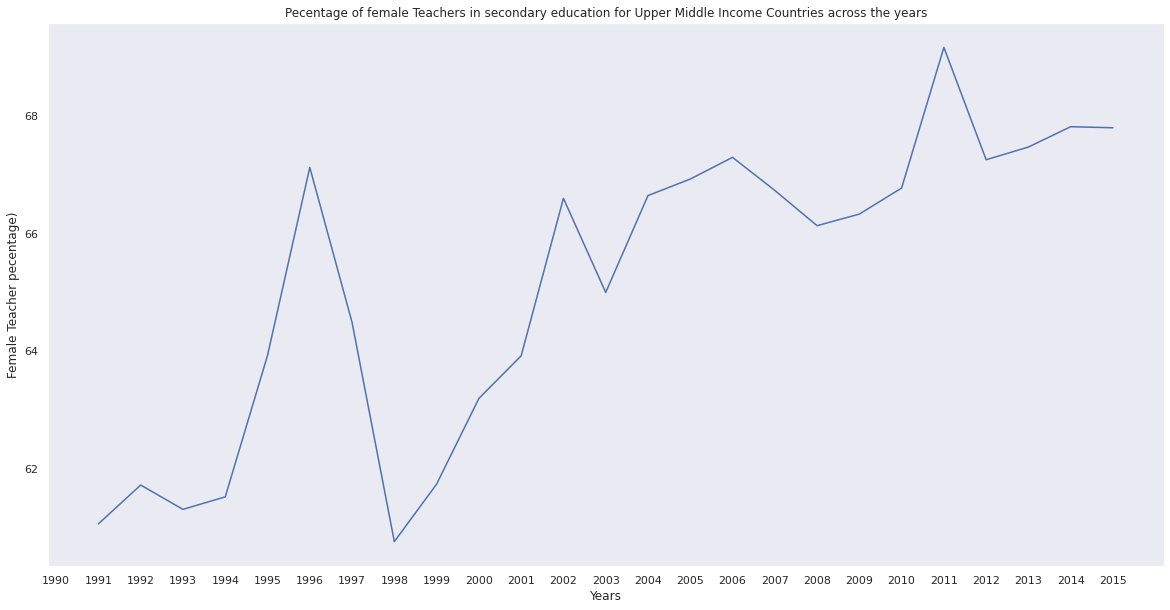

In [200]:
# Indicator 6: Teachers percentage
female_teachers3 = up_mid_income_df[up_mid_income_df['Indicator Name']=='Percentage of teachers in secondary education who are female (%)']
female_teachers_mean3 =  female_teachers3[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'Female Teachers in secondary education'})

print(f'Region: {region} Countries: {countries}')
female_teachers_mean3
x_label=female_teachers_mean3['Years']                
y_label=female_teachers_mean3[['Female Teachers in secondary education']]
plt.plot(x_label,y_label)
plt.title('Pecentage of female Teachers in secondary education for Upper Middle Income Countries across the years')
plt.ylabel('Female Teacher pecentage)')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (20, 8)
plt.grid()

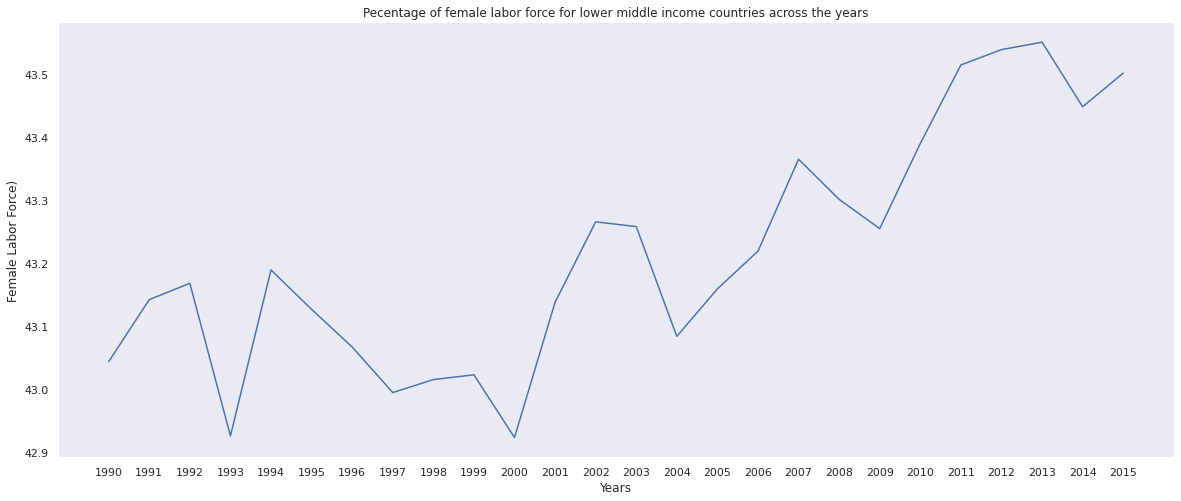

In [201]:
# Indicator 7- Female labor as a % of total labor force
female_labor = up_mid_income_df[up_mid_income_df['Indicator Name']=='Labor force, female (% of total labor force)']
female_labor_mean3 =  female_labor[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'Female labor force'})

female_labor_mean3
x_label=female_labor_mean3['Years']                
y_label=female_labor_mean3[['Female labor force']]
plt.plot(x_label,y_label)
plt.title('Pecentage of female labor force for lower middle income countries across the years')
plt.ylabel('Female Labor Force)')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (20, 8)
plt.grid()

In [202]:
female_labor.sort_values('2010', ascending=False).reset_index()

index            Country Name Country Code  \
0    26486                 Belarus          BLR   
1    20678              Azerbaijan          AZE   
2   117349              Kazakhstan          KAZ   
3    39359                Bulgaria          BGR   
4   100913                 Hungary          HUN   
5   152511              Montenegro          MNE   
6   181775                 Romania          ROU   
7   190895                  Serbia          SRB   
8    10153                 Albania          ALB   
9   224484            Turkmenistan          TKM   
10   34882  Bosnia and Herzegovina          BIH   
11  135818          Macedonia, FYR          MKD   
12  223548                  Turkey          TUR   

                                  Indicator Name     Indicator Code  \
0   Labor force, female (% of total labor force)  SL.TLF.TOTL.FE.ZS   
1   Labor force, female (% of total labor force)  SL.TLF.TOTL.FE.ZS   
2   Labor force, female (% of total labor force)  SL.TLF.TOTL.FE.ZS   
3   Labor force, female (% of total labor force)  SL.TLF.TOTL.FE.ZS   
4   Labor force, female (% of total labor force)  SL.TLF.TOTL.FE.ZS   
5   Labor force, female (% of total labor force)  SL.TLF.TOTL.FE.ZS   
6   Labor force, female (% of total labor force)  SL.TLF.TOTL.FE.ZS   
7   Labor force, female (% of total labor force)  SL.TLF.TOTL.FE.ZS   
8   Labor force, female (% of total labor force)  SL.TLF.TOTL.FE.ZS   
9   Labor force, female (% of total labor force)  SL.TLF.TOTL.FE.ZS   
10  Labor force, female (% of total labor force)  SL.TLF.TOTL.FE.ZS   
11  Labor force, female (% of total labor force)  SL.TLF.TOTL.FE.ZS   
12  Labor force, female (% of total labor force)  SL.TLF.TOTL.FE.ZS   

         1990       1991       1992       1993       1994  ...       2009  \
0   48.355362  48.365719  48.312156  48.276031  48.259289  ...  49.626055   
1   44.808610  44.821012  44.982103  45.329378  45.772391  ...  49.939944   
2   48.238333  48.123000  48.090381  48.062819  48.065541  ...  48.945752   
3   48.114215  48.230292  48.348049  48.204458  48.015690  ...  45.788208   
4   45.496062  45.435494  45.450508  45.258753  44.857319  ...  45.585989   
5   42.544862  42.402170  42.364520  42.381675  42.424896  ...  44.056850   
6   46.577591  46.443620  46.399258  46.410194  46.440882  ...  44.307773   
7   42.729185  42.796830  42.852443  42.876779  42.889315  ...  43.812087   
8   40.845404  42.143704  42.907500  43.286871  43.654789  ...  41.570495   
9   41.772378  41.838288  41.951420  41.998099  42.103492  ...  42.384794   
10  40.412227  40.419175  40.419578  40.417902  40.421602  ...  39.593842   
11  38.976492  38.998185  39.023206  39.056476  39.038996  ...  38.576637   
12  30.701140  30.834721  30.089709  26.480132  29.521488  ...  28.130624   

         2010       2011       2012       2013       2014       2015  \
0   49.645865  49.674508  49.679957  49.671163  49.660016  49.652599   
1   49.454125  48.964690  48.954250  48.885249  48.942314  49.022192   
2   48.882759  48.860984  48.833191  48.800151  48.685161  48.567418   
3   46.198386  46.504538  46.638962  46.653881  46.524262  46.521613   
4   46.146710  46.028115  46.203100  45.866374  45.853743  45.791071   
5   44.261320  44.544095  44.371711  44.443014  44.464532  44.509144   
6   43.802107  44.331901  44.106353  43.990184  43.924124  43.314665   
7   43.499856  43.258964  43.274968  43.500520  43.719978  43.730865   
8   42.426710  42.479465  42.568979  41.592607  41.100853  42.073479   
9   42.325367  42.257981  42.190389  42.121254  42.050082  41.988876   
10  39.538883  39.491934  39.422873  39.386884  39.332345  39.176446   
11  38.708848  39.407179  39.255423  40.038090  39.527733  39.432388   
12  29.185628  29.893250  30.514162  31.218483  31.049929  31.748920   

                              Currency Unit                 Region  \
0                          Belarusian rubel  Europe & Central Asia   
1                           New Azeri manat  Europe & Central Asia 

## Comparison 1: Female labour force vs GDP

In [203]:
labor_gdp_merge = pd.merge(up_mid_gdp, female_labor_mean3, how='left', on='Years')
labor_gdp_merge

Years  GDP per capita  Female labor force
0   1990     4212.169344           43.043989
1   1991     4387.370412           43.142478
2   1992     4099.735711           43.168525
3   1993     4006.102928           42.926121
4   1994     3562.341477           43.189668
5   1995     3569.644756           43.127112
6   1996     3739.267490           43.067289
7   1997     3940.463331           42.994947
8   1998     4089.070879           43.015545
9   1999     4095.297213           43.023154
10  2000     4315.367695           42.923517
11  2001     4456.955332           43.138287
12  2002     4695.756060           43.266086
13  2003     4932.362646           43.258537
14  2004     5284.250337           43.084166
15  2005     5669.012849           43.159675
16  2006     6116.225521           43.219524
17  2007     6542.598287           43.365598
18  2008     6848.056441           43.301738
19  2009     6665.042044           43.255312
20  2010     6894.872429           43.390505
21  2011     7170.087986           43.515200
22  2012     7256.793005           43.539563
23  2013     7528.139765           43.551373
24  2014     7745.064110           43.448852
25  2015     7945.879299           43.502283

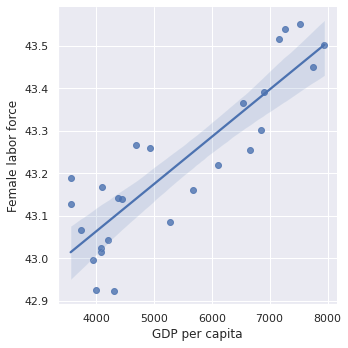

In [204]:
sb.lmplot(x = 'GDP per capita', y = 'Female labor force', data = labor_gdp_merge)

## Comparison 2:  Enrolment rate vs GDP per capita growth over 25 years in low income countries

Region: ['Europe & Central Asia'] Countries: ['Albania', 'Azerbaijan', 'Belarus', 'Bosnia and Herzegovina', 'Bulgaria', 'Hungary', 'Kazakhstan', 'Macedonia, FYR', 'Montenegro', 'Romania', 'Serbia', 'Turkey', 'Turkmenistan']


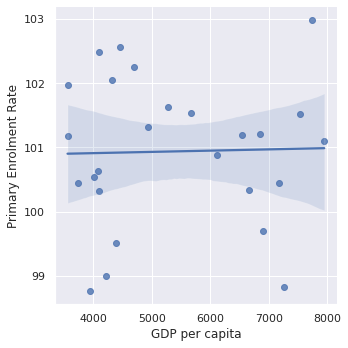

In [205]:
gdp_enrol_merge2 = pd.merge(up_mid_inc_prim3, up_mid_gdp, how='left', on='Years')
gdp_enrol_merge2
print(f'Region: {region} Countries: {countries}')
sb.lmplot(x = 'GDP per capita', y = 'Primary Enrolment Rate', data = gdp_enrol_merge2)

## Comparison 3: (GDP PPP vs Expenditure for 25 years)

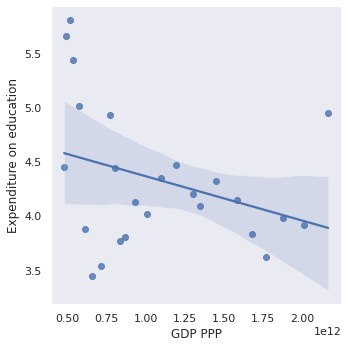

In [206]:
merge_exp_GDP = pd.merge(up_mid_gdp_ppp ,up_mid_income_expenditure3, how='left', on='Years')
merge_exp_GDP

sb.lmplot(x = 'GDP PPP', y = 'Expenditure on education', data = merge_exp_GDP)
 
plt.grid()

In [207]:
high_OECD_income_df['Country Name'].unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Chile',
       'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France',
       'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy',
       'Japan', 'Korea, Rep.', 'Luxembourg', 'Netherlands', 'New Zealand',
       'Norway', 'Poland', 'Portugal', 'Slovak Republic', 'Slovenia',
       'Spain', 'Sweden', 'Switzerland', 'United Kingdom',
       'United States'], dtype=object)

In [208]:
# Case 4 : High Income Countries

print('High Income Countries:') 
print(high_OECD_income_df['Country Name'].unique())
print('\n')
print('No. of Countries:')
print(len(high_OECD_income_df['Country Name'].unique()))
print('\n')
print('Regions with High Income Countries')
print(high_OECD_income_df['Region'].unique())
region_count = high_OECD_income_df.groupby('Region')['Country Name'].unique().reset_index()
region_count


High Income Countries:
['Australia' 'Austria' 'Belgium' 'Canada' 'Chile' 'Czech Republic'
 'Denmark' 'Estonia' 'Finland' 'France' 'Germany' 'Greece' 'Iceland'
 'Ireland' 'Israel' 'Italy' 'Japan' 'Korea, Rep.' 'Luxembourg'
 'Netherlands' 'New Zealand' 'Norway' 'Poland' 'Portugal'
 'Slovak Republic' 'Slovenia' 'Spain' 'Sweden' 'Switzerland'
 'United Kingdom' 'United States']


No. of Countries:
31


Regions with High Income Countries
['East Asia & Pacific' 'Europe & Central Asia' 'North America'
 'Latin America & Caribbean' 'Middle East & North Africa']


Region  \
0         East Asia & Pacific   
1       Europe & Central Asia   
2   Latin America & Caribbean   
3  Middle East & North Africa   
4               North America   

                                        Country Name  
0       [Australia, Japan, Korea, Rep., New Zealand]  
1  [Austria, Belgium, Czech Republic, Denmark, Es...  
2                                            [Chile]  
3                                           [Israel]  
4                            [Canada, United States]

In [209]:
high_OECD_income_df['Region'].unique()

array(['East Asia & Pacific', 'Europe & Central Asia', 'North America',
       'Latin America & Caribbean', 'Middle East & North Africa'],
      dtype=object)

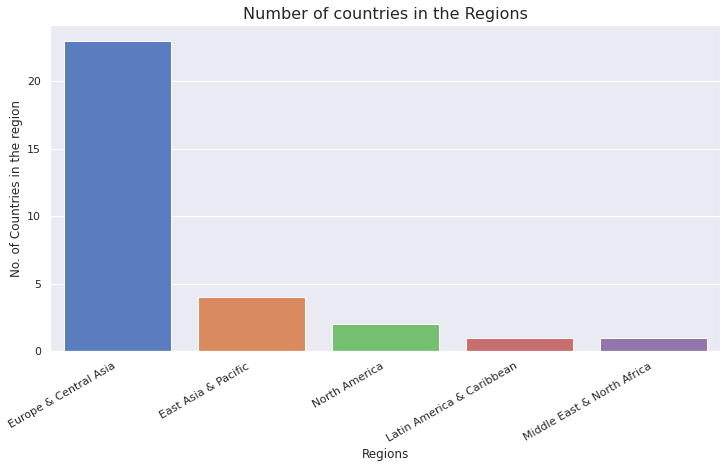

In [210]:
high_OECD_income_df = merged_df_final[merged_df_final['Income Group']=='High income: OECD']
country_count = high_OECD_income_df.groupby('Region')['Country Name'].nunique().reset_index().rename(columns={'Country Name':'No. of Countries'}).sort_values('No. of Countries', ascending=False)
country_count

sb.set_theme()
fig, ax = plt.subplots(figsize=(12,6))
colors = sb.color_palette("muted")
ax = sb.barplot(x="Region", y="No. of Countries", data=country_count, palette=colors)
ax.set(xlabel='Regions',ylabel='No. of Countries in the region')
ax.set_title('Number of countries in the Regions', fontsize = 16)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

In [211]:
# Region wise GNI per capita with no. of countries
high_OECD_income_df = merged_df_final[merged_df_final['Income Group']=='High income: OECD']
GNI_per_capita_high = high_OECD_income_df[high_OECD_income_df['Indicator Name']=='GNI per capita, PPP (current international $)']
fig = px.histogram(GNI_per_capita_high, x='2010', color='Region')
fig.show()

In [212]:
high_OECD_income_df = merged_df_final[merged_df_final['Income Group']=='High income: OECD']
high_OECD_income_df = high_OECD_income_df[high_OECD_income_df['Region']=='North America']
region = list(high_OECD_income_df['Region'].unique())
countries = list(high_OECD_income_df['Country Name'].unique())


In [213]:
# Essential Indicators
enrolment_indicator4 = [elem0 for elem0 in high_OECD_income_df['Indicator Name'].unique() if 'enrolment' in elem0] # Done
completion_indicator4 = [elem1 for elem1 in high_OECD_income_df['Indicator Name'].unique() if 'completion' in elem1] # Done 
Unemployment_indicator4 = [elem2 for elem2 in high_OECD_income_df['Indicator Name'].unique() if 'Unemployment' in elem2]  # Done 
GNI_indicator4 = [elem3 for elem3 in high_OECD_income_df['Indicator Name'].unique() if 'GNI' in elem3]  # Done 
expenditure_indicator4 = [elem4 for elem4 in high_OECD_income_df['Indicator Name'].unique() if 'expenditure' in elem4]    # Done


Region: ['North America'] Countries: ['Canada', 'United States']


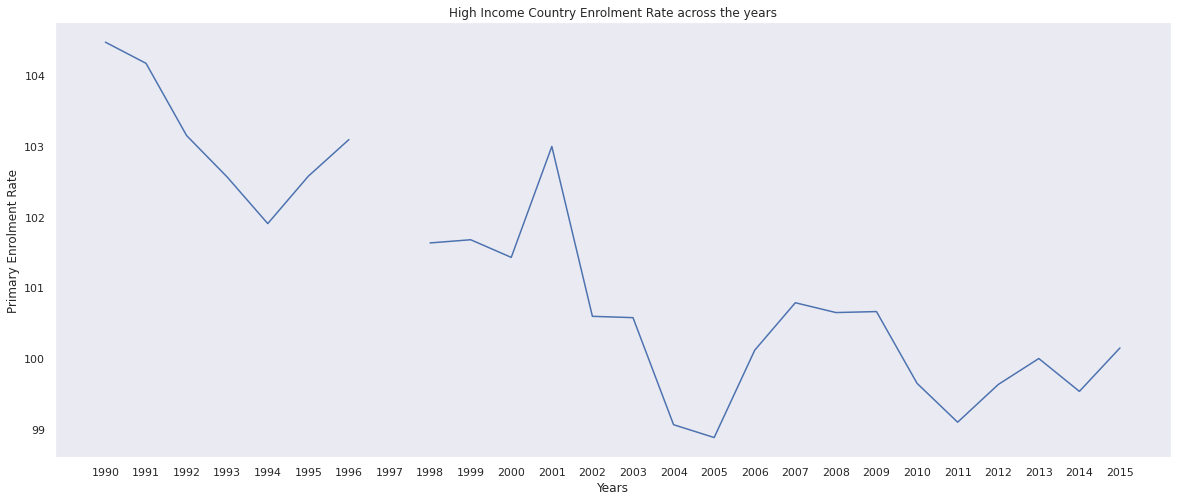

In [214]:


# Indicator 1: Enrolement Rate    
primary_df = high_OECD_income_df[high_OECD_income_df['Indicator Name']=='Gross enrolment ratio, primary, both sexes (%)']
high_inc_prim4 =  primary_df[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'Primary Enrolment Rate'})

print(f'Region: {region} Countries: {countries}')
# High Income Countries Primary Enrolment Rate
high_inc_prim4
x_label=high_inc_prim4['Years']                
y_label=high_inc_prim4['Primary Enrolment Rate']
plt.plot(x_label,y_label)
plt.title('High Income Country Enrolment Rate across the years')
plt.ylabel('Primary Enrolment Rate')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (20, 10) 
plt.grid()

In [215]:
primary_df.sort_values('2010', ascending=False).reset_index()

index   Country Name Country Code  \
0  231148  United States          USA   
1   47993         Canada          CAN   

                                   Indicator Name Indicator Code        1990  \
0  Gross enrolment ratio, primary, both sexes (%)    SE.PRM.ENRR  105.162117   
1  Gross enrolment ratio, primary, both sexes (%)    SE.PRM.ENRR  103.784622   

         1991        1992        1993        1994  ...        2009  \
0  104.417313         NaN  102.962227  102.444794  ...  102.335518   
1  103.931290  103.152283  102.168900  101.367958  ...   98.987038   

         2010       2011       2012        2013       2014        2015  \
0  100.601822  99.896477  99.564407   99.421768  99.532043  100.147041   
1   98.689598  98.295311  99.693771  100.572311        NaN         NaN   

     Currency Unit         Region       Income Group  
0      U.S. dollar  North America  High income: OECD  
1  Canadian dollar  North America  High income: OECD  

[2 rows x 34 columns]

Region: ['North America'] Countries: ['Canada', 'United States']


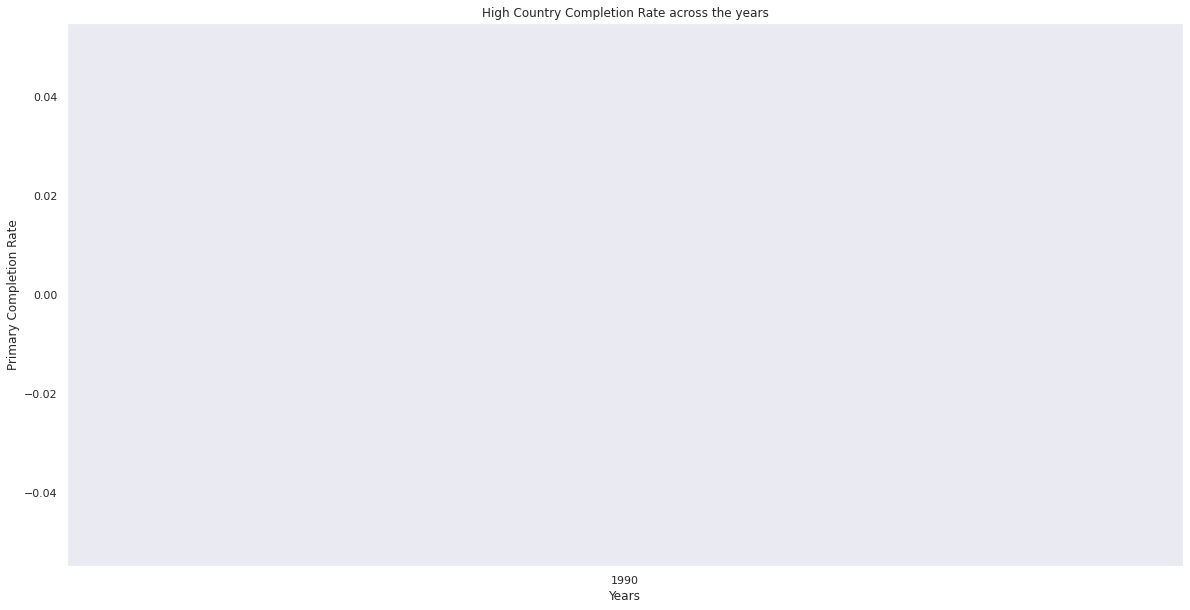

In [216]:


# Indicator 2: Completion Rate
completion_df = high_OECD_income_df[high_OECD_income_df['Indicator Name']=='Primary completion rate, both sexes (%)']
high_income_prim4 =  completion_df[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'Primary Completion Rate'})

print(f'Region: {region} Countries: {countries}')
# High Primary Completion Rate
high_income_prim4
x_label=high_income_prim4['Years']                
y_label=high_income_prim4['Primary Completion Rate']
plt.plot(x_label,y_label)
plt.title('High Country Completion Rate across the years')
plt.ylabel('Primary Completion Rate')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (20, 8) 
plt.grid()

Region: ['North America'] Countries: ['Canada', 'United States']


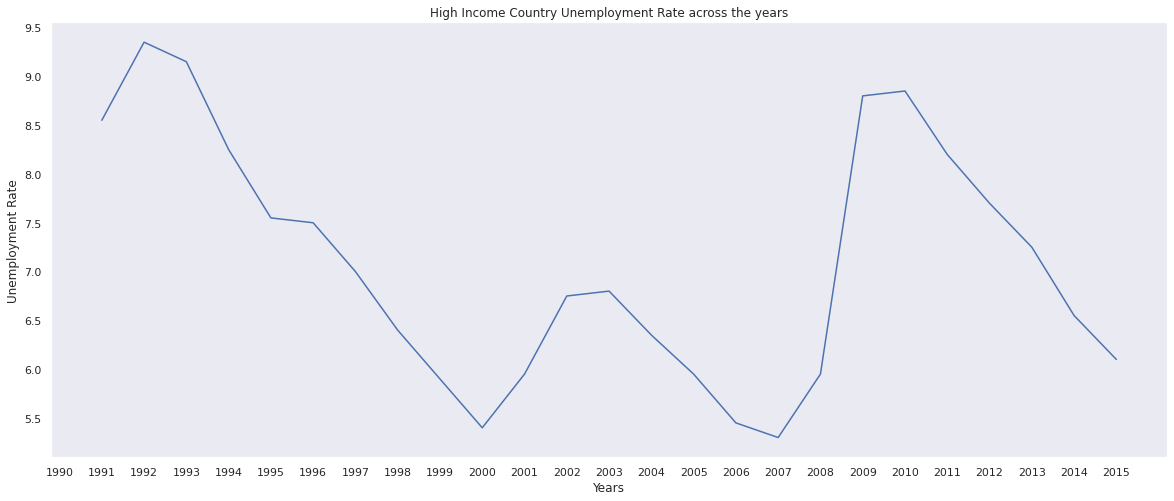

In [217]:

# Indicator 3: Unemployment
unemployed_df = high_OECD_income_df[high_OECD_income_df['Indicator Name']=='Unemployment, total (% of total labor force)']
Uneducated_unemployed = high_OECD_income_df[high_OECD_income_df['Indicator Name']=='Share of youth not in education, employment, or training, total (% of youth population)']

high_income_unem4 =  unemployed_df[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'Unemployment Rate'})

print(f'Region: {region} Countries: {countries}')
high_income_unem4
x_label=high_income_unem4['Years']                
y_label=high_income_unem4['Unemployment Rate']
plt.plot(x_label,y_label)
plt.title('High Income Country Unemployment Rate across the years')
plt.ylabel('Unemployment Rate')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (20, 8) 
plt.grid()

In [218]:
# Indicator 4: GDP per capita and Expenditure
expenditure_high = high_OECD_income_df[high_OECD_income_df['Indicator Name']=='Government expenditure on education as % of GDP (%)']
high_gdp_df = high_OECD_income_df[high_OECD_income_df['Indicator Name']=='GDP, PPP (constant 2011 international $)']
high_capita_df = high_OECD_income_df[high_OECD_income_df['Indicator Name']=='GDP per capita (constant 2005 US$)']
GNI_per_capita_low = high_OECD_income_df[high_OECD_income_df['Indicator Name']=='GNI per capita, PPP (current international $)']

Region: ['North America'] Countries: ['Canada', 'United States']


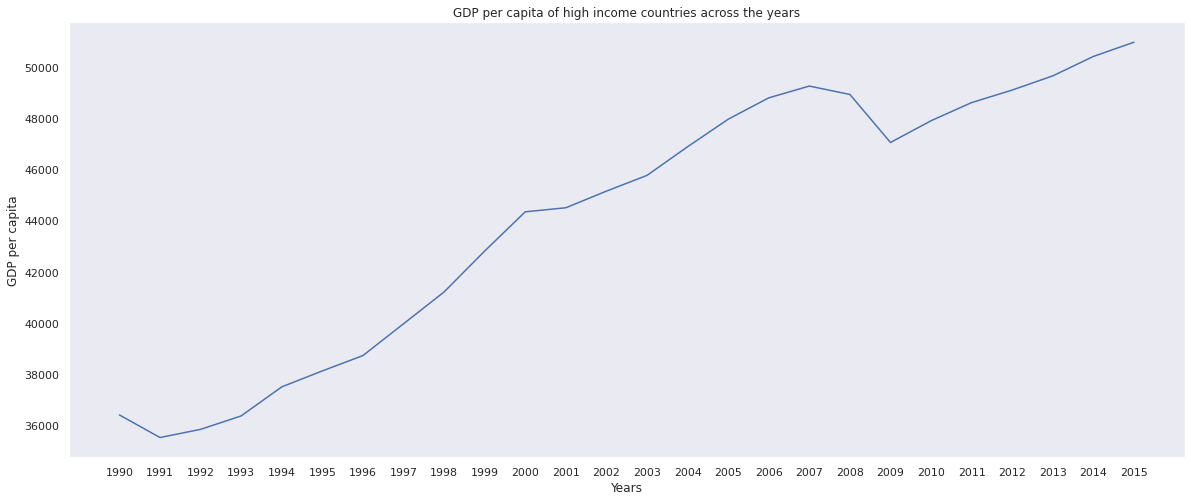

In [219]:
high_gdp_ppp =  high_gdp_df[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'GDP PPP'})

high_gdp_capita =  high_capita_df[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'GDP per capita'})

print(f'Region: {region} Countries: {countries}')

high_gdp_capita
x_label=high_gdp_capita['Years']                
y_label=high_gdp_capita['GDP per capita']
plt.plot(x_label,y_label)
plt.title('GDP per capita of high income countries across the years')
plt.ylabel('GDP per capita')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (20, 10) 
plt.grid()

Region: ['North America'] Countries: ['Canada', 'United States']


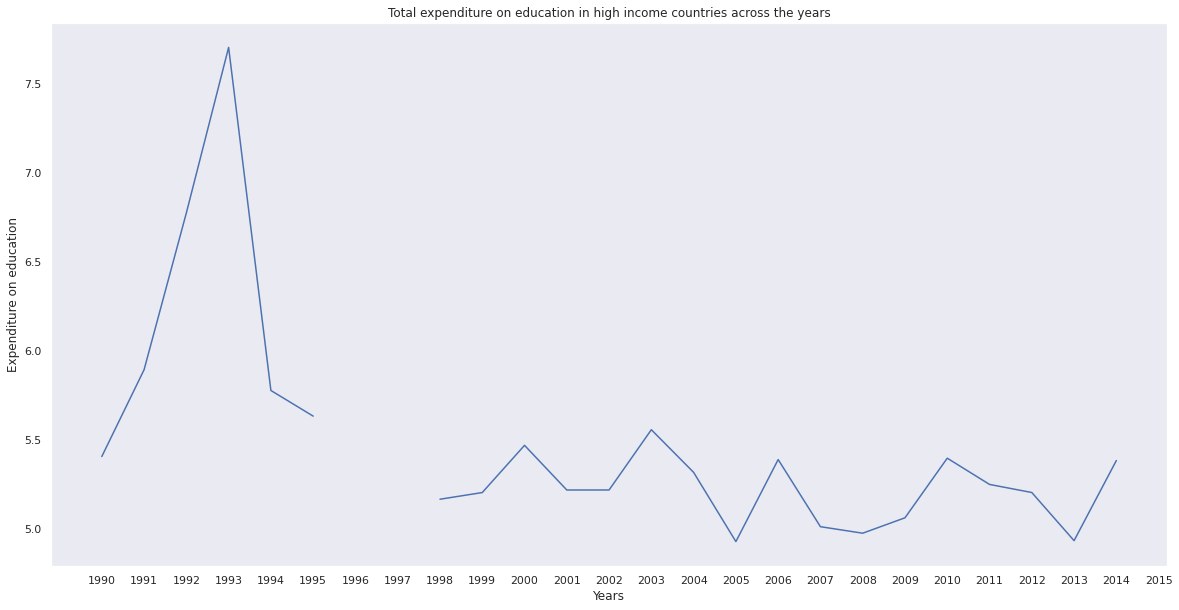

In [220]:
high_expenditure =  expenditure_high[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'Expenditure on education'})

print(f'Region: {region} Countries: {countries}')

high_expenditure
x_label=high_expenditure['Years']                
y_label=high_expenditure['Expenditure on education']
plt.plot(x_label,y_label)
plt.title('Total expenditure on education in high income countries across the years')
plt.ylabel('Expenditure on education')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (20, 10) 
plt.grid()

Region: ['North America'] Countries: ['Canada', 'United States']


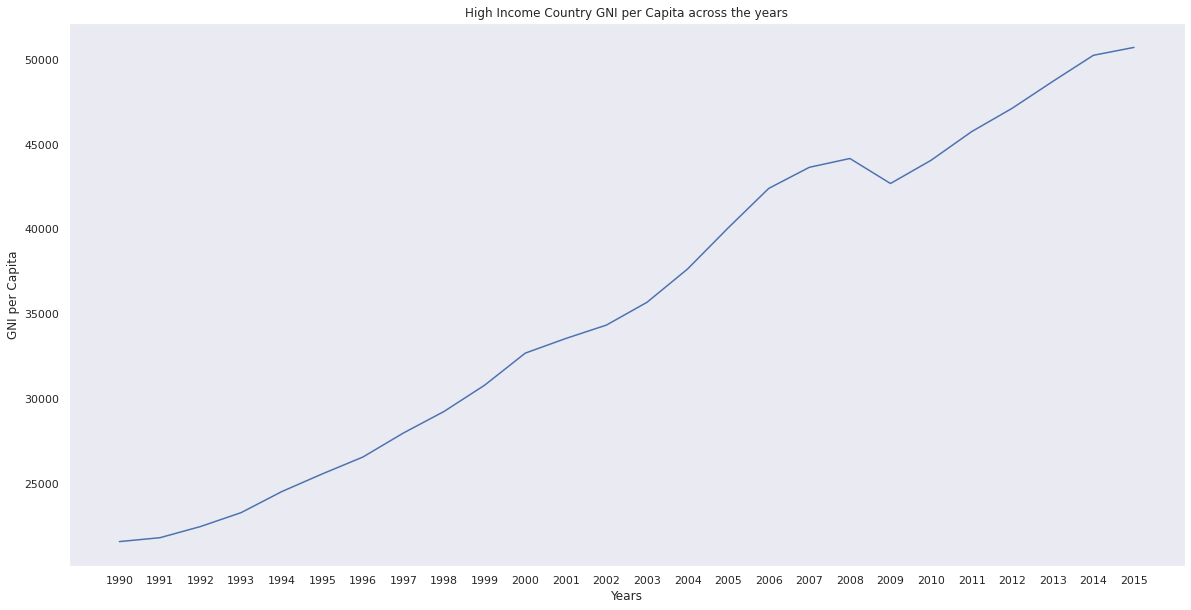

In [221]:
high_income_GNI_per_capita4 =  GNI_per_capita_low[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'GNI per Capita'})

print(f'Region: {region} Countries: {countries}')
high_income_GNI_per_capita4
x_label=high_income_GNI_per_capita4['Years']                
y_label=high_income_GNI_per_capita4['GNI per Capita']
plt.plot(x_label,y_label)
plt.title('High Income Country GNI per Capita across the years')
plt.ylabel('GNI per Capita')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (20, 8) 
plt.grid()

Region: ['North America'] Countries: ['Canada', 'United States']


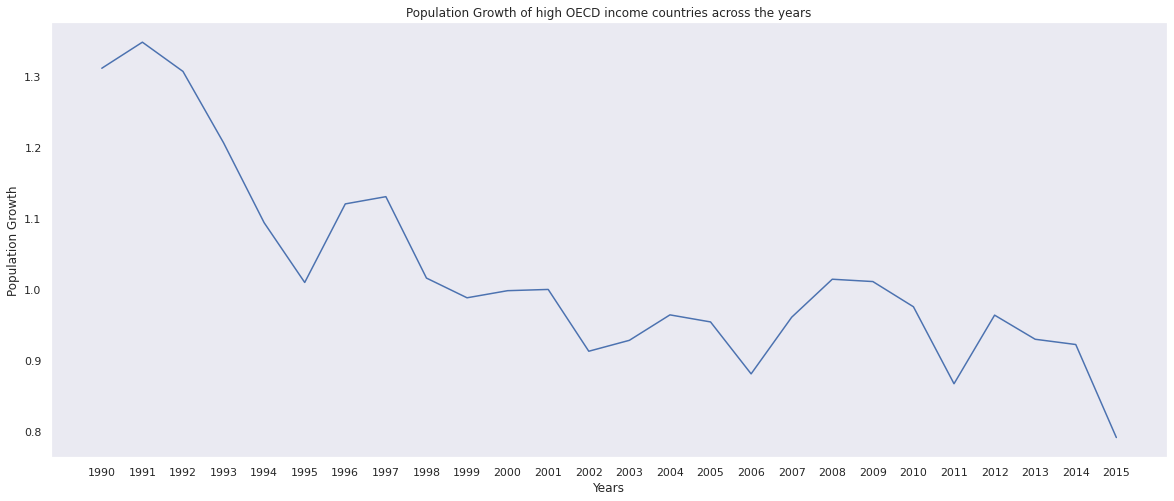

In [222]:
# Indicator 5: Population Growth    
high_df = high_OECD_income_df[high_OECD_income_df['Indicator Name']=='Population growth (annual %)']
high_pop_gro =  high_df[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'Population Growth'})

print(f'Region: {region} Countries: {countries}')
high_pop_gro
x_label=high_pop_gro['Years']                
y_label=high_pop_gro['Population Growth']
plt.plot(x_label,y_label)
plt.title('Population Growth of high OECD income countries across the years')
plt.ylabel('Population Growth')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (20, 10) 
plt.grid()

Region: ['North America'] Countries: ['Canada', 'United States']


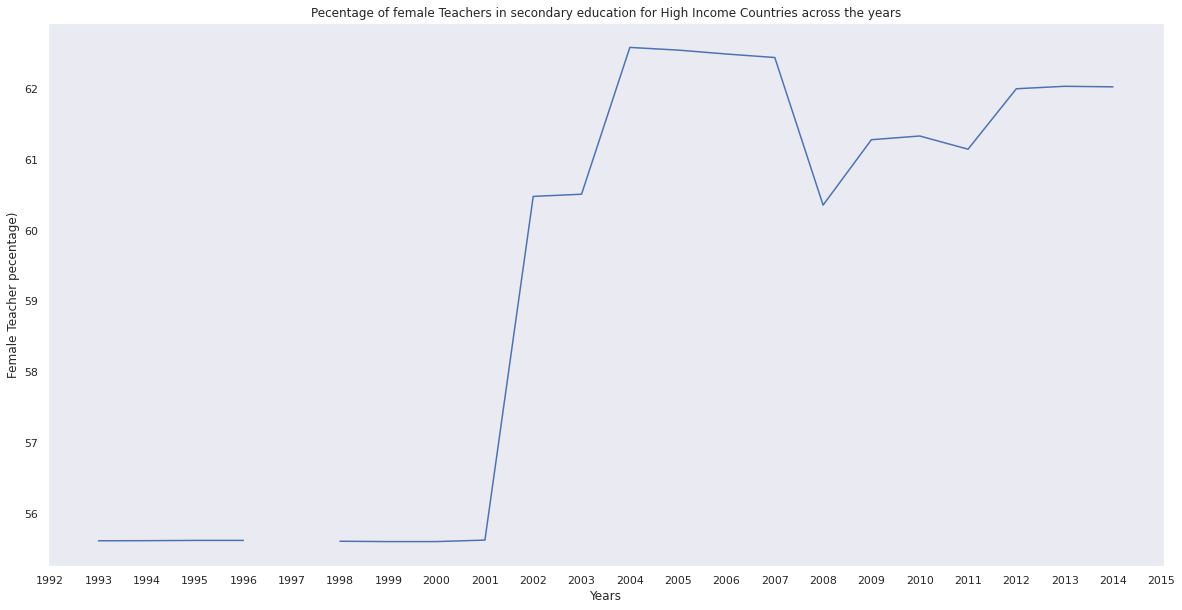

In [223]:
# Indicator 6: Teachers percentage
female_teachers4 = high_OECD_income_df[high_OECD_income_df['Indicator Name']=='Percentage of teachers in secondary education who are female (%)']
female_teachers_mean4 =  female_teachers4[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'Female Teachers in secondary education'})

print(f'Region: {region} Countries: {countries}')
female_teachers_mean4
x_label=female_teachers_mean4['Years']                
y_label=female_teachers_mean4[['Female Teachers in secondary education']]
plt.plot(x_label,y_label)
plt.title('Pecentage of female Teachers in secondary education for High Income Countries across the years')
plt.ylabel('Female Teacher pecentage)')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (20, 8)
plt.grid()

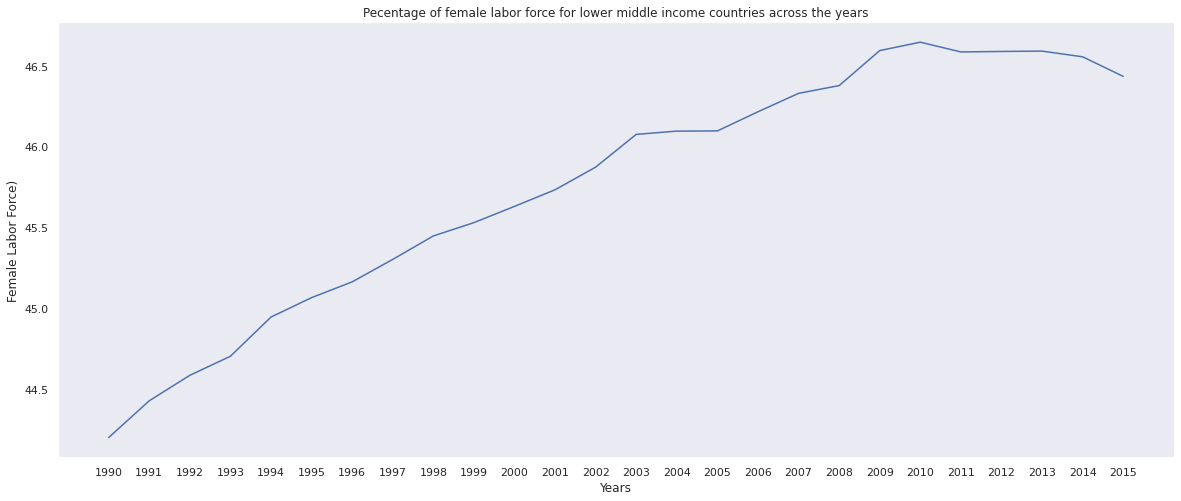

In [224]:
# Indicator 7- Female labor as a % of total labor force
female_labor = high_OECD_income_df[high_OECD_income_df['Indicator Name']=='Labor force, female (% of total labor force)']
female_labor_mean4 =  female_labor[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'Female labor force'})

female_labor_mean4
x_label=female_labor_mean4['Years']                
y_label=female_labor_mean4[['Female labor force']]
plt.plot(x_label,y_label)
plt.title('Pecentage of female labor force for lower middle income countries across the years')
plt.ylabel('Female Labor Force)')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (20, 8)
plt.grid()

## Comparison 1: Female labour force vs GDP

In [225]:
labor_gdp_merge = pd.merge(high_gdp_capita, female_labor_mean4, how='left', on='Years')
labor_gdp_merge

Years  GDP per capita  Female labor force
0   1990    36400.840268           44.199294
1   1991    35517.444814           44.426837
2   1992    35837.346404           44.584556
3   1993    36363.263836           44.702498
4   1994    37499.477177           44.945055
5   1995    38123.591664           45.065319
6   1996    38723.626154           45.162970
7   1997    39966.899873           45.301981
8   1998    41212.296518           45.447038
9   1999    42812.465293           45.529499
10  2000    44347.050537           45.630107
11  2001    44506.220896           45.732863
12  2002    45156.237037           45.873190
13  2003    45771.923740           46.075783
14  2004    46892.600029           46.096001
15  2005    47968.589227           46.097226
16  2006    48805.218403           46.215735
17  2007    49266.115137           46.329792
18  2008    48937.606162           46.377726
19  2009    47059.700381           46.594518
20  2010    47910.677420           46.646433
21  2011    48620.216580           46.586086
22  2012    49110.915827           46.589049
23  2013    49665.862705           46.591203
24  2014    50424.781744           46.555969
25  2015    50982.894378           46.434706

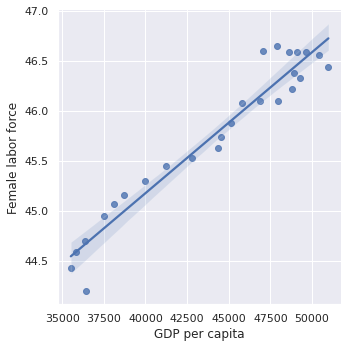

In [226]:
sb.lmplot(x = 'GDP per capita', y = 'Female labor force', data = labor_gdp_merge)

## Comparison 2:  Enrolment rate vs GDP per capita growth over 25 years in low income countries

Region: ['North America'] Countries: ['Canada', 'United States']


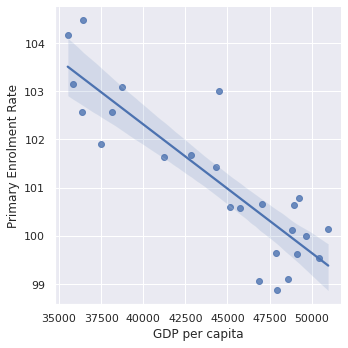

In [227]:
gdp_enrol_merge2 = pd.merge(high_inc_prim4, high_gdp_capita, how='left', on='Years')
gdp_enrol_merge2
print(f'Region: {region} Countries: {countries}')
sb.lmplot(x = 'GDP per capita', y = 'Primary Enrolment Rate', data = gdp_enrol_merge2)

### Comparison 3: (GDP PPP vs Expenditure for 25 years)

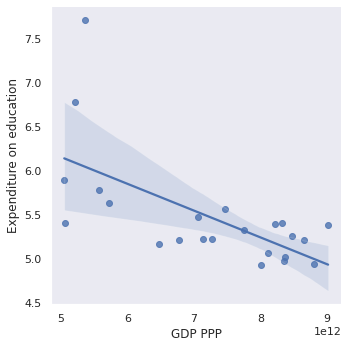

In [228]:
merge_exp_GDP = pd.merge(high_gdp_ppp ,high_expenditure, how='left', on='Years')
merge_exp_GDP

sb.lmplot(x = 'GDP PPP', y = 'Expenditure on education', data = merge_exp_GDP)
 
plt.grid()

.

# Type3: India vs Year (Comparing with world)

In [229]:
low_mid_income_df = merged_df_final[merged_df_final['Income Group']=='Lower middle income']
india_df = low_mid_income_df[low_mid_income_df['Country Name']=='India']
india_df

Country Name Country Code  \
103258        India          IND   
103259        India          IND   
103260        India          IND   
103261        India          IND   
103262        India          IND   
...             ...          ...   
104441        India          IND   
104442        India          IND   
104443        India          IND   
104444        India          IND   
104445        India          IND   

                                           Indicator Name    Indicator Code  \
103258  Adjusted net enrolment rate, primary, both sex...       SE.PRM.TENR   
103259   Adjusted net enrolment rate, primary, female (%)    SE.PRM.TENR.FE   
103260  Adjusted net enrolment rate, primary, gender p...    UIS.NERA.1.GPI   
103261     Adjusted net enrolment rate, primary, male (%)    SE.PRM.TENR.MA   
103262  Adjusted net intake rate to Grade 1 of primary...        UIS.NIRA.1   
...                                                   ...               ...   
104441  Wittgenstein Projection: Population in thousan...  PRJ.POP.ALL.1.MA   
104442  Wittgenstein Projection: Population in thousan...  PRJ.POP.ALL.1.MF   
104443  Wittgenstein Projection: Population in thousan...  PRJ.POP.ALL.3.FE   
104444  Wittgenstein Projection: Population in thousan...  PRJ.POP.ALL.3.MA   
104445  Wittgenstein Projection: Population in thousan...  PRJ.POP.ALL.3.MF   

             1990  1991  1992  1993  1994  1995  ...       2009  \
103258        NaN   NaN   NaN   NaN   NaN   NaN  ...  95.643608   
103259        NaN   NaN   NaN   NaN   NaN   NaN  ...  96.878281   
103260   0.737090   NaN   NaN   NaN   NaN   NaN  ...   1.024790   
103261        NaN   NaN   NaN   NaN   NaN   NaN  ...  94.534981   
103262  87.459381   NaN   NaN   NaN   NaN   NaN  ...  93.770988   
...           ...   ...   ...   ...   ...   ...  ...        ...   
104441        NaN   NaN   NaN   NaN   NaN   NaN  ...        NaN   
104442        NaN   NaN   NaN   NaN   NaN   NaN  ...        NaN   
104443        NaN   NaN   NaN   NaN   NaN   NaN  ...        NaN   
104444        NaN   NaN   NaN   NaN   NaN   NaN  ...        NaN   
104445        NaN   NaN   NaN   NaN   NaN   NaN  ...        NaN   

                 2010       2011       2012       2013  2014       2015  \
103258      96.192810  95.762993  96.984512  97.738869   NaN        NaN   
103259      97.182549  97.176651  97.698929  98.454453   NaN        NaN   
103260       1.019700   1.028350   1.014050   1.013960   NaN        NaN   
103261      95.305397  94.497261  96.345337  97.098770   NaN        NaN   
103262      96.857208  93.458122  94.837013  95.774567   NaN        NaN   
...               ...        ...        ...        ...   ...        ...   
104441   66691.560000        NaN        NaN        NaN   NaN   74880.07   
104442  124622.980000        NaN        NaN        NaN   NaN  140477.96   
104443   76570.890000        NaN        NaN        NaN   NaN   96447.70   
104444  115526.710000        NaN        NaN        NaN   NaN  135206.30   
104445  192097.600000        NaN        NaN        NaN   NaN  231654.01   

        Currency Unit      Region         Income Group  
103258   Indian rupee  South Asia  Lower middle income  
103259   Indian rupee  South Asia  Lower middle income  
103260   Indian rupee  South Asia  Lower middle income  
103261   Indian rupee  South Asia  Lower middle income  
103262   Indian rupee  South Asia  Lower middle income  
...               ...         ...                  ...  
104441   Indian rupee  South Asia  Lower middle income  
104442   Indian rupee  South Asia  Lower middle income  
104443   Indian rupee  South Asia  Lower middle income  
104444   Indian rupee  South Asia  Lower middle income  
104445   Indian rupee  South Asia  Lower middle income  

[1188 rows x 33 columns]

In [230]:
# Essential Indicators
enrolment_indicator2 = [elem0 for elem0 in india_df['Indicator Name'].unique() if 'enrolment' in elem0] # Done
completion_indicator2 = [elem1 for elem1 in india_df['Indicator Name'].unique() if 'completion' in elem1] # Done 
teachers_indicator2 = [elem5 for elem5 in india_df['Indicator Name'].unique() if 'teachers' in elem5]
Unemployment_indicator2 = [elem2 for elem2 in india_df['Indicator Name'].unique() if 'Unemployment' in elem2]  # Done 
GNI_indicator2 = [elem3 for elem3 in india_df['Indicator Name'].unique() if 'GNI' in elem3]  # Done 
expenditure_indicator2 = [elem4 for elem4 in india_df['Indicator Name'].unique() if 'expenditure' in elem4]    # Done
population_growth_indicator2 = [elem6 for elem6 in india_df['Indicator Name'].unique() if 'Population growth' in elem6]    # Done


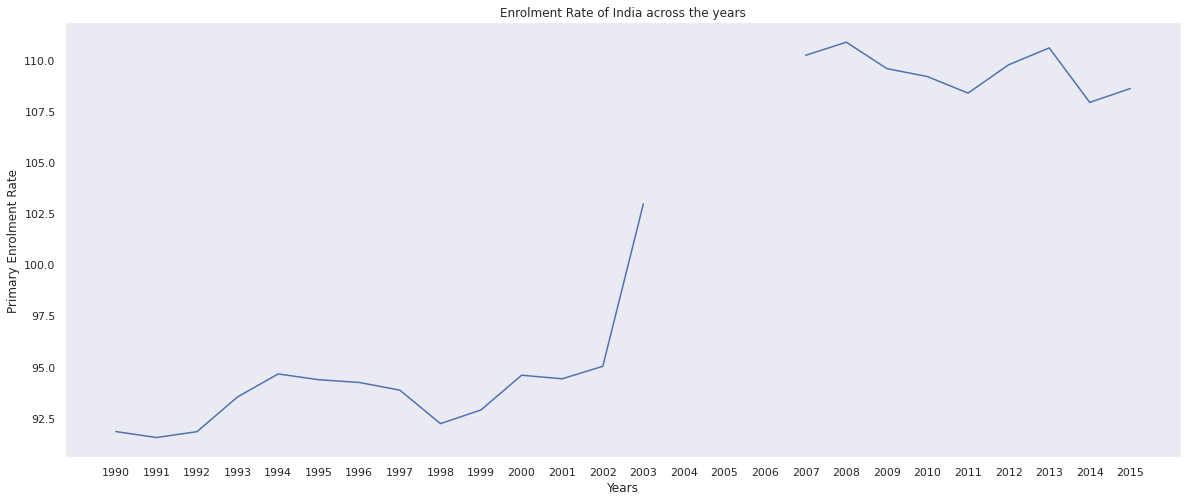

In [231]:
# Indicator 1: Enrolement Rate    
primary_df = india_df[india_df['Indicator Name']=='Gross enrolment ratio, primary, both sexes (%)']
india_prim2 =  primary_df[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'Primary Enrolment Rate'})


# Primary Enrolment Rate of India
india_prim2
x_label=india_prim2['Years']                
y_label=india_prim2['Primary Enrolment Rate']
plt.plot(x_label,y_label)
plt.title('Enrolment Rate of India across the years')
plt.ylabel('Primary Enrolment Rate')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (15, 8) 
plt.grid()

In [232]:
india_df[india_df['Indicator Name'].str.contains('Gross enrolment')]['Indicator Name'].unique()

array(['Gross enrolment ratio, lower secondary, both sexes (%)',
       'Gross enrolment ratio, lower secondary, female (%)',
       'Gross enrolment ratio, lower secondary, gender parity index (GPI)',
       'Gross enrolment ratio, lower secondary, male (%)',
       'Gross enrolment ratio, pre-primary, both sexes (%)',
       'Gross enrolment ratio, pre-primary, female (%)',
       'Gross enrolment ratio, pre-primary, gender parity index (GPI)',
       'Gross enrolment ratio, pre-primary, male (%)',
       'Gross enrolment ratio, primary and lower secondary, both sexes (%)',
       'Gross enrolment ratio, primary and lower secondary, female (%)',
       'Gross enrolment ratio, primary and lower secondary, gender parity index (GPI)',
       'Gross enrolment ratio, primary and lower secondary, male (%)',
       'Gross enrolment ratio, primary and secondary, both sexes (%)',
       'Gross enrolment ratio, primary and secondary, female (%)',
       'Gross enrolment ratio, primary and seco

In [233]:
list1 = ['Gross enrolment ratio, lower secondary, both sexes (%)','Gross enrolment ratio, primary, both sexes (%)', 'Gross enrolment ratio, secondary, both sexes (%)', 'Gross enrolment ratio, upper secondary, both sexes (%)','Gross enrolment ratio, tertiary, both sexes (%)']
filter1 = india_df.loc[india_df['Indicator Name'].isin(list1)][['Country Name', 'Indicator Name', '2010']]
filter1 = filter1[~filter1['2010'].isna()]
filter2 = filter1.pivot(index='Country Name', columns='Indicator Name', values='2010').reset_index()
filter2['Overall Gross Enrolment Ratio'] = (filter2.iloc[:,1] + filter2.iloc[:,2] + filter2.iloc[:,3] + filter2.iloc[:,4] + filter2.iloc[:,5])/5
filter2

Indicator Name Country Name  \
0                     India   

Indicator Name  Gross enrolment ratio, lower secondary, both sexes (%)  \
0                                                       80.176369        

Indicator Name  Gross enrolment ratio, primary, both sexes (%)  \
0                                                   109.183647   

Indicator Name  Gross enrolment ratio, secondary, both sexes (%)  \
0                                                      63.290939   

Indicator Name  Gross enrolment ratio, tertiary, both sexes (%)  \
0                                                     17.911489   

Indicator Name  Gross enrolment ratio, upper secondary, both sexes (%)  \
0                                                       50.259708        

Indicator Name  Overall Gross Enrolment Ratio  
0                                   64.164431

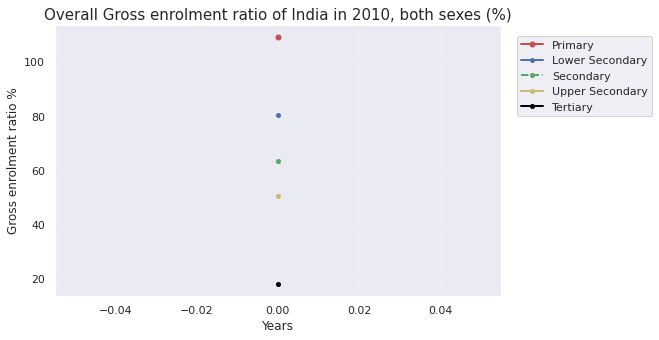

In [234]:

plt.figure(figsize=(8, 5))
plt.rcParams['figure.facecolor'] = 'white'

plt.plot(filter2['Gross enrolment ratio, primary, both sexes (%)'],'ro-', linewidth=2, markersize=5)
plt.plot(filter2['Gross enrolment ratio, lower secondary, both sexes (%)'],'bo-', linewidth=2, markersize=4)
plt.plot(filter2['Gross enrolment ratio, secondary, both sexes (%)'],'go--', linewidth=2, markersize=4)
plt.plot(filter2['Gross enrolment ratio, upper secondary, both sexes (%)'],'yo-', linewidth=2, markersize=4)
plt.plot(filter2['Gross enrolment ratio, tertiary, both sexes (%)'],color='black',marker='o', linewidth=2, markersize=4)

plt.legend(['Primary', 'Lower Secondary', 'Secondary', 'Upper Secondary', 'Tertiary'], bbox_to_anchor=(1.01, 1), loc=2,  borderaxespad=1.)
plt.xlabel('Years')
plt.ylabel('Gross enrolment ratio %')
plt.title('Overall Gross enrolment ratio of India in 2010, both sexes (%)', fontsize=15)

plt.grid(color = 'whitesmoke', linestyle = '--', linewidth = 0.5)

plt.show()

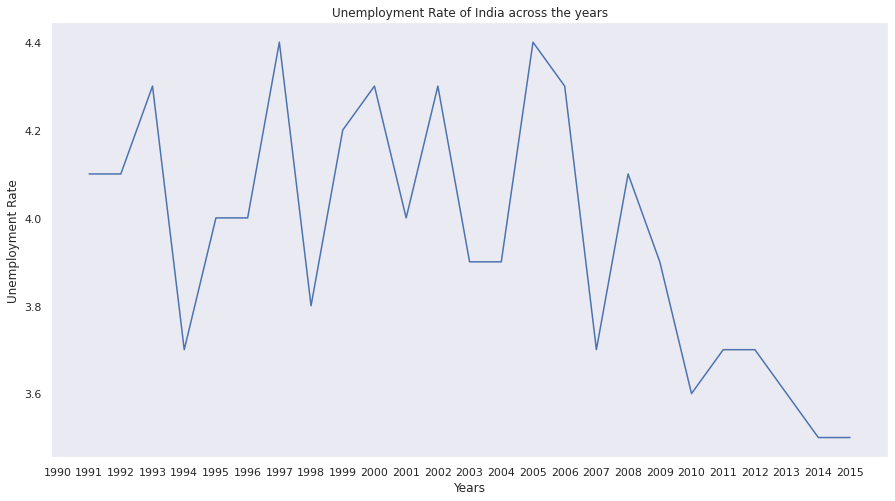

In [235]:
# Indicator 2: Unemployment
unemployed_df = india_df[india_df['Indicator Name']=='Unemployment, total (% of total labor force)']
Uneducated_unemployed = low_mid_income_df[low_mid_income_df['Indicator Name']=='Share of youth not in education, employment, or training, total (% of youth population)']

low_income_unem2 =  unemployed_df[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'Unemployment Rate'})

low_income_unem2
x_label=low_income_unem2['Years']                
y_label=low_income_unem2['Unemployment Rate']
plt.plot(x_label,y_label)
plt.title('Unemployment Rate of India across the years')
plt.ylabel('Unemployment Rate')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (20, 10) 
plt.grid()

In [236]:
low_income_unem2

Years  Unemployment Rate
0   1990                NaN
1   1991                4.1
2   1992                4.1
3   1993                4.3
4   1994                3.7
5   1995                4.0
6   1996                4.0
7   1997                4.4
8   1998                3.8
9   1999                4.2
10  2000                4.3
11  2001                4.0
12  2002                4.3
13  2003                3.9
14  2004                3.9
15  2005                4.4
16  2006                4.3
17  2007                3.7
18  2008                4.1
19  2009                3.9
20  2010                3.6
21  2011                3.7
22  2012                3.7
23  2013                3.6
24  2014                3.5
25  2015                3.5

In [237]:
# Indicator 3: GDP per capita and Expenditure
expenditure_india = india_df[india_df['Indicator Name']=='Government expenditure on education as % of GDP (%)']
india_capita_df = india_df[india_df['Indicator Name']=='GDP per capita (constant 2005 US$)']
India_ppp_df = india_df[india_df['Indicator Name']=='GDP, PPP (constant 2011 international $)']


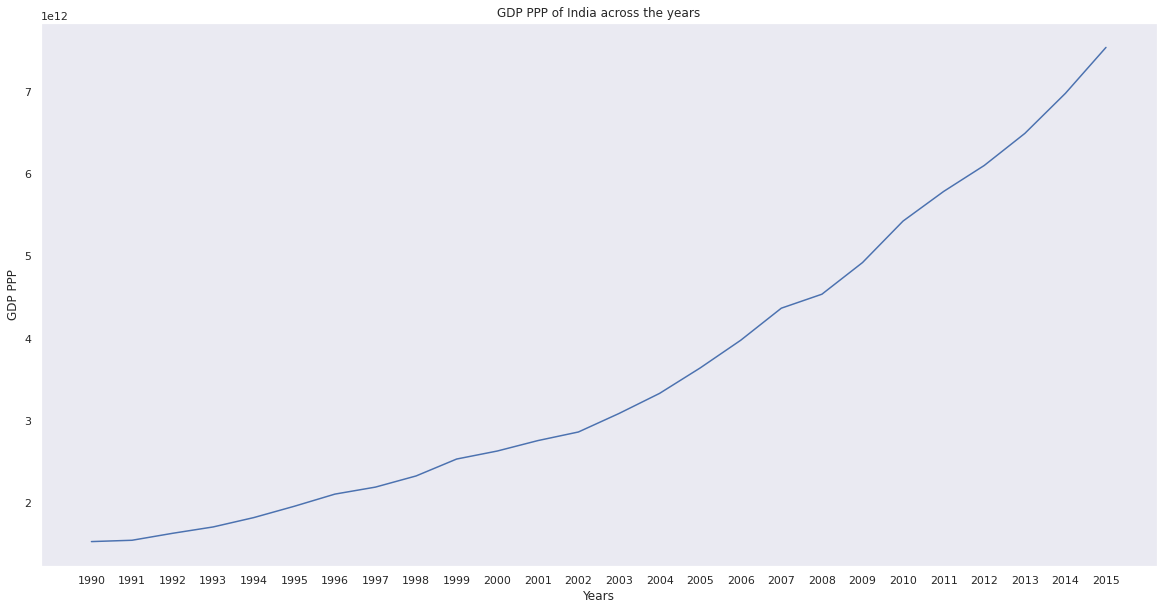

In [238]:
india_gdp_ppp_df =  India_ppp_df[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'GDP PPP'})

india_gdp_ppp_df
x_label=india_gdp_ppp_df['Years']                
y_label=india_gdp_ppp_df['GDP PPP']
plt.plot(x_label,y_label)
plt.title('GDP PPP of India across the years')
plt.ylabel('GDP PPP')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (20, 10) 
plt.grid()

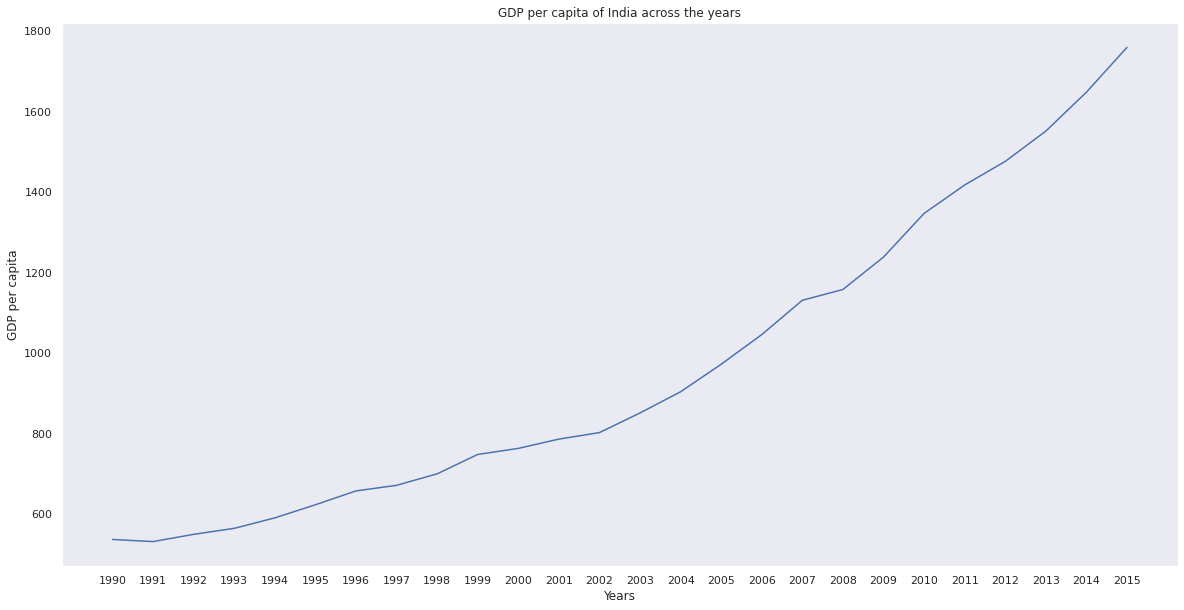

In [239]:
india_GDP =  india_capita_df[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'GDP per capita'})

india_GDP
x_label=india_GDP['Years']                
y_label=india_GDP['GDP per capita']
plt.plot(x_label,y_label)
plt.title('GDP per capita of India across the years')
plt.ylabel('GDP per capita')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (20, 10) 
plt.grid()

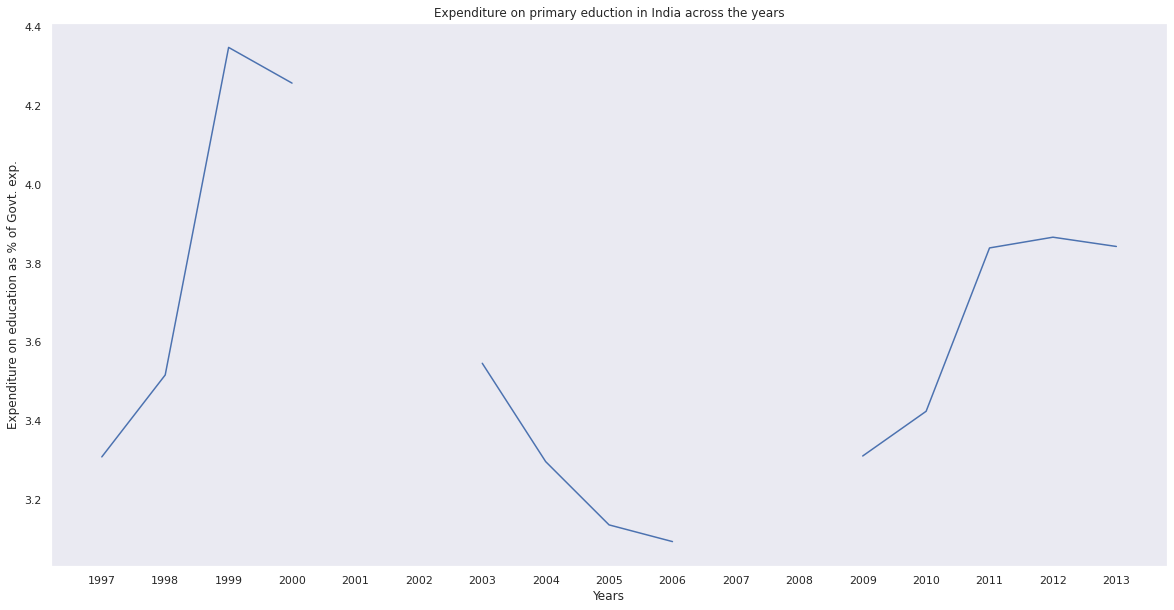

In [240]:
india_expenditure2 =  expenditure_india[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'Expenditure on education'})

india_expenditure2
x_label=india_expenditure2['Years']                
y_label=india_expenditure2['Expenditure on education']
plt.plot(x_label,y_label)
plt.title('Expenditure on primary eduction in India across the years')
plt.ylabel('Expenditure on education as % of Govt. exp.')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (20, 8) 
plt.grid()

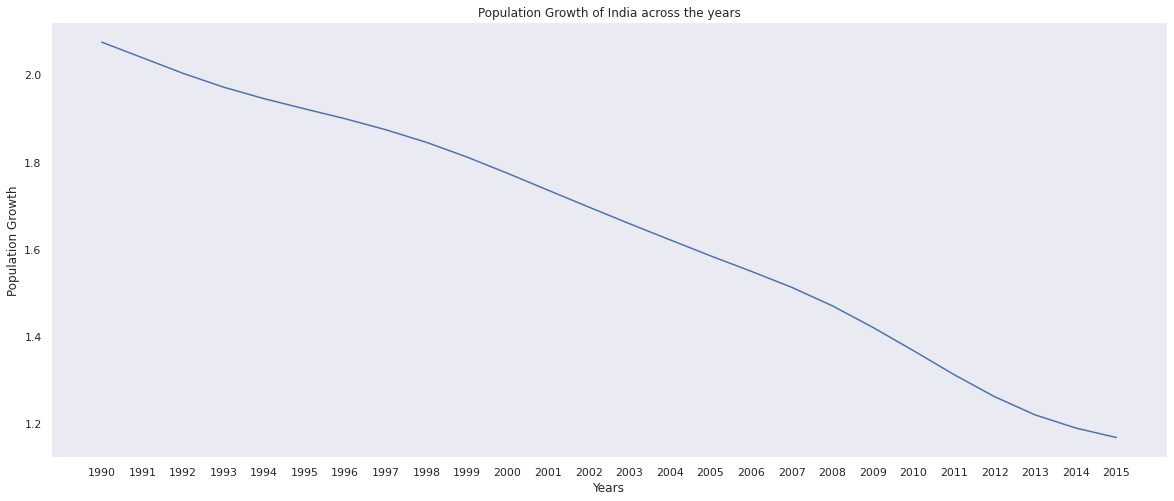

In [241]:
# Indicator 4: Population Growth    
pop_gro_df = india_df[india_df['Indicator Name']=='Population growth (annual %)']
india_pop_gro =  pop_gro_df[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'Population Growth'})


# Lower Secondary Enrolment Rate of India
india_pop_gro
x_label=india_pop_gro['Years']                
y_label=india_pop_gro['Population Growth']
plt.plot(x_label,y_label)
plt.title('Population Growth of India across the years')
plt.ylabel('Population Growth')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (20, 10) 
plt.grid()

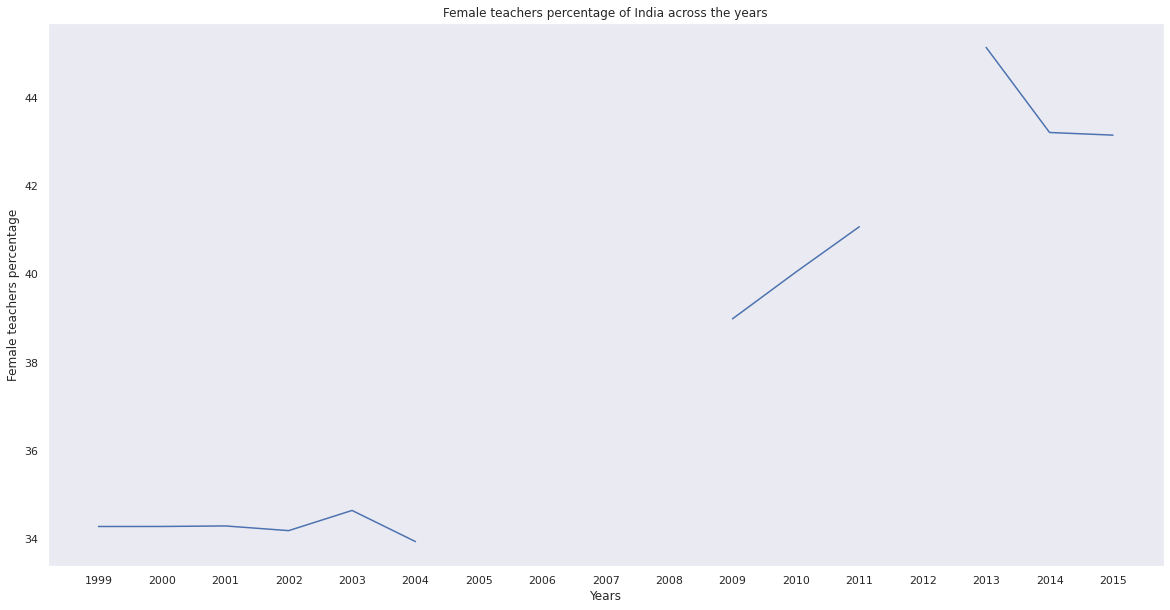

In [242]:
# Indicator 5: Female teachers percentage  
sec_df = india_df[india_df['Indicator Name']=='Percentage of teachers in secondary education who are female (%)']
india_sec =  sec_df[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'Female teachers percentage'})



india_sec
x_label=india_sec['Years']                
y_label=india_sec['Female teachers percentage']
plt.plot(x_label,y_label)
plt.title('Female teachers percentage of India across the years')
plt.ylabel('Female teachers percentage')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (20, 10) 
plt.grid()

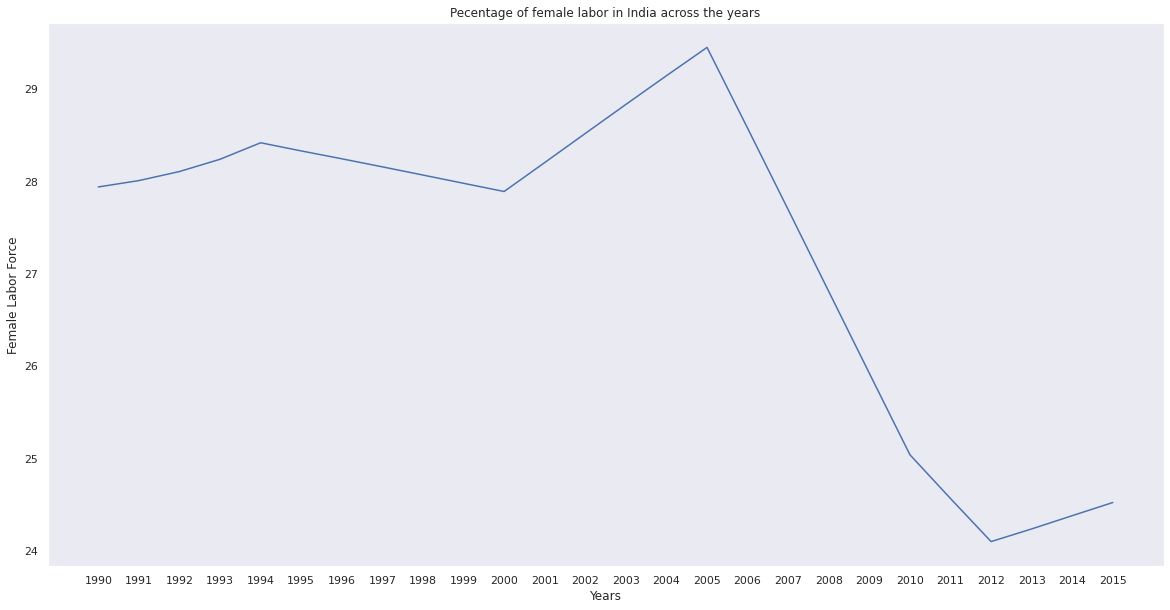

In [243]:
# Indicator 6- Female labor as a % of total labor force
female_labor = india_df[india_df['Indicator Name']=='Labor force, female (% of total labor force)']
female_labor_mean_india =  female_labor[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'Female labor force'})

female_labor_mean_india
x_label=female_labor_mean_india['Years']                
y_label=female_labor_mean_india['Female labor force']
plt.plot(x_label,y_label)
plt.title('Pecentage of female labor in India across the years')
plt.ylabel('Female Labor Force')
plt.xlabel('Years')
plt.rcParams['figure.figsize'] = (20, 8)
plt.grid()

## Comparison 1: Female labour force vs GDP per capita

In [244]:
labor_gdp_merge = pd.merge(india_GDP, female_labor_mean, how='left', on='Years')

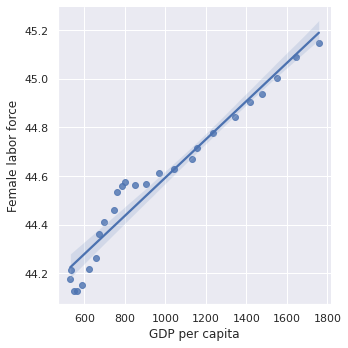

In [245]:
sb.lmplot(x = 'GDP per capita', y = 'Female labor force', data = labor_gdp_merge)

## Comparison 2: Primary enrolment rate with GDP per capita growth over 25 years in India

In [246]:
gdp_enrol_merge_india = pd.merge(india_prim2, india_GDP, how='left', on='Years')

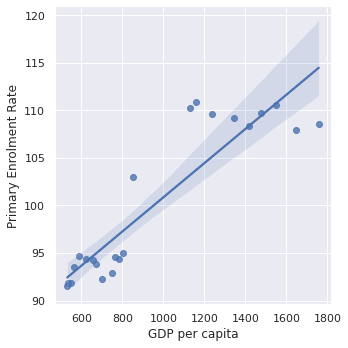

In [247]:
gdp_enrol_merge_india
sb.lmplot(x = 'GDP per capita', y = 'Primary Enrolment Rate', data = gdp_enrol_merge_india)

## Comparison 3: (GDP PPP vs Expenditure for 25 years)

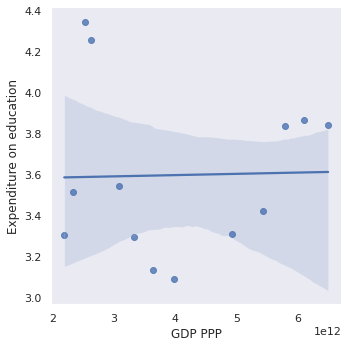

In [248]:
merge_exp_GDP = pd.merge(india_gdp_ppp_df ,india_expenditure2, how='left', on='Years')
merge_exp_GDP

sb.lmplot(x = 'GDP PPP', y = 'Expenditure on education', data = merge_exp_GDP)
 
plt.grid()

### Type 4: India vs World:

### 1. Enrolment Rate:

In [249]:
up_sec_df_world = enrolment_df2[enrolment_df2['Indicator Name']=='Gross enrolment ratio, upper secondary, both sexes (%)']
_2010_enrol = up_sec_df_world.sort_values('2010', ascending=False).reset_index()
_2010_enrol[['Country Name','2010']]

Country Name        2010
0       Australia  168.520767
1         Ireland  139.532623
2     New Zealand  137.334656
3           Spain  132.424576
4          Norway  126.641533
..            ...         ...
139       Burundi   12.130070
140    Mozambique   11.051060
141  Burkina Faso   10.015720
142      Tanzania    8.552130
143         Niger    4.539990

[144 rows x 2 columns]

In [250]:
up_sec_df_india = india_df[india_df['Indicator Name']=='Gross enrolment ratio, upper secondary, both sexes (%)']
up_sec_df_india[['Country Name','2010']]

Country Name       2010
103770        India  50.259708

In [251]:
_2010_enrol[_2010_enrol['2010']<50.26]['Country Name']

108                    India
109         Egypt, Arab Rep.
110                 Malaysia
111              El Salvador
112              Gambia, The
113                  Morocco
114                  Vanuatu
115                Swaziland
116                    Nepal
117                   Bhutan
118                  Nigeria
119               Bangladesh
120     Syrian Arab Republic
121                  Myanmar
122         Congo, Dem. Rep.
123              Yemen, Rep.
124              Afghanistan
125                  Lesotho
126          Solomon Islands
127                    Sudan
128                  Lao PDR
129                 Pakistan
130                     Mali
131                  Eritrea
132                   Rwanda
133    Sao Tome and Principe
134                   Angola
135                     Chad
136                 Ethiopia
137                   Malawi
138               Mauritania
139                  Burundi
140               Mozambique
141             Burkina Faso
142           

In [252]:
up_sec_df = india_df[india_df['Indicator Name']=='Gross enrolment ratio, upper secondary, both sexes (%)']
india_up_sec =  up_sec_df[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'Upper Secondary Enrolment Rate'})
india_up_sec

Years  Upper Secondary Enrolment Rate
0   1990                             NaN
1   1991                             NaN
2   1992                             NaN
3   1993                             NaN
4   1994                       31.514790
5   1995                       31.721189
6   1996                       26.393129
7   1997                       28.691490
8   1998                             NaN
9   1999                       30.192329
10  2000                       32.870029
11  2001                       33.056042
12  2002                       34.650711
13  2003                       37.348381
14  2004                       38.642948
15  2005                       40.528709
16  2006                       41.718430
17  2007                       42.539169
18  2008                       47.395660
19  2009                       47.822170
20  2010                       50.259708
21  2011                       53.445419
22  2012                       57.683140
23  2013                       56.364342
24  2014                       63.862450
25  2015                       63.592419

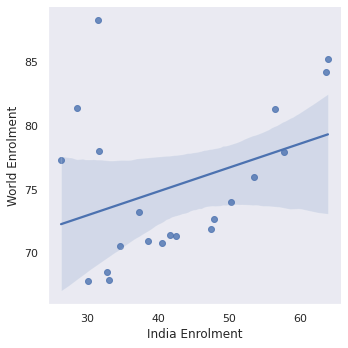

In [253]:
merge_india_world = pd.merge(india_up_sec ,new_df3u, how='left', on='Years')
merge_final1 = merge_india_world.rename(columns={'Upper Secondary Enrolment Rate':'India Enrolment','Upper-Secondary Enrolment Rate':'World Enrolment'})
merge_final1
sb.lmplot(x = 'India Enrolment', y = 'World Enrolment', data = merge_final1)
 
plt.grid()

### 2. Unemployment Rate:

In [254]:
unemp_world_df = unemployment_df[unemployment_df['Indicator Name']=='Unemployment, total (% of total labor force)']
_2010_empl_world = unemp_world_df.sort_values('2010', ascending=False).reset_index()
_2010_empl_world[['Country Name','2010']]

Country Name       2010
0     Macedonia, FYR  32.000000
1    Solomon Islands  30.900000
2        Gambia, The  29.799999
3            Lesotho  28.000000
4          Swaziland  27.700001
..               ...        ...
181            Benin   1.000000
182          Myanmar   0.800000
183          Belarus   0.700000
184         Cambodia   0.400000
185            Qatar   0.400000

[186 rows x 2 columns]

In [255]:
unempl_india_df = india_df[india_df['Indicator Name']=='Unemployment, total (% of total labor force)']
_2010_empl_india = unempl_india_df.sort_values('2010', ascending=False).reset_index()
_2010_empl_india[['Country Name','2010']]

Country Name  2010
0        India   3.6

In [256]:
_2010 = _2010_empl_world[_2010_empl_world['2010']>3.6]
_djd = _2010.sort_values('2010', ascending=True).reset_index()
_djd['Country Name']

0             Guatemala
1               Liberia
2           Korea, Rep.
3      Congo, Dem. Rep.
4            Madagascar
             ...       
153           Swaziland
154             Lesotho
155         Gambia, The
156     Solomon Islands
157      Macedonia, FYR
Name: Country Name, Length: 158, dtype: object

In [257]:
unempl_india_df = india_df[india_df['Indicator Name']=='Unemployment, total (% of total labor force)']
india_unempl =  unempl_india_df[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'Unemployment Rate'})
india_unempl

Years  Unemployment Rate
0   1990                NaN
1   1991                4.1
2   1992                4.1
3   1993                4.3
4   1994                3.7
5   1995                4.0
6   1996                4.0
7   1997                4.4
8   1998                3.8
9   1999                4.2
10  2000                4.3
11  2001                4.0
12  2002                4.3
13  2003                3.9
14  2004                3.9
15  2005                4.4
16  2006                4.3
17  2007                3.7
18  2008                4.1
19  2009                3.9
20  2010                3.6
21  2011                3.7
22  2012                3.7
23  2013                3.6
24  2014                3.5
25  2015                3.5

In [258]:
merge_india_world = pd.merge(india_unempl ,new_df_total, how='left', on='Years')
merge_final2 = merge_india_world.rename(columns={'Unemployment Rate':'India Unemployment','Total Unemployment':'World Unemployment'})
merge_final2


Years  India Unemployment  World Unemployment
0   1990                 NaN                 NaN
1   1991                 4.1            8.984946
2   1992                 4.1            9.204301
3   1993                 4.3            9.429032
4   1994                 3.7            9.484409
5   1995                 4.0            9.375806
6   1996                 4.0            9.544086
7   1997                 4.4            9.432258
8   1998                 3.8            9.424194
9   1999                 4.2            9.369892
10  2000                 4.3            9.289247
11  2001                 4.0            9.409140
12  2002                 4.3            9.508602
13  2003                 3.9            9.556452
14  2004                 3.9            9.377419
15  2005                 4.4            9.080107
16  2006                 4.3            8.678495
17  2007                 3.7            8.395699
18  2008                 4.1            8.154839
19  2009                 3.9            8.960753
20  2010                 3.6            9.130645
21  2011                 3.7            9.119355
22  2012                 3.7            9.132796
23  2013                 3.6            9.112903
24  2014                 3.5            8.990323
25  2015                 3.5            8.833871

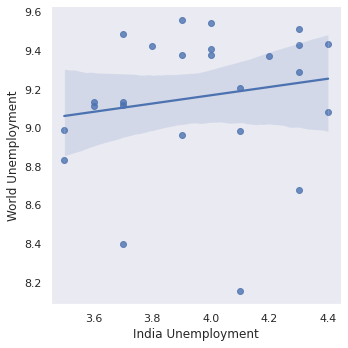

In [259]:

sb.lmplot(x = 'India Unemployment', y = 'World Unemployment', data = merge_final2)
 
plt.grid()

### 3. Female Labor Force

In [260]:
female_labor_world_df = merged_df_final[merged_df_final['Indicator Name']=='Labor force, female (% of total labor force)']
_2010_empl_world = female_labor_world_df.sort_values('2010', ascending=False).reset_index()
_2010_empl_world['2010']

0      54.482111
1      52.026659
2      51.277193
3      50.623820
4      50.578569
         ...    
181    14.816740
182    13.830236
183    12.666223
184    12.050642
185    11.427443
Name: 2010, Length: 186, dtype: float64

In [261]:
female_labor_india_df = india_df[india_df['Indicator Name']=='Labor force, female (% of total labor force)']
_2010_fem_lab_india = female_labor_india_df.sort_values('2010', ascending=False).reset_index()
_2010_fem_lab_india[['Country Name','2010']]

Country Name       2010
0        India  25.037949

In [262]:
female_2010 = female_labor_world_df[female_labor_world_df['2010']>25.04]
df = female_2010.sort_values('2010', ascending=False).reset_index()
df

index Country Name Country Code  \
0    154972   Mozambique          MOZ   
1     42418      Burundi          BDI   
2    184436       Rwanda          RWA   
3    131933    Lithuania          LTU   
4    215114     Tanzania          TZA   
..      ...          ...          ...   
162  121360       Kuwait          KWT   
163  130634        Libya          LBY   
164  222199      Tunisia          TUN   
165  153511      Morocco          MAR   
166   24406   Bangladesh          BGD   

                                   Indicator Name     Indicator Code  \
0    Labor force, female (% of total labor force)  SL.TLF.TOTL.FE.ZS   
1    Labor force, female (% of total labor force)  SL.TLF.TOTL.FE.ZS   
2    Labor force, female (% of total labor force)  SL.TLF.TOTL.FE.ZS   
3    Labor force, female (% of total labor force)  SL.TLF.TOTL.FE.ZS   
4    Labor force, female (% of total labor force)  SL.TLF.TOTL.FE.ZS   
..                                            ...                ...   
162  Labor force, female (% of total labor force)  SL.TLF.TOTL.FE.ZS   
163  Labor force, female (% of total labor force)  SL.TLF.TOTL.FE.ZS   
164  Labor force, female (% of total labor force)  SL.TLF.TOTL.FE.ZS   
165  Labor force, female (% of total labor force)  SL.TLF.TOTL.FE.ZS   
166  Labor force, female (% of total labor force)  SL.TLF.TOTL.FE.ZS   

          1990       1991       1992       1993       1994  ...       2009  \
0    55.611835  55.740082  55.777147  55.825412  55.846907  ...  54.357478   
1    52.292545  52.409461  52.560555  52.721737  52.860594  ...  51.986229   
2    49.490145  49.675381  49.999743  50.362790  50.525387  ...  51.262036   
3    46.854725  46.839566  46.852248  46.868950  46.924050  ...  50.376516   
4    50.216201  50.221668  50.230429  50.246570  50.268372  ...  50.548589   
..         ...        ...        ...        ...        ...  ...        ...   
162  24.238008  24.501989        NaN        NaN        NaN  ...  27.460158   
163  18.974011  19.756563  20.068206  20.372908  20.849568  ...  26.444590   
164  23.013870  23.028762  23.178656  23.207140  23.289044  ...  26.787206   
165  23.962674  24.067516  24.035204  24.049329  24.281464  ...  26.494165   
166  19.953900  20.042379  20.193132  20.401161  20.656518  ...  25.615465   

          2010       2011       2012       2013       2014       2015  \
0    54.482111  54.693401  54.995033  54.975723  54.971312  54.975901   
1    52.026659  52.140879  52.238074  52.324479  52.405416  52.375715   
2    51.277193  51.298048  51.333782  51.359756  51.402035  51.449383   
3    50.623820  50.394998  50.615043  50.136478  50.177434  50.465211   
4    50.578569  50.636329  50.099610  49.510963  48.888867  48.916910   
..         ...        ...        ...        ...        ...        ...   
162  27.643011  28.049978  28.349405  28.449265  28.468256  28.472208   
163  26.732539  24.583434  26.086575  25.249779  24.497670  24.494007   
164  26.678958  26.539932  27.033097  26.954668  26.859670  26.699632   
165  26.439844  26.385275  25.924116  26.060332  26.053836  26.105709   
166  26.135135  26.620244  27.099285  27.575633  28.055022  28.541393   

              Currency Unit                      Region          Income Group  
0    New Mozambican metical          Sub-Saharan Africa            Low income  
1             Burundi franc          Sub-Saharan Africa            Low income  
2             Rwandan franc          Sub-Saharan Africa            Low income  
3          Lithuanian litas       Europe & Central Asia  High income: nonOECD  
4        Tanzanian shilling          Sub-Saharan Africa            Low income  
..                      ...                         ...                   ...  
162           Kuwaiti dinar  Middle East & North Africa  High income: nonOECD  
163            Libyan dinar  Middle East & North Africa   Upper middle income  
164          Tunisian dinar  Middle East & North Africa   Upper middle income  
165         Moroccan dirham  Middl

In [263]:
female_labor_india_df = india_df[india_df['Indicator Name']=='Labor force, female (% of total labor force)']
india_female_labor =  female_labor_india_df[['1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']].mean().reset_index().rename(columns={'index':'Years', 0:'Female Labor Force'})
india_female_labor

Years  Female Labor Force
0   1990           27.938022
1   1991           28.006935
2   1992           28.104928
3   1993           28.237847
4   1994           28.416535
5   1995           28.328141
6   1996           28.243050
7   1997           28.155739
8   1998           28.066782
9   1999           27.977659
10  2000           27.888679
11  2001           28.202175
12  2002           28.517243
13  2003           28.831545
14  2004           29.142406
15  2005           29.449028
16  2006           28.573753
17  2007           27.691578
18  2008           26.805637
19  2009           25.920097
20  2010           25.037949
21  2011           24.563874
22  2012           24.097772
23  2013           24.235051
24  2014           24.378622
25  2015           24.521093

In [264]:
merge_india_world = pd.merge(india_female_labor ,female_labor_mean, how='left', on='Years')
merge_final3 = merge_india_world.rename(columns={'Female Labor Force':'India female labor','Female labor force':'World female labor'})
merge_final3


Years  India female labor  World female labor
0   1990           27.938022           44.211041
1   1991           28.006935           44.177147
2   1992           28.104928           44.128101
3   1993           28.237847           44.127377
4   1994           28.416535           44.153104
5   1995           28.328141           44.215663
6   1996           28.243050           44.264043
7   1997           28.155739           44.359350
8   1998           28.066782           44.408747
9   1999           27.977659           44.459908
10  2000           27.888679           44.532212
11  2001           28.202175           44.560804
12  2002           28.517243           44.577212
13  2003           28.831545           44.561467
14  2004           29.142406           44.569161
15  2005           29.449028           44.612296
16  2006           28.573753           44.628273
17  2007           27.691578           44.672066
18  2008           26.805637           44.715920
19  2009           25.920097           44.775997
20  2010           25.037949           44.842605
21  2011           24.563874           44.906062
22  2012           24.097772           44.936135
23  2013           24.235051           45.003884
24  2014           24.378622           45.090913
25  2015           24.521093           45.149019

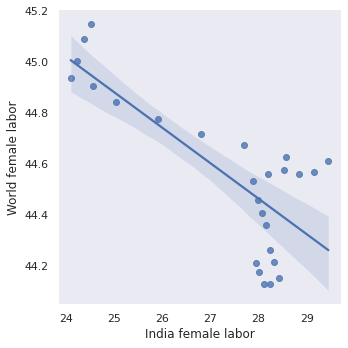

In [265]:

sb.lmplot(x = 'India female labor', y = 'World female labor', data = merge_final3)
 
plt.grid()

In [266]:
#globe = merged_df_final[merged_df_final['Country Name']=='Netherlands']['Region'].unique()
#globe
globe = merged_df_final[merged_df_final['Country Name'].str.contains('Czech')]
globe

Country Name Country Code  \
66200  Czech Republic          CZE   
66201  Czech Republic          CZE   
66202  Czech Republic          CZE   
66203  Czech Republic          CZE   
66204  Czech Republic          CZE   
...               ...          ...   
67746  Czech Republic          CZE   
67747  Czech Republic          CZE   
67748  Czech Republic          CZE   
67749  Czech Republic          CZE   
67750  Czech Republic          CZE   

                                          Indicator Name  \
66200  All staff compensation as % of total expenditu...   
66201  All staff compensation as % of total expenditu...   
66202  All staff compensation as % of total expenditu...   
66203  All staff compensation as % of total expenditu...   
66204  All staff compensation as % of total expenditu...   
...                                                  ...   
67746  Wittgenstein Projection: Population in thousan...   
67747  Wittgenstein Projection: Population in thousan...   
67748  Wittgenstein Projection: Population in thousan...   
67749  Wittgenstein Projection: Population in thousan...   
67750  Wittgenstein Projection: Population in thousan...   

                Indicator Code  1990  1991  1992  1993  1994  1995  ...  \
66200  UIS.XSPENDP.2.FDPUB.FNS   NaN   NaN   NaN   NaN   NaN   NaN  ...   
66201  UIS.XSPENDP.4.FDPUB.FNS   NaN   NaN   NaN   NaN   NaN   NaN  ...   
66202  UIS.XSPENDP.0.FDPUB.FNS   NaN   NaN   NaN   NaN   NaN   NaN  ...   
66203  UIS.XSPENDP.1.FDPUB.FNS   NaN   NaN   NaN   NaN   NaN   NaN  ...   
66204    UIS.XSPENDP.FDPUB.FNS   NaN   NaN   NaN   NaN   NaN   NaN  ...   
...                        ...   ...   ...   ...   ...   ...   ...  ...   
67746         PRJ.POP.ALL.1.MA   NaN   NaN   NaN   NaN   NaN   NaN  ...   
67747         PRJ.POP.ALL.1.MF   NaN   NaN   NaN   NaN   NaN   NaN  ...   
67748         PRJ.POP.ALL.3.FE   NaN   NaN   NaN   NaN   NaN   NaN  ...   
67749         PRJ.POP.ALL.3.MA   NaN   NaN   NaN   NaN   NaN   NaN  ...   
67750         PRJ.POP.ALL.3.MF   NaN   NaN   NaN   NaN   NaN   NaN  ...   

            2009         2010       2011       2012       2013  2014     2015  \
66200  57.112751    56.695709  55.825779  54.026260        NaN   NaN      NaN   
66201  63.808540    62.578541  61.476181  67.214279        NaN   NaN      NaN   
66202  57.265530    57.548771  61.076889  66.206169        NaN   NaN      NaN   
66203  57.992889    57.485569  56.306309  56.247810  56.458721   NaN      NaN   
66204  51.906551    51.489559  49.529129  48.444260  51.372711   NaN      NaN   
...          ...          ...        ...        ...        ...   ...      ...   
67746        NaN     8.240000        NaN        NaN        NaN   NaN     7.27   
67747        NaN    16.390000        NaN        NaN        NaN   NaN    14.05   
67748        NaN  3022.930000        NaN        NaN        NaN   NaN  3151.14   
67749        NaN  3220.830000        NaN        NaN        NaN   NaN  3341.69   
67750        NaN  6243.770000        NaN        NaN        NaN   NaN  6492.83   

       Currency Unit                 Region       Income Group  
66200   Czech koruna  Europe & Central Asia  High income: OECD  
66201   Czech koruna  Europe & Central Asia  High income: OECD  
66202   Czech koruna  Europe & Central Asia  High income: OECD  
66203   Czech koruna  Europe & Central Asia  High income: OECD  
66204   Czech koruna  Europe & Central Asia  High income: OECD  
...              ...                    ...                ...  
67746   Czech koruna  Europe & Central Asia  High income: OECD  
67747   Czech koruna  Europe & Central Asia  High income: OECD  
67748   Czech koruna  Europe & Central Asia  High income: OECD  
67749   Czech koruna  Europe & Central Asia  High income: OECD  
67750   Czech koruna  Europe & Central Asia  High income: OECD  

[1551 rows x 33 columns]